# Adaptação da Modelagem de Dados de Doenças do Coração

Trabalho realizado por **Rafael Couto e Rian Guedes**

O propósito deste trabalho é aprimorar a modelagem de aprendizado de máquina aplicada a dados de doenças cardíacas, incorporando redes MLP (Perceptron Multicamada) em comparação com os Algoritmos do Vizinho Mais Próximo (KNN) e o Classificador Naive-Bayes. Além disso, pretende-se ajustar as métricas utilizadas no Notebook anterior para uma avaliação mais precisa.

O objetivo central é a otimização da precisão e do desempenho dos modelos de aprendizado de máquina, tornando-os mais robustos e capazes de lidar com a complexidade dos dados relacionados a doenças cardíacas. Essa abordagem visa alcançar resultados mais confiáveis e relevantes, contribuindo para avanços no diagnóstico e tratamento dessas patologias.

Para aprimorar o Algoritmo do Vizinho Mais Próximo (KNN), serão exploradas estratégias que aprimorem a eficiência na classificação dos pacientes, incluindo otimização de hiperparâmetros e a possível utilização de uma abordagem ponderada para considerar a importância dos vizinhos próximos. Da mesma forma, o Classificador Naive-Bayes passará por ajustes visando aumentar sua capacidade de lidar com dados multidimensionais e complexos, tornando-o mais adequado para as características dos dados de doenças cardíacas.

Além disso, uma análise minuciosa das métricas de avaliação utilizadas no Notebook anterior será conduzida, visando selecionar aquelas mais adequadas ao problema em questão. Métricas como acurácia, precisão e recall serão consideradas, proporcionando uma avaliação abrangente dos modelos desenvolvidos.

Com essa abordagem estruturada e os devidos ajustes nos algoritmos e métricas, almeja-se um avanço significativo na modelagem de aprendizado de máquina aplicada a doenças cardíacas. Espera-se que isso contribua para detecção precoce, tratamento mais eficaz e, consequentemente, melhoria na qualidade de vida dos pacientes. A inclusão de redes MLP adiciona uma camada de complexidade e capacidade de aprendizado mais profundo, ampliando ainda mais o potencial dos modelos.

<img src = "heart.jpg">

##  Importação de Bibliotecas

Inicialmente, um código foi desenvolvido para importar e executar as bibliotecas essenciais ao projeto.

In [1]:
# importa a biblioteca usada para trabalhar com vetores e matrizes
import numpy as np
# importa a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados
import pandas as pd
# permite criar tabelas a partir de dados em forma de listas, dicionários, matrizes ou outros formatos de dados tabulares
from tabulate import tabulate

# bibliotecas usadas para geração de graficos
# fornece estilos e funções adicionais para aprimorar a estética das visualizações
import seaborn as sns
# série de funções para criar e personalizar gráficos de maneira simples e direta
import matplotlib.pyplot as plt
# controlar a formatação dos ticks (marcas) nos eixos dos gráficos
import matplotlib.ticker as ticker
# criar uma mapa de cores a partir de uma lista de cores específicas
from matplotlib.colors import ListedColormap

# bibliotecas para realização de funções relacionadas KNN
# funções e classes necessárias para a aplicação do modelo de aprendizado de máquina
from sklearn.model_selection import cross_val_score, KFold, train_test_split
# classificador KNeighborsClassifier, que é um algoritmo de classificação baseado nos vizinhos mais próximos
from sklearn.neighbors import KNeighborsClassifier
# métricas de avaliação de desempenho do modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, mean_absolute_error, confusion_matrix
# conjuntos de dados prontos para uso em aprendizado de máquina
from sklearn import datasets
# funções e classes específicas para avaliação de métricas e desempenho
from sklearn import metrics
# balanceamento de classes através de subamostragem
from imblearn.under_sampling import RandomUnderSampler
# balanceamento de classes através de sobreamostragem sintética
from imblearn.over_sampling import SMOTE
# treinar um classificador multiclasse usando a estratégia "um contra todos"
from sklearn.multiclass import OneVsRestClassifier
# padronizar os recursos (features) de um conjunto de dados
from sklearn.preprocessing import StandardScaler

print('Bibliotecas carregadas com sucesso!!!')

Bibliotecas carregadas com sucesso!!!


## Leitura da Database

A base de dados utilizada neste projeto foi obtida a partir do Kaggle, uma conhecida plataforma online que disponibiliza diversos conjuntos de dados para fins de pesquisa e desenvolvimento. O acesso à base foi realizado seguindo o link [Heart Disease Dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset) garantindo a integridade e autenticidade dos dados utilizados em nossas análises. Escolher uma fonte confiável de dados é fundamental para garantir a qualidade e a credibilidade dos resultados alcançados ao longo deste trabalho. A partir dessa rica fonte de informações, pudemos explorar e extrair insights relevantes sobre doenças cardíacas, permitindo uma análise mais aprofundada e fundamentada para o aprimoramento dos modelos de aprendizado de máquina utilizados.

In [2]:
# importa a database e guarda em um dataframe do Pandas
df = pd.read_csv( 'heart.csv', encoding='iso-8859_1', delimiter=',', index_col=None)
print('Database lida com sucesso!')

# Mostrar a quantidade de linhas e colunas
print(df.shape)

Database lida com sucesso!
(1025, 14)


## Dicionário de Dados

Um dicionário de dados é uma estrutura organizacional que descreve e documenta detalhadamente os diferentes elementos e atributos presentes em um conjunto de dados, servindo como um guia fundamental para compreensão clara dos dados disponíveis, facilitando a análise, manipulação e interpretação correta dos resultados. A base de dados apresenta 14 atributos conforme a descrição abaixo:

**Atributos**

1. idade
2. sexo: 1 = masculino; 0 = feminino
3. cp: tipo de dor no peito
        a) Valor 1: angina típica
        b) Valor 2: angina atípica
        c) Valor 3: dor não anginosa
        d) Valor 4: assintomático
4. trestbps: pressão arterial em repouso (em mm Hg na admissão ao hospital)
5. colesterol: colesterol sérico em mg/dl
6. fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = verdadeiro; 0 = falso)
7. restecg: resultados eletrocardiográficos em repouso
        a) Valor 0: normal
        b) Valor 1: apresentando anormalidade do segmento ST-T (inversões de onda T e/ou elevação ou depressão do segmento ST > 0,05 mV)
        c) Valor 2: mostrando provável ou definitiva hipertrofia ventricular esquerda pelos critérios de Estes
8. thalach: frequência cardíaca máxima alcançada
9. exang: angina induzida pelo exercício (1 = sim; 0 = não)
10. oldpeak: depressão do segmento ST induzida pelo exercício em relação ao repouso
11. slope: inclinação do segmento ST do pico de exercício
        a) Valor 1: inclinação ascendente
        b) Valor 2: plana
        c) Valor 3: inclinação descendente
12. ca: número de vasos principais (0-3) coloridos por fluoroscopia
13. thal: 3 = normal; 6 = defeito fixo; 7 = defeito reversível
14. target: 0 = sem doença; 1 = com doença








## Observação da Database

As informações iniciais de uma base de dados são essenciais para uma compreensão adequada do contexto e do escopo do conjunto de dados em questão. Antes de iniciar qualquer análise ou modelagem, é crucial examinar aspectos fundamentais, como a origem da base, a forma como os dados foram coletados, o período de tempo abrangido e a descrição das variáveis presentes. Além disso, é importante avaliar a qualidade dos dados, identificando possíveis lacunas, valores ausentes ou erros de entrada que possam afetar a integridade dos resultados. Entender as informações iniciais da base de dados é o ponto de partida para uma análise bem fundamentada, permitindo que os pesquisadores obtenham insights relevantes e tomem decisões informadas ao longo de todo o processo de exploração e modelagem dos dados.

In [3]:
# exibe o dataframe
display(df.head(n=10))

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   
5   58    0   0       100   248    0        0      122      0      1.0      1   
6   58    1   0       114   318    0        2      140      0      4.4      0   
7   55    1   0       160   289    0        0      145      1      0.8      1   
8   46    1   0       120   249    0        0      144      0      0.8      2   
9   54    1   0       122   286    0        0      116      1      3.2      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
5   0     2       1  
6   3     1       0  
7   1     3       0  
8   0     3       0  
9   2     2       0

In [4]:
# Informações da database
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Pré-processamento e Limpeza dos Dados

Pré-processamento de dados e limpeza de dados envolve a preparação dos dados brutos para análise, tratando questões como dados faltantes, normalização, padronização e seleção de características relevantes, transformação de variáveis categóricas em formatos numéricos adequados para modelos de aprendizado de máquina. Apresenta como objetivo final desses processos é obter um conjunto de dados consistente, livre de anomalias e preparado para ser utilizado em modelos de aprendizado de máquina ou outras técnicas analíticas, garantindo resultados mais precisos e confiáveis.

In [5]:
# Função para retornar linhas com valores em branco ou NULL
# índices das linhas que contém valores NaN
idxRowNan = pd.isnull(df).any(1).to_numpy().nonzero()

# imprime apenas as linhas com valores ausentes
display(df.iloc[idxRowNan])

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []

<div class="alert alert-block alert-warning"
     <b> Observação: Como não existem linhas com valores Nan ou NULL, não é necessário criar uma função para tratar esses valores. </b>
</div>

In [6]:
# Função que verifica se tem dados redundantes
def delDuplicatas( df_dataset ):

    # remove as amostras duplicadas, mantendo apenas a primeira ocorrencia
    df_dataset = df_dataset.drop_duplicates(keep = 'first')

    return df_dataset

df = delDuplicatas(df)
print('Não existem dados redundantes')


Não existem dados redundantes


In [7]:
# Retorna informações estatísticas da database
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.470196    1.161452    0.616274    1.006748   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.250000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  152.500000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  302.000000  302.000000  
mean     2.314570    0.543046  
std      0.613026    0.498970  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [8]:
# Função para normalizar atributos fora da escala
def normalizar(X):

    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)

    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

# Normalizar algumas colunas
columns_to_normalize = ['age', 'trestbps', 'chol', 'thalach']
X = df[columns_to_normalize].values

# Chama a função para normalizar
X_norm, mu, sigma = normalizar(X)
df[columns_to_normalize] = X_norm

#Exibe a normalização de algumas colunas
df.describe().round(8)

age         sex          cp    trestbps        chol         fbs  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    -0.000000    0.682119    0.963576   -0.000000    0.000000    0.149007   
std      1.000000    0.466426    1.032044    1.000000    1.000000    0.356686   
min     -2.809529    0.000000    0.000000   -2.140967   -2.328345    0.000000   
25%     -0.709610    0.000000    0.000000   -0.660615   -0.685944    0.000000   
50%      0.119305    1.000000    1.000000   -0.091249   -0.115934    0.000000   
75%      0.727176    1.000000    2.000000    0.478117    0.545857    0.000000   
max      2.495529    1.000000    3.000000    3.894313    6.134852    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490   -0.000000    0.327815    1.043046    1.397351    0.718543   
std      0.526027    1.000000    0.470196    1.161452    0.616274    1.006748   
min      0.000000   -3.430456    0.000000    0.000000    0.000000    0.000000   
25%      0.000000   -0.712534    0.000000    0.000000    1.000000    0.000000   
50%      1.000000    0.127948    0.000000    0.800000    1.000000    0.000000   
75%      1.000000    0.717377    1.000000    1.600000    2.000000    1.000000   
max      2.000000    2.289187    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  302.000000  302.000000  
mean     2.314570    0.543046  
std      0.613026    0.498970  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

<div class="alert alert-block alert-warning"
     <b> Observação: A normalização de atributos que estão fora de escala é um procedimento importante em muitas tarefas de aprendizado de máquina e análise de dados. Isso é feito para garantir que diferentes atributos, que podem ter intervalos de valores diferentes, tenham um impacto equilibrado durante o treinamento e análise dos modelos. </b>
</div>

## Detecção de Outliers

Outro passo importante na análise e tratamento dos dados é a detecção de outliers que se caracteriza como dados gerados por leituras incorretas e erros de digitação. Uma das maneiras mais simples de verificar se os dados contém outliers é criar um gráfico box plot de cada atributo. Para isso, podemos usar a função boxplot da biblioteca Pandas.

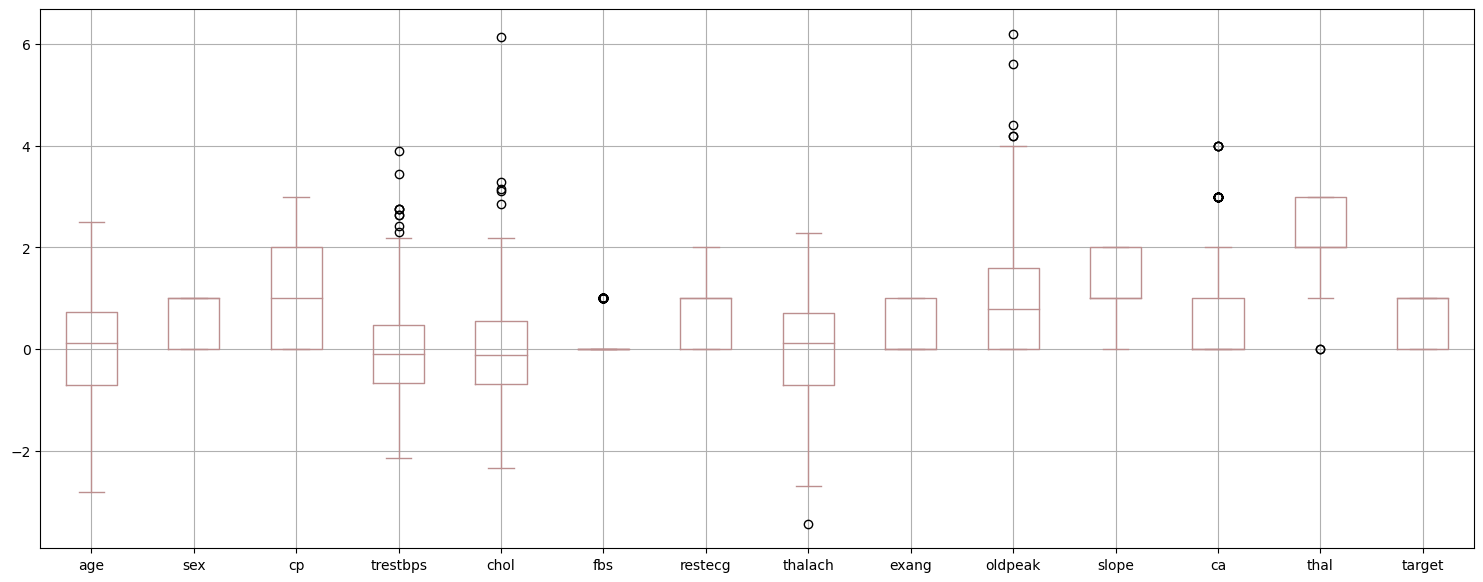

In [9]:
# Função que cria um boxplot para a database
df.boxplot(figsize=(18.5,7), color="#bc8f8f")
plt.show()

Outra forma de analisar se a base de dados contém outliers é usar gráficos de dispersão. Pode-se plotar gráficos de dispersão de todas as combinações de atributos da base de dados usando a função scatter_matrix da Pandas.

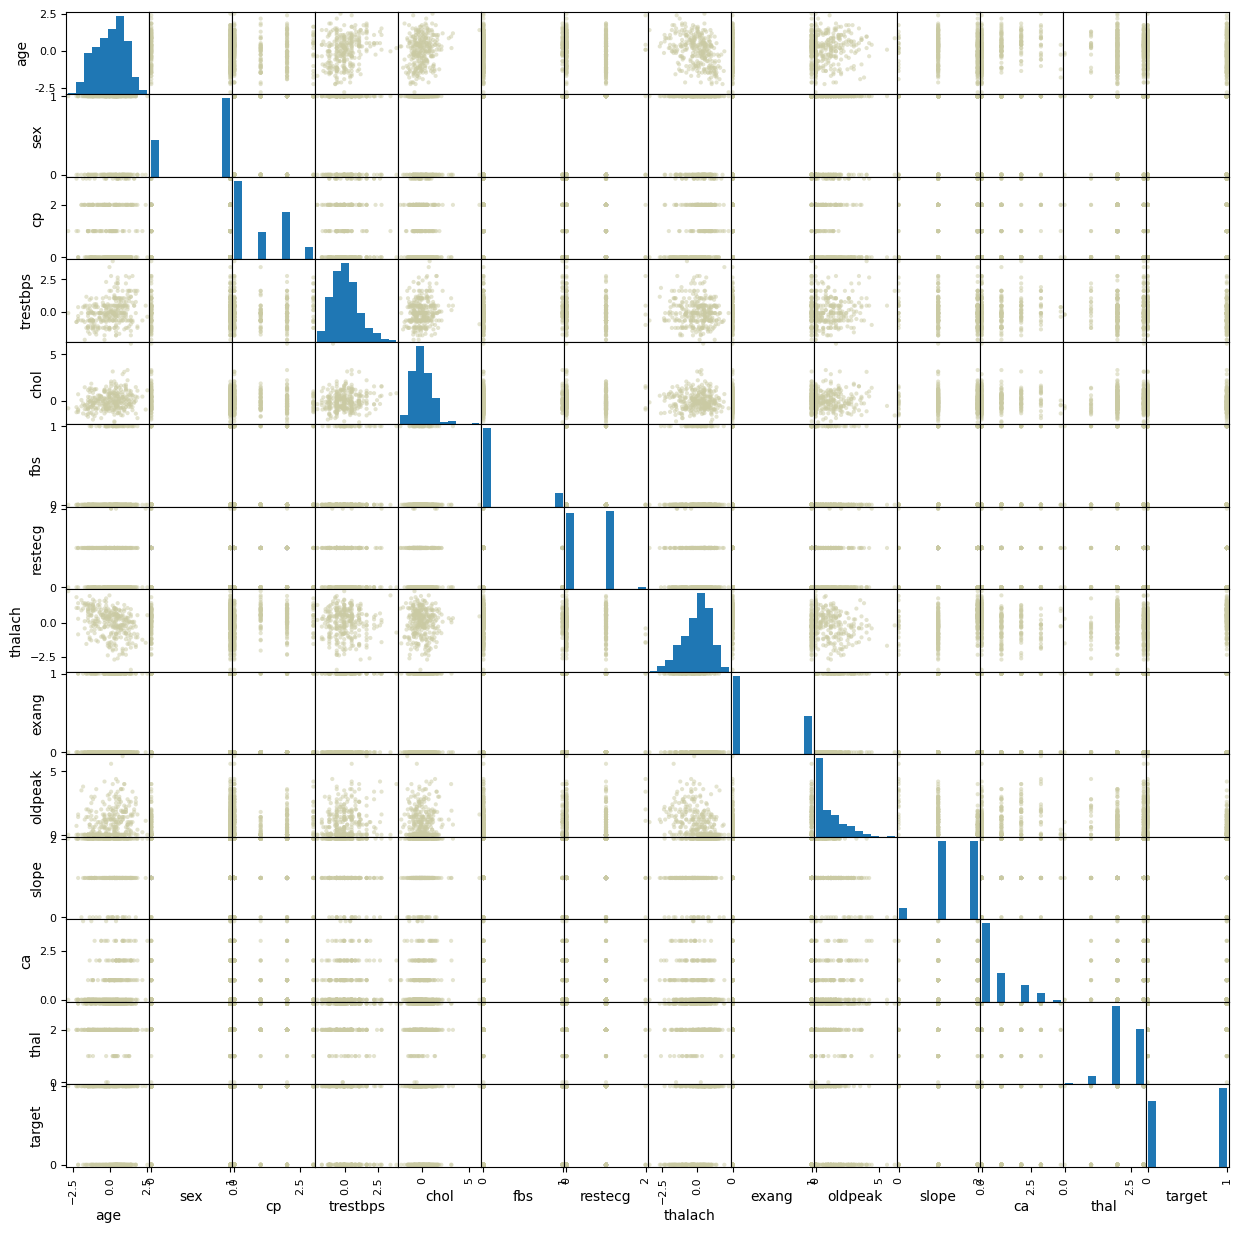

In [10]:
# Função para criar um gráfico de Dispersão na identificação de Outliers
pd.plotting.scatter_matrix(df, figsize=(15,15), color="#cacaa3")
plt.show()

Outra forma de plotar gráficos de dispersão a partir dos dataframes é usando a biblioteca Seaborn. Juntamente com essa biblioteca, também é recomendável importar a biblioteca Matplotlib para personalizar os gráficos.

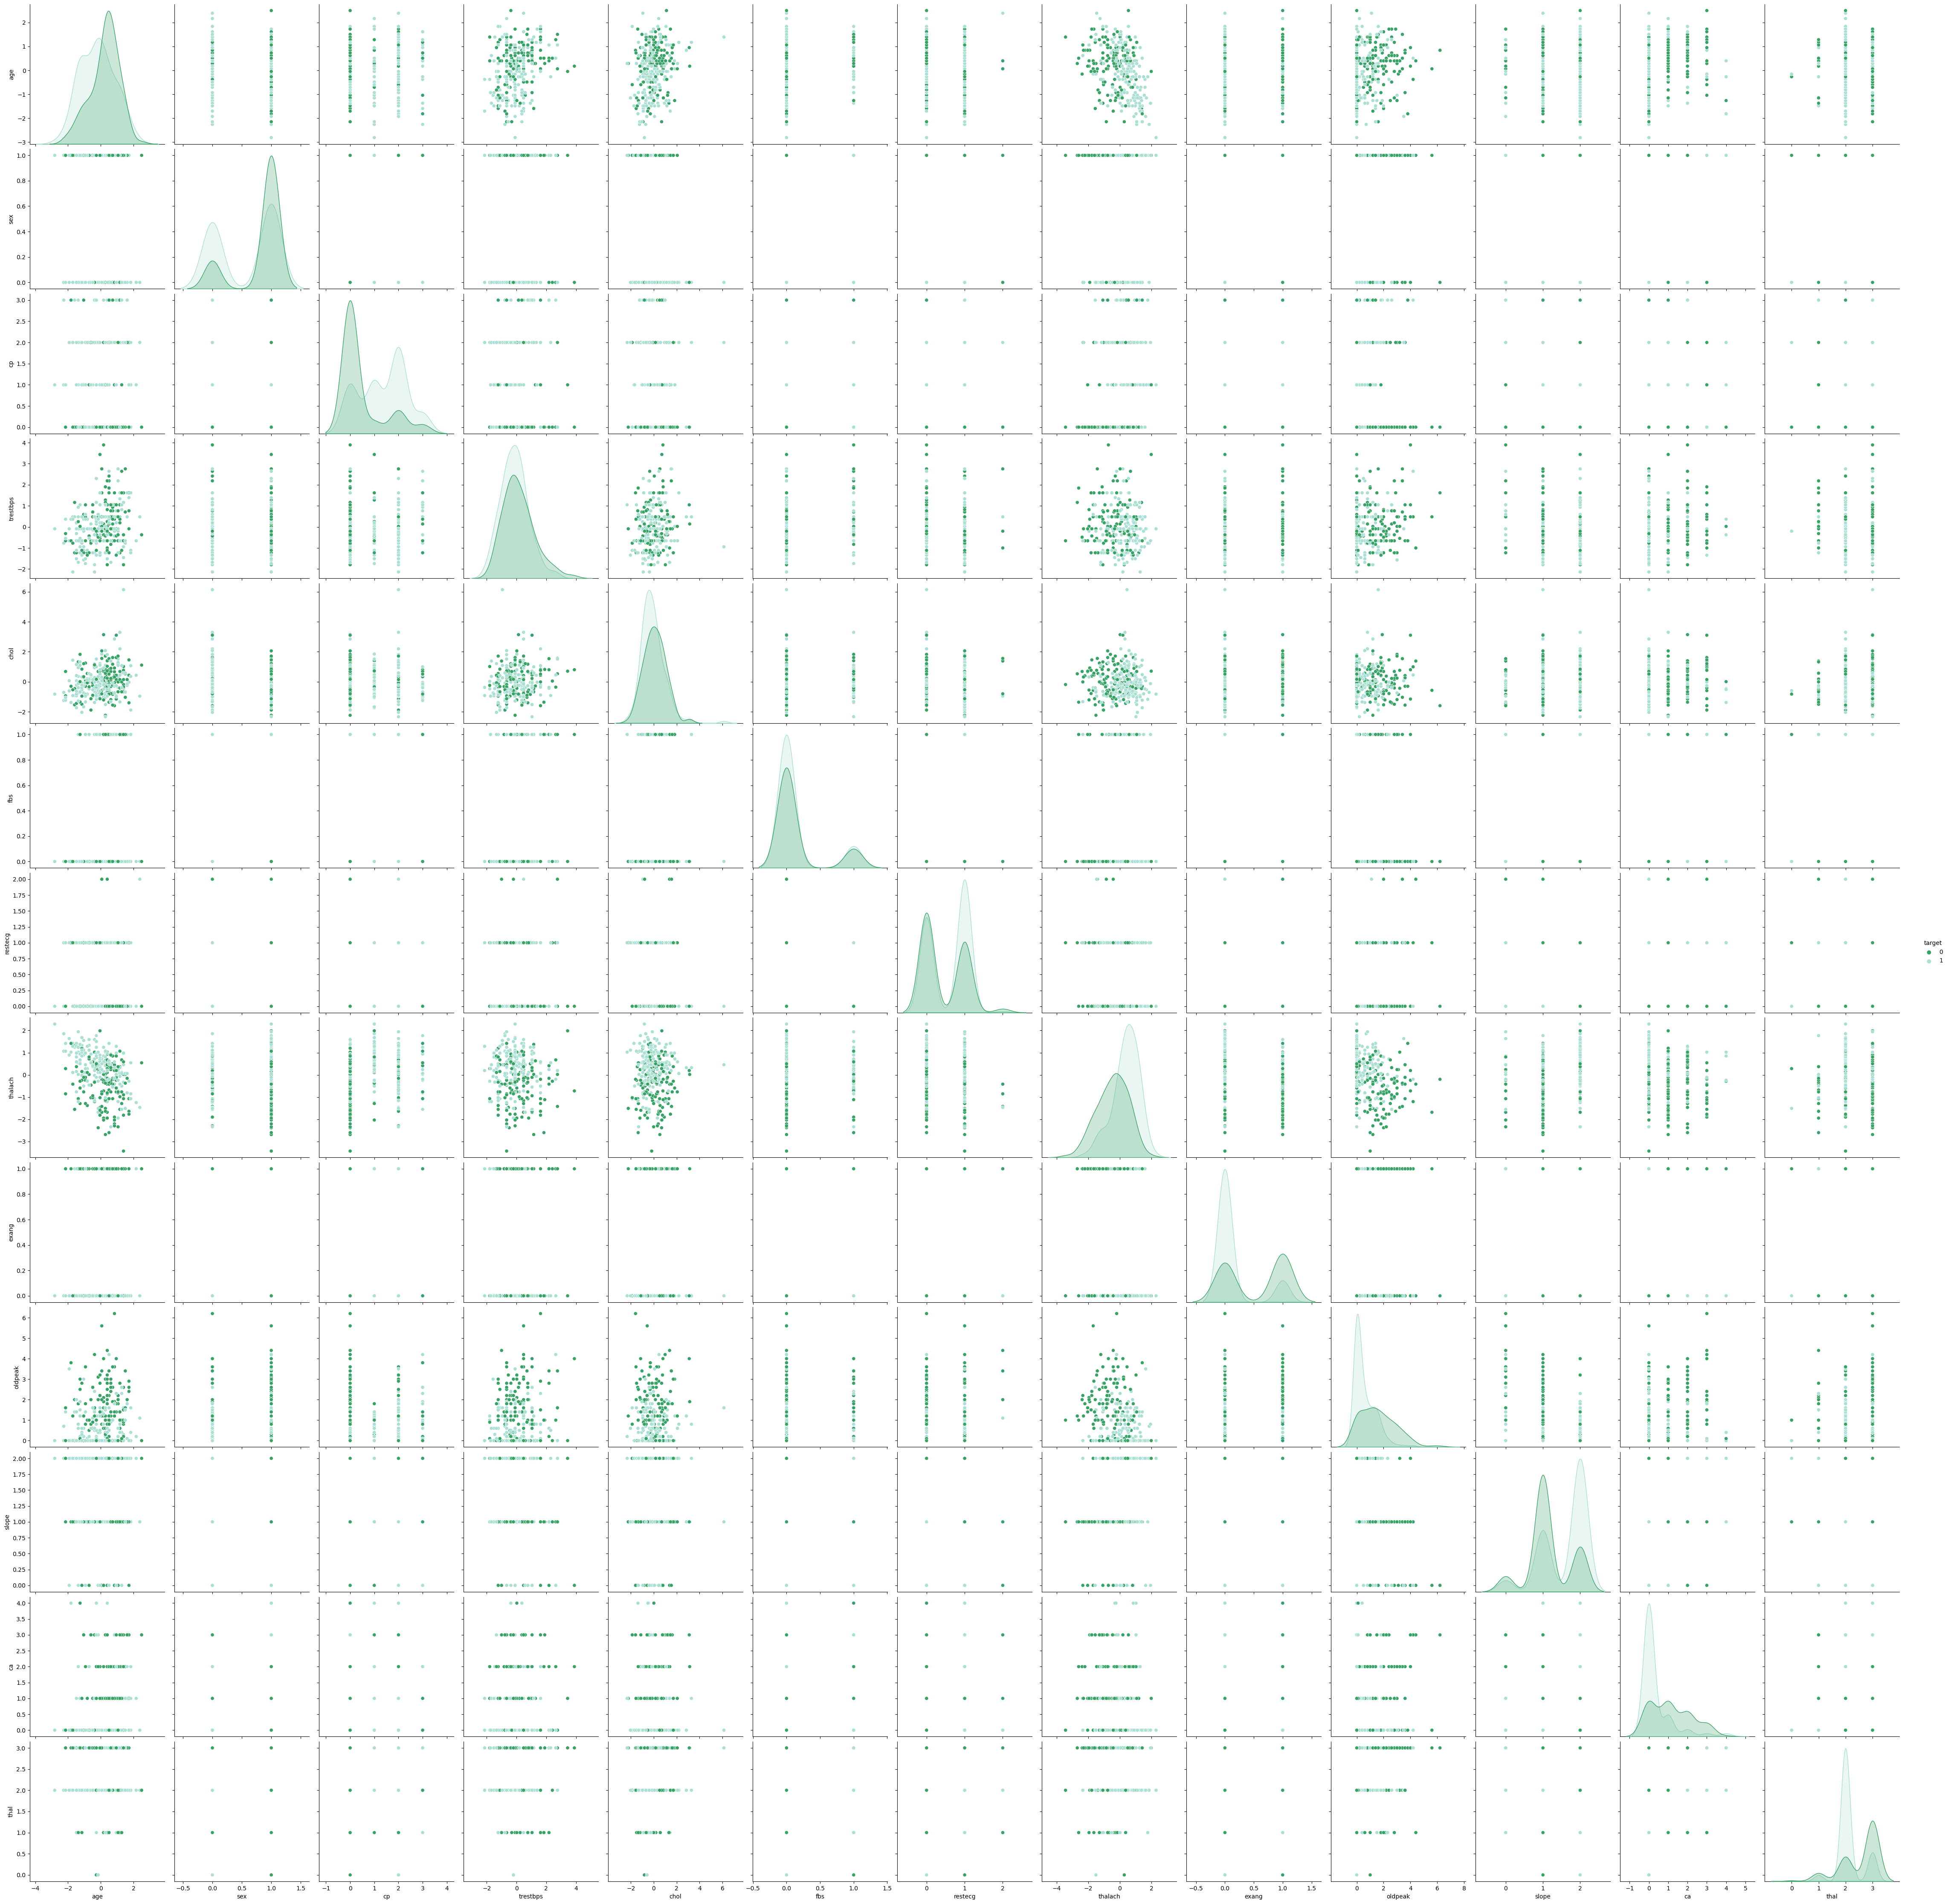

In [11]:
# Escolha uma paleta de cores do Seaborn
color_palette = 'BuGn_r'

# Crie o gráfico de dispersão com as cores definidas pela paleta
sns.pairplot(df, hue='target', palette=color_palette, height=3.5)

# Mostre o gráfico usando a função show() da matplotlib
plt.show()

A bilioteca Seaborn permite criar gráficos boxplot agrupados por um determinado atributo, o que facilita a análise dos dados. No exemplo abaixo, criaremos boxplots para cada atributo agrupados pela classe.

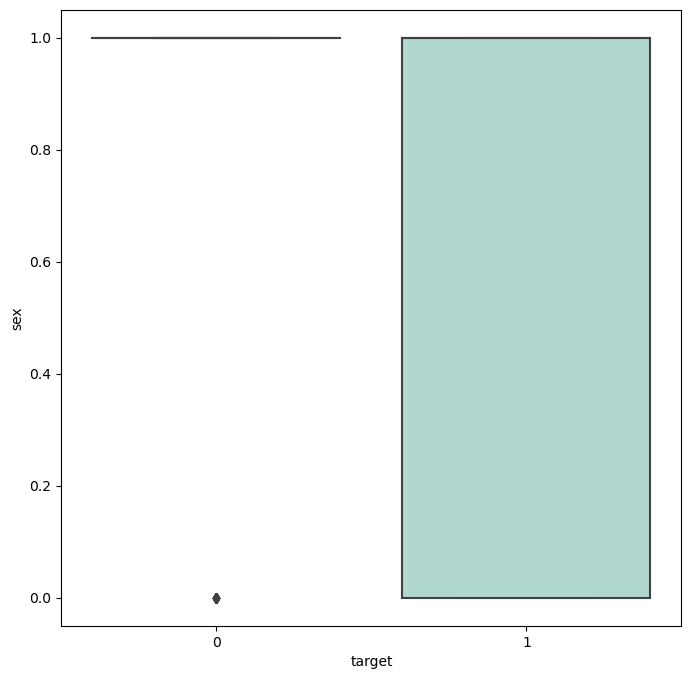

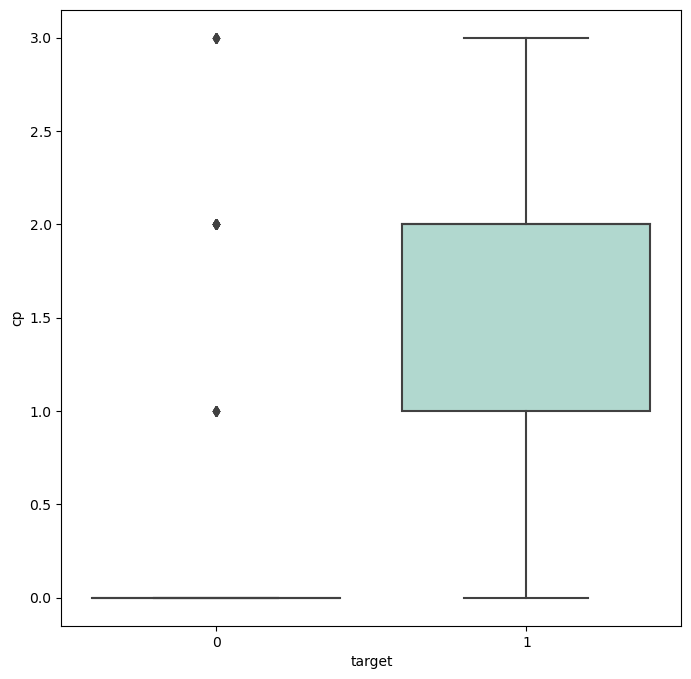

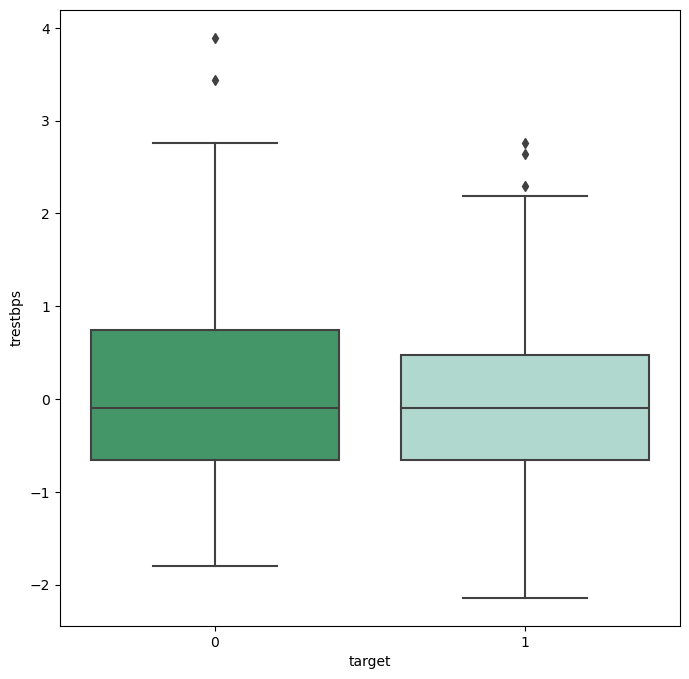

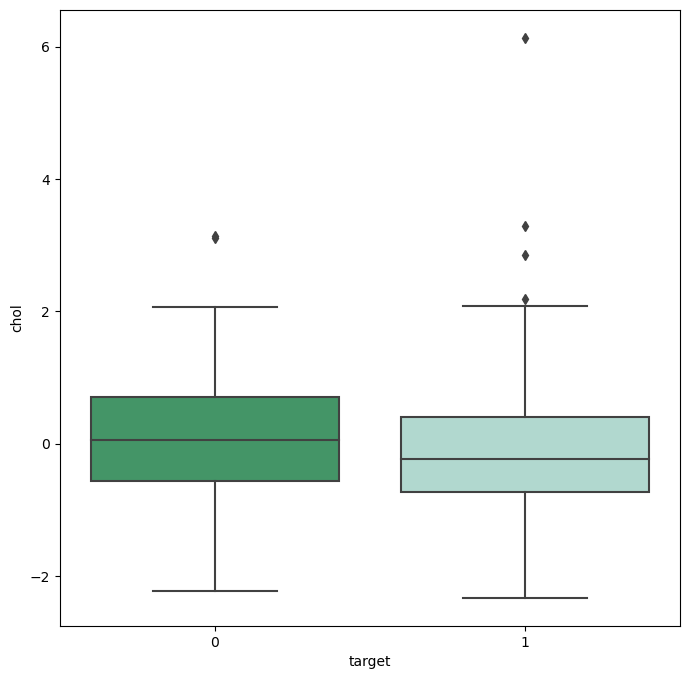

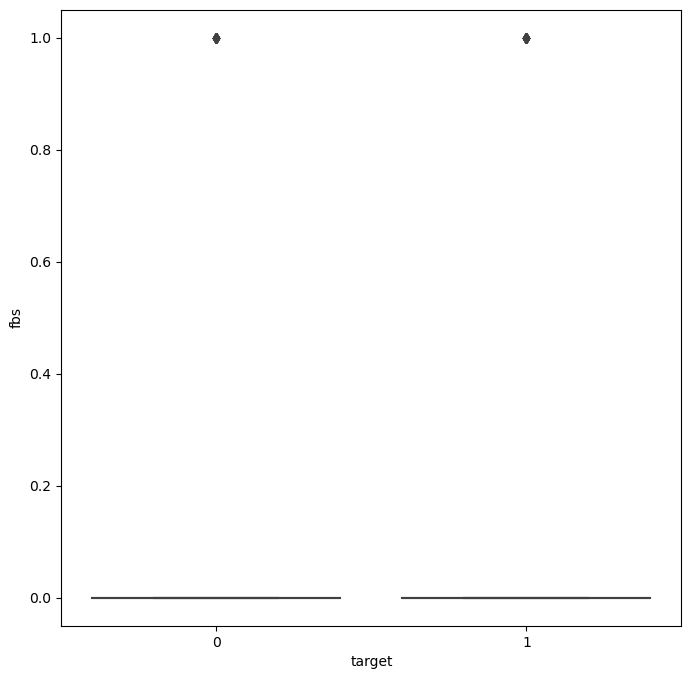

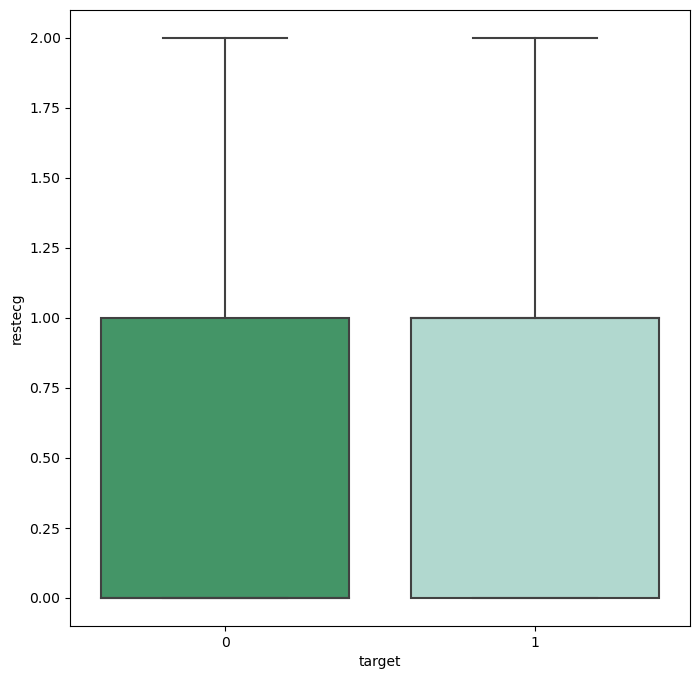

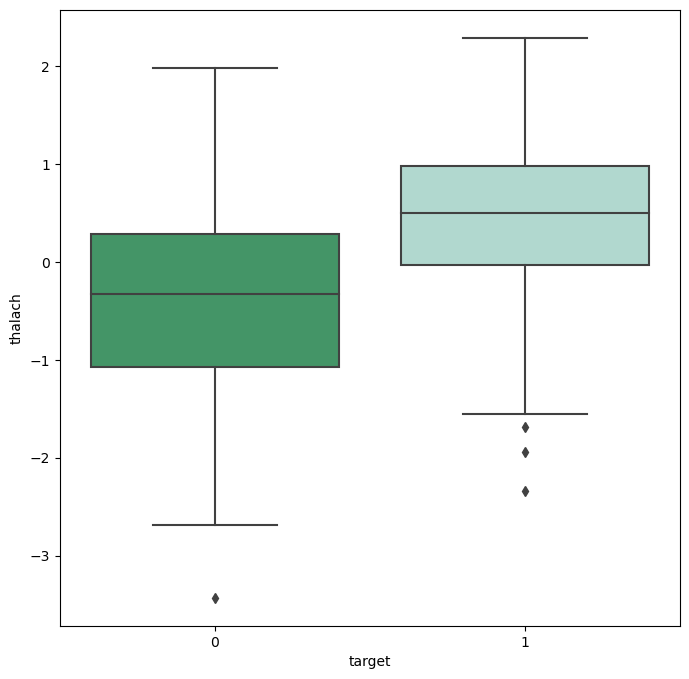

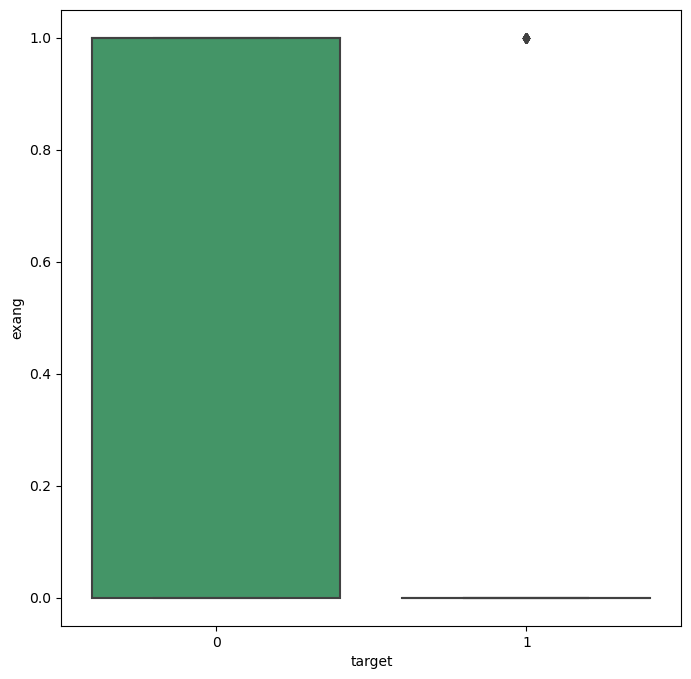

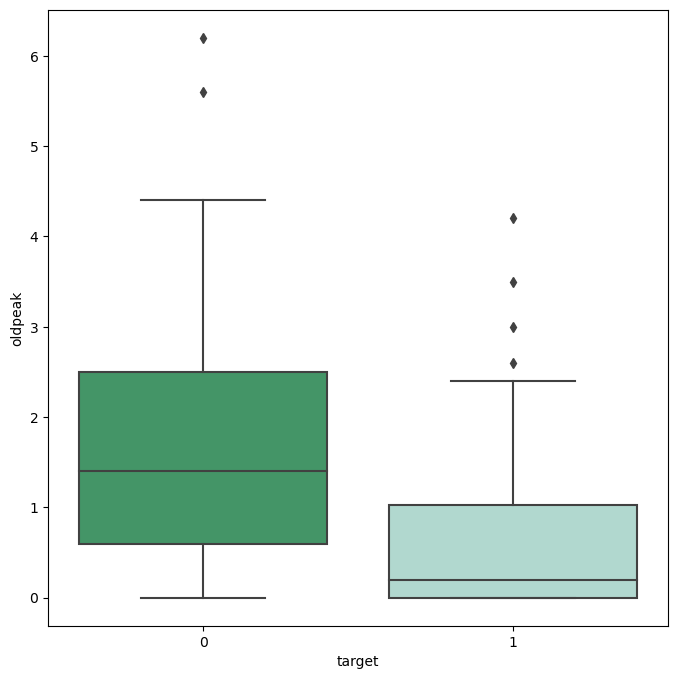

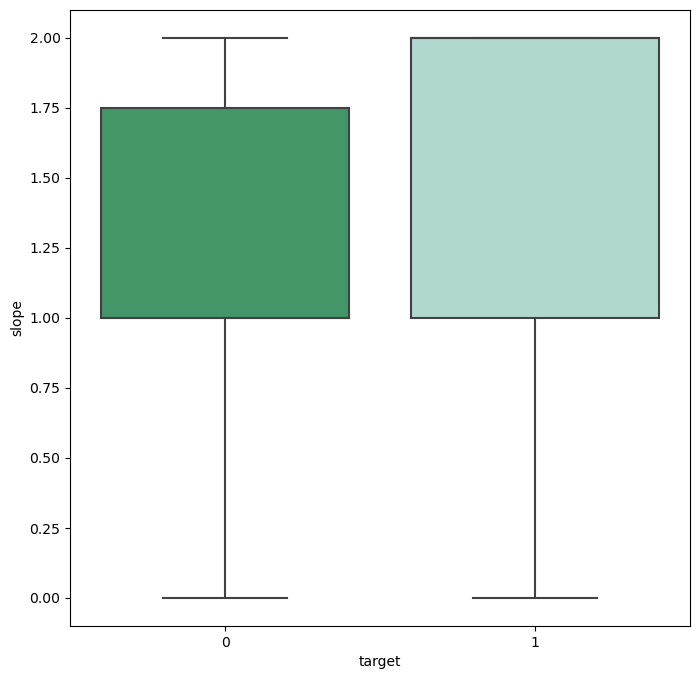

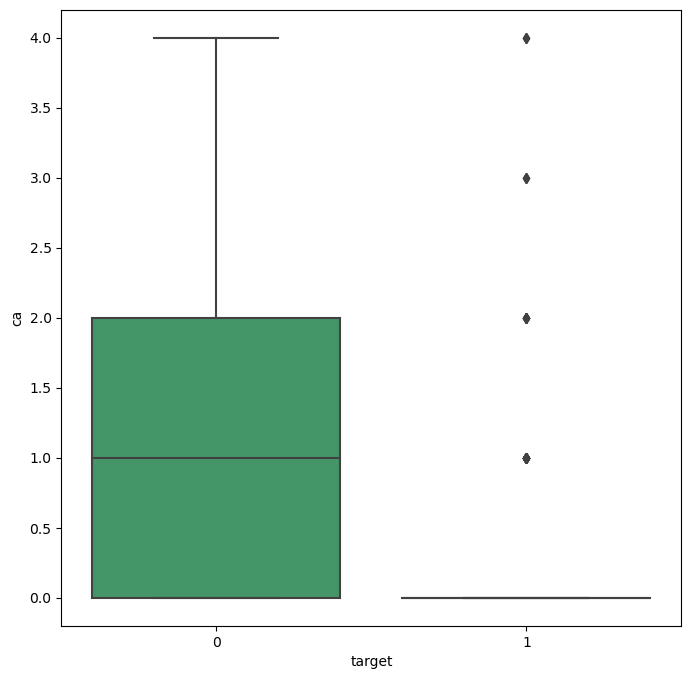

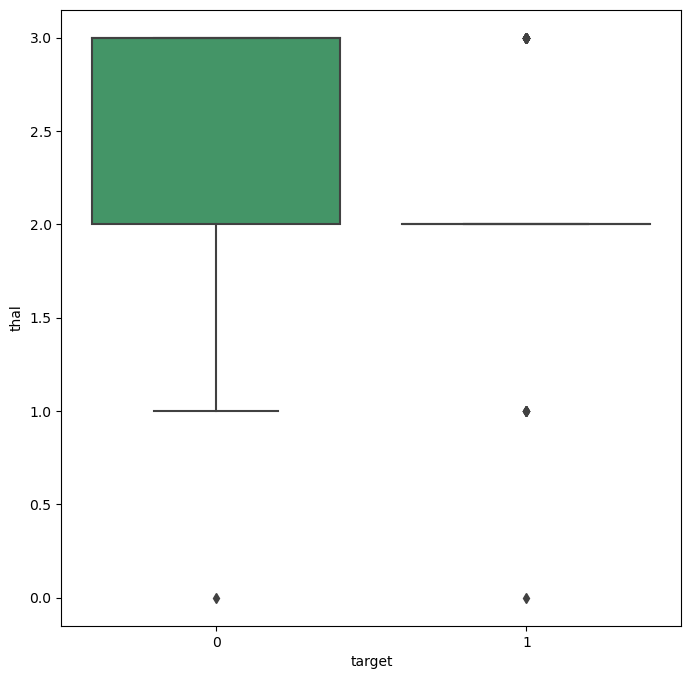

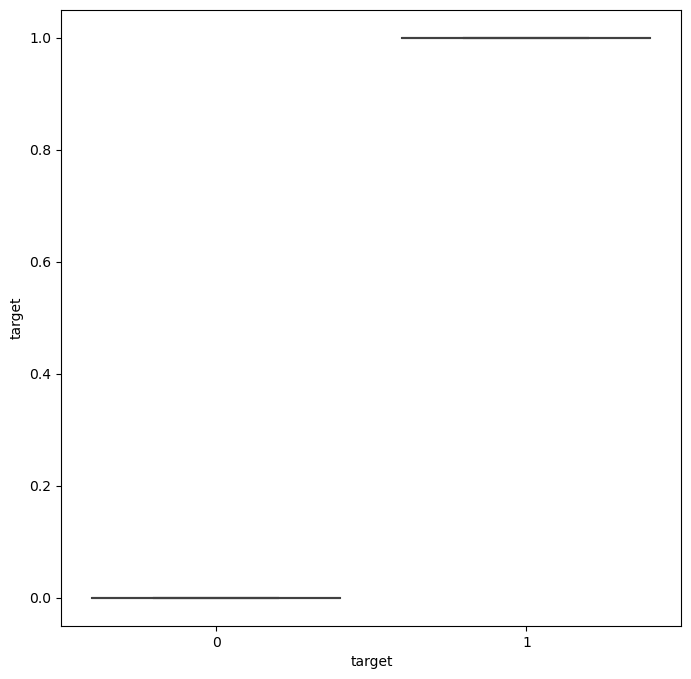

In [12]:
# Escolha uma paleta de cores do Seaborn
color_palette = 'BuGn_r'

# Loop para criar boxplots para cada atributo da Database
for atributo in df.columns[1:]:
    # Define a dimensão do gráfico
    plt.figure(figsize=(8, 8))

    # Cria o boxplot com as cores definidas pela paleta
    sns.boxplot(x="target", y=atributo, data=df, whis=1.5, palette=color_palette)

    # Mostra o gráfico
    plt.show()

Os box plots dos atributos mostraram outros *outliers* que não haviam aparecido no primeiro box plot. Portanto, esses novos valores são considerados *outliers* se analisarmos as classes individualmente, mas não são considerados *outliers* se analisarmos a base de dados de forma geral. 

Outro tipo de gráfico que ajuda a detectar *outliers* é o histograma. Portanto, será usado para analisar cada atributo.

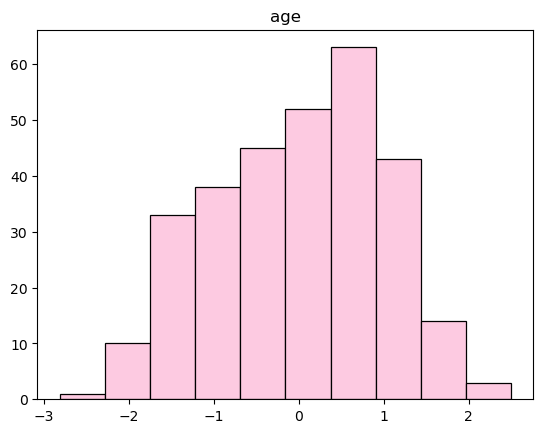

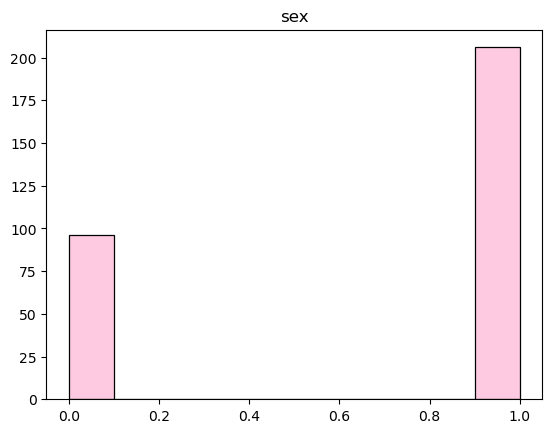

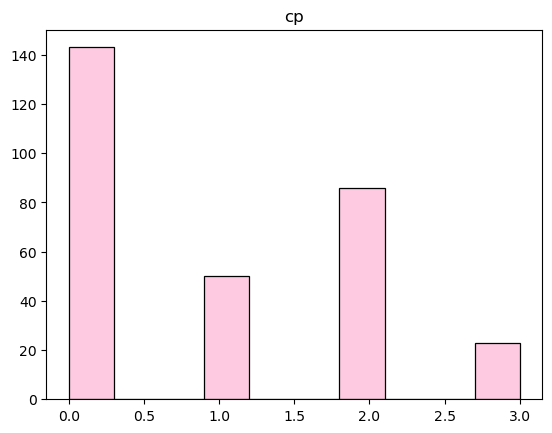

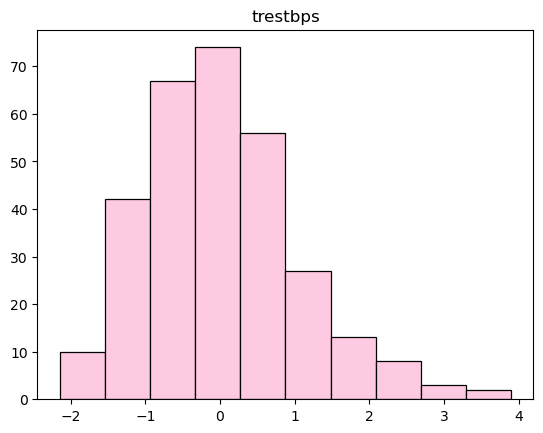

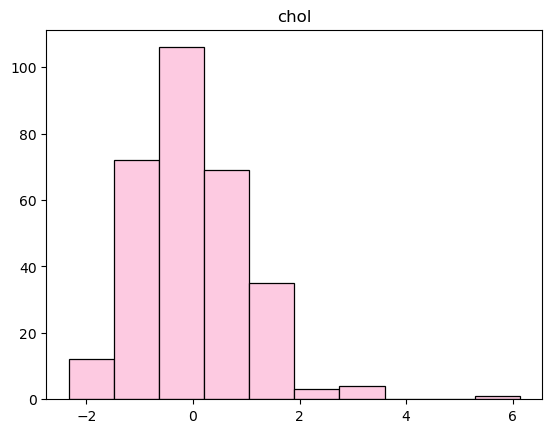

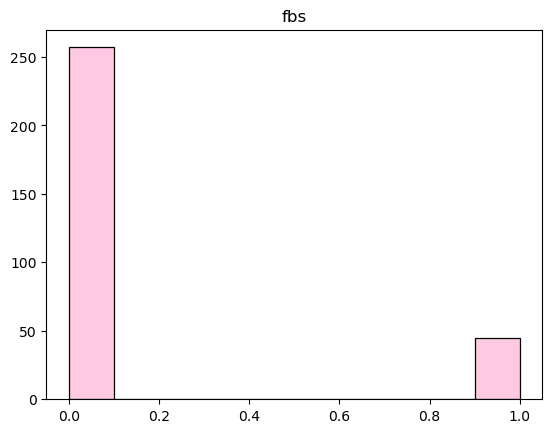

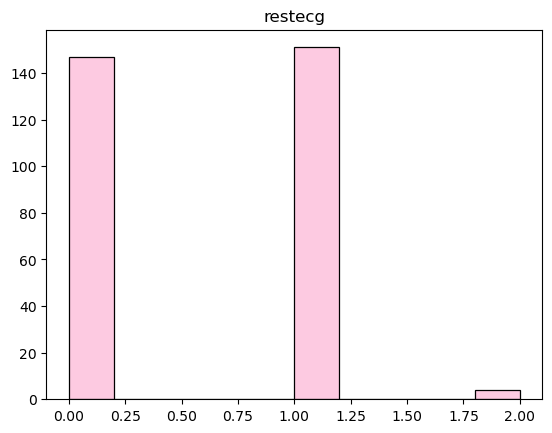

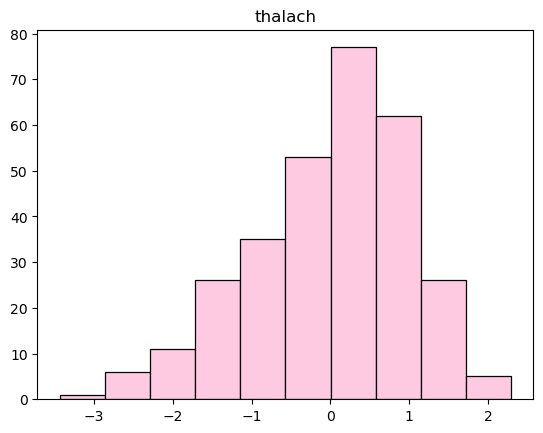

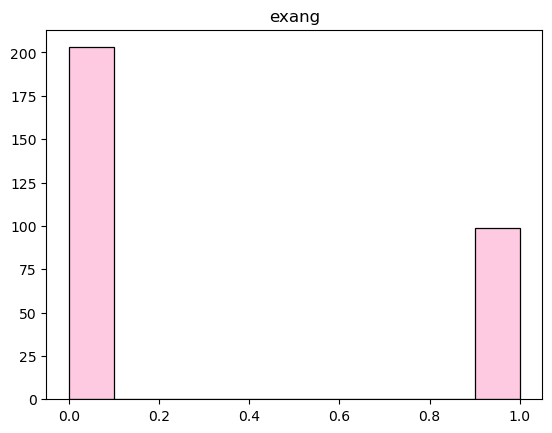

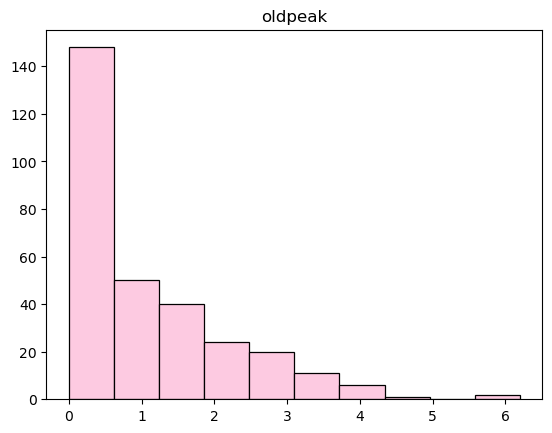

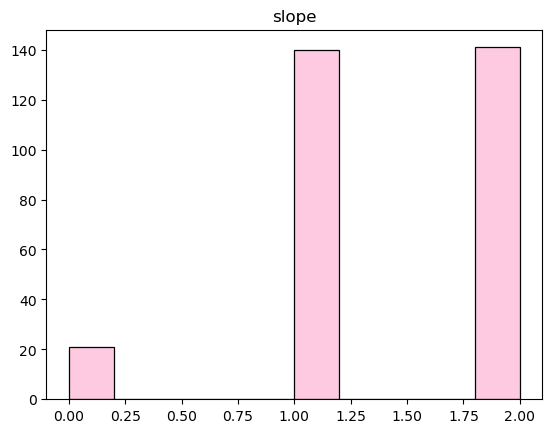

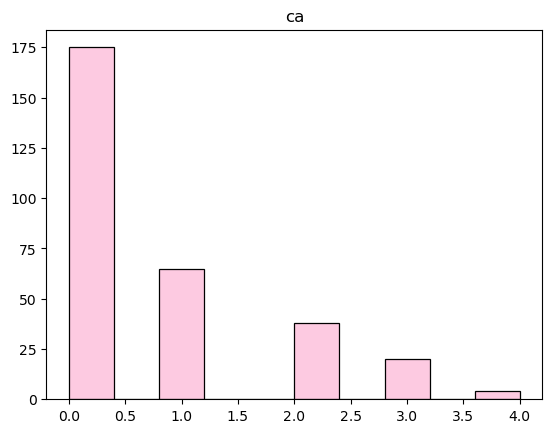

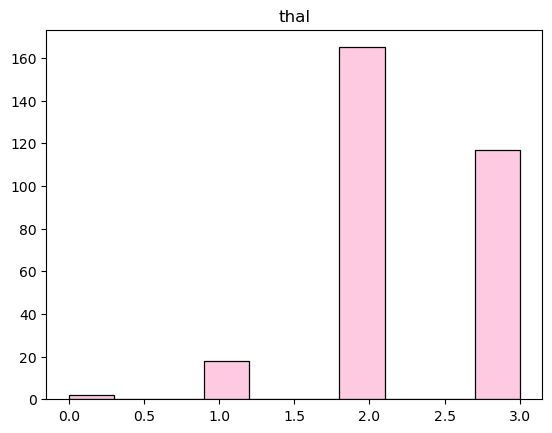

In [13]:
for atributo in df.columns[:-1]:
    
    # cria o histograma
    n, bins, patches = plt.hist(df[atributo].values,bins=10, color='#fdcae1', edgecolor='black', linewidth=0.9)

    # cria um título para o gráfico
    plt.title(atributo)

    # mostra o gráfico
    plt.show()

Agora, pode-se usar um gráfico de densidade para fazer o mesmo tipo de análise.

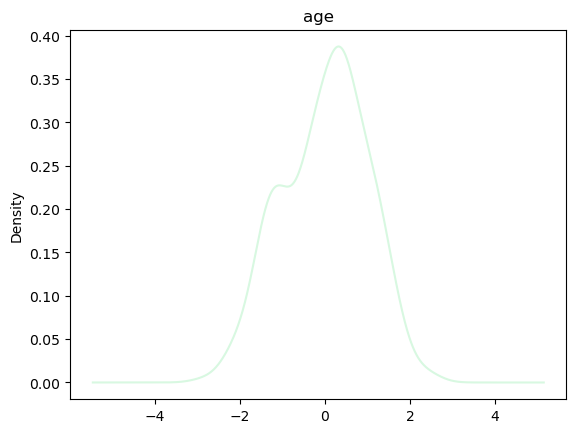

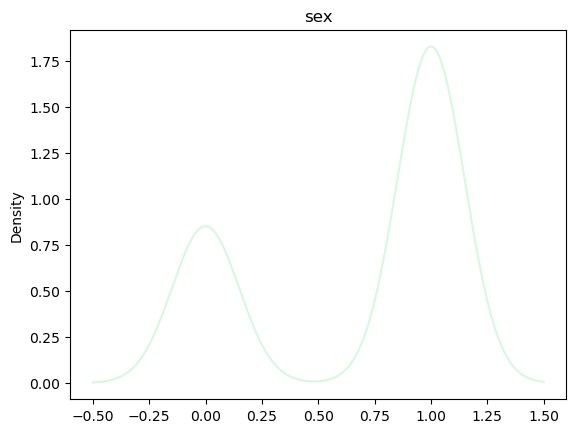

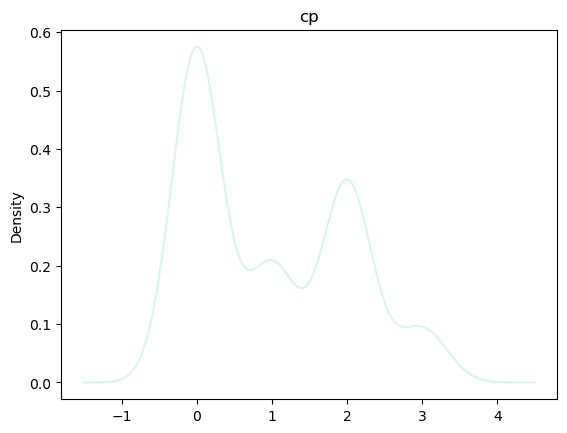

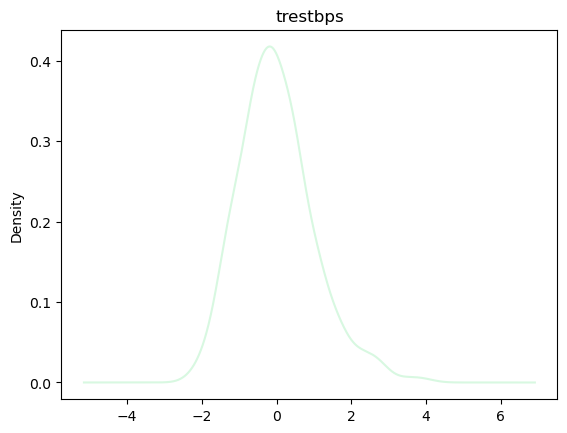

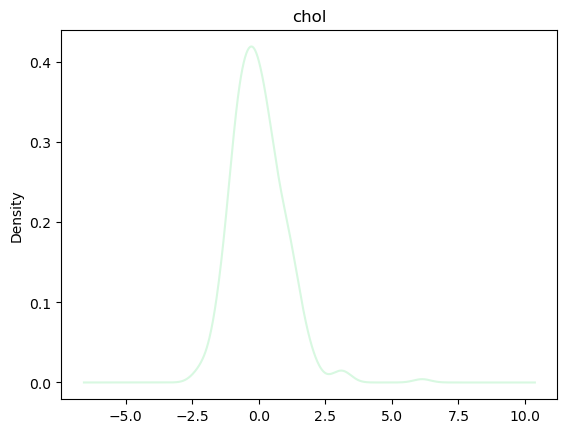

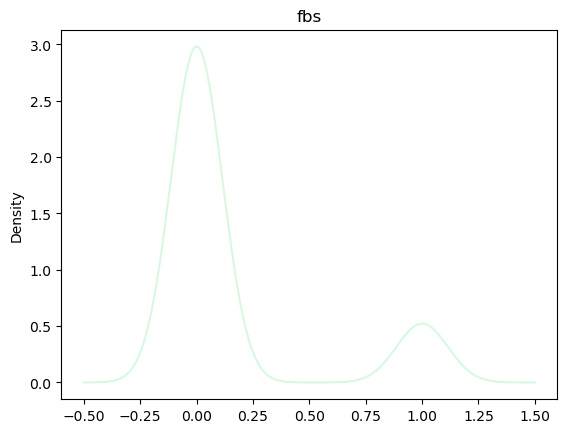

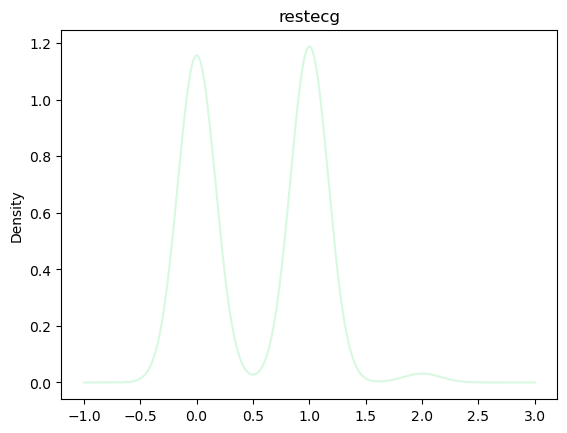

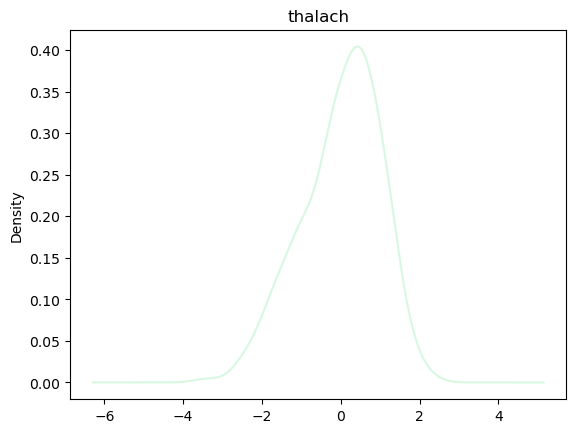

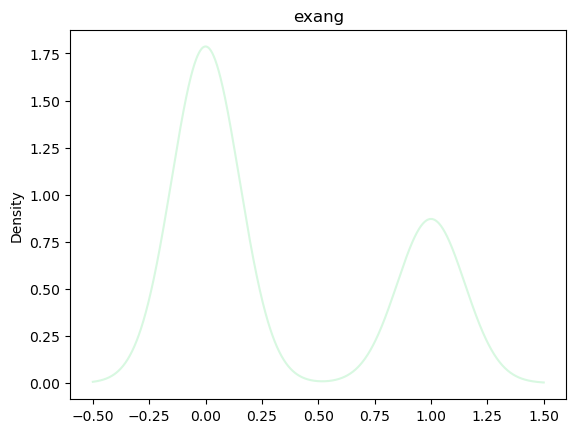

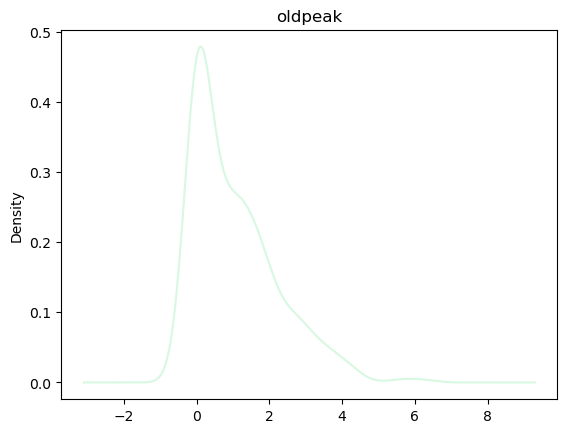

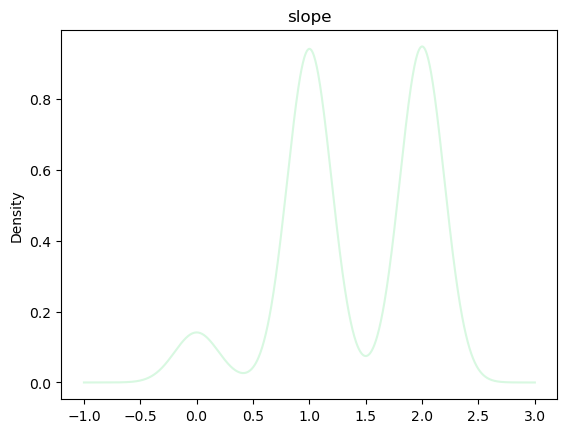

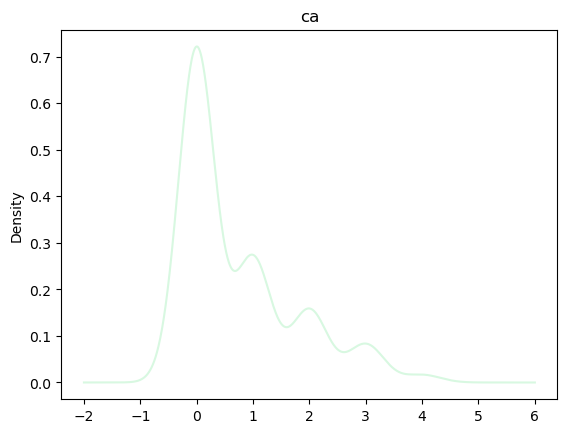

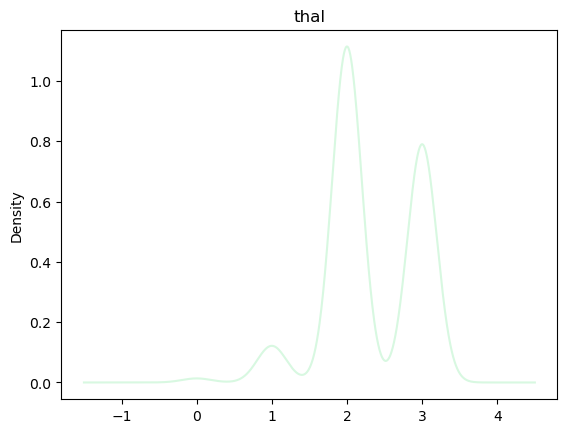

In [14]:
# Loop para criar gráficos de densidade para cada atributo, exceto o último (que é o atributo alvo)
for atributo in df.columns[:-1]:
    
    # Criando o gráfico de densidade com a cor definida
    densityplot = df[atributo].plot(kind='density', color='#d8f8e1')

    # Cria um título para o gráfico
    plt.title(atributo)

    # Mostra o gráfico
    plt.show()

Outro passo importante na análise de dados é verificar a distribuição das classes. Para isso, é possível criar um gráfico de barra indicando quantas amostras de cada classe há na base de dados.

1    164
0    138
Name: target, dtype: int64

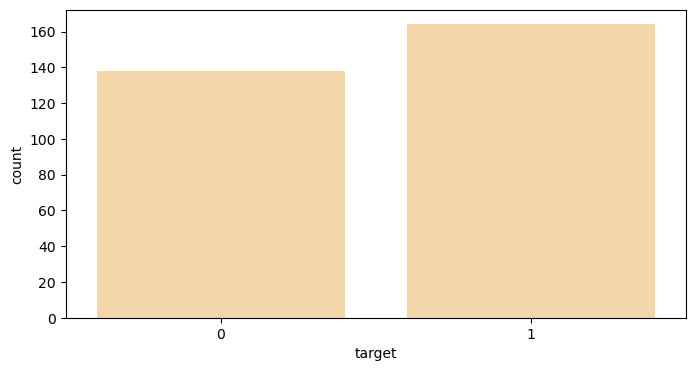

In [15]:
# Exibe a contagem de cada valor na coluna 'target'
display(df['target'].value_counts())

# Define a dimensão do gráfico
plt.figure(figsize=(8, 4))

# Cria um gráfico de barras com a frequência de cada valor em 'target' e define a cor das barras
sns.countplot(x="target", data=df, color='#ffda9e') 

# Mostra o gráfico
plt.show()

## Covariância e Correlação

Quando dois atributos possuem valores idênticos ou muito semelhantes para todas as amostras, um deles deve ser eliminado ou eles devem ser combinados. Isso ajuda a diminuir o custo computacional das tarefas de aprendizado e evita que o aprendizado de alguns método seja prejudicado, principalmente os métodos baseados em otimização.

Uma das maneiras mais comuns de analisar a correlação dos dados é através das matrizes de correlação e covariância. Pode-se fazer isso usando a biblioteca `Numpy` ou a `Pandas`.

In [16]:
# Utilizando o Pandas
# matriz de covariancia
df_covariance = df.cov()

# matriz de correlação
df_correlation = df.corr()

print('Matriz de covariância: ')
display(df_covariance)

print('\n\nMatriz de correlação: ')
display(df_correlation)

Matriz de covariância: 


age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.044293 -0.065129  0.283121  0.207216  0.042621   
sex      -0.044293  0.217553 -0.024906 -0.026888 -0.091220  0.007657   
cp       -0.065129 -0.024906  1.065114  0.047976 -0.075011  0.035346   
trestbps  0.283121 -0.026888  0.047976  1.000000  0.125256  0.063535   
chol      0.207216 -0.091220 -0.075011  0.125256  1.000000  0.004076   
fbs       0.042621  0.007657  0.035346  0.063535  0.004076  0.127225   
restecg  -0.058699 -0.014807  0.022563 -0.060686 -0.077643 -0.015588   
thalach  -0.395235 -0.021660  0.302767 -0.048023 -0.005308 -0.002557   
exang     0.043830  0.031462 -0.190678  0.032221  0.030139  0.004147   
oldpeak   0.239305  0.053264 -0.175836  0.226019  0.058173  0.001870   
slope    -0.101145 -0.009483  0.074322 -0.075723  0.000257 -0.012893   
ca        0.304301  0.053090 -0.202977  0.099918  0.087464  0.052045   
thal      0.040041  0.060461 -0.101461  0.038541  0.059347 -0.007162   
target   -0.110510 -0.066005  0.222503 -0.072984 -0.040635 -0.004774   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.058699 -0.395235  0.043830  0.239305 -0.101145  0.304301   
sex      -0.014807 -0.021660  0.031462  0.053264 -0.009483  0.053090   
cp        0.022563  0.302767 -0.190678 -0.175836  0.074322 -0.202977   
trestbps -0.060686 -0.048023  0.032221  0.226019 -0.075723  0.099918   
chol     -0.077643 -0.005308  0.030139  0.058173  0.000257  0.087464   
fbs      -0.015588 -0.002557  0.004147  0.001870 -0.012893  0.052045   
restecg   0.276705  0.021677 -0.017018 -0.034367  0.029306 -0.044014   
thalach   0.021677  1.000000 -0.177457 -0.397450  0.237114 -0.229852   
exang    -0.017018 -0.177457  0.221084  0.156606 -0.074212  0.059350   
oldpeak  -0.034367 -0.397450  0.156606  1.348971 -0.412510  0.276608   
slope     0.029306  0.237114 -0.074212 -0.412510  0.379794 -0.057226   
ca       -0.044014 -0.229852  0.059350  0.276608 -0.057226  1.013542   
thal     -0.003377 -0.058182  0.059328  0.148872 -0.039031  0.098799   
target    0.035401  0.209545 -0.102198 -0.248703  0.105762 -0.205452   

              thal    target  
age       0.040041 -0.110510  
sex       0.060461 -0.066005  
cp       -0.101461  0.222503  
trestbps  0.038541 -0.072984  
chol      0.059347 -0.040635  
fbs      -0.007162 -0.004774  
restecg  -0.003377  0.035401  
thalach  -0.058182  0.209545  
exang     0.059328 -0.102198  
oldpeak   0.148872 -0.248703  
slope    -0.039031  0.105762  
ca        0.098799 -0.205452  
thal      0.375800 -0.104948  
target   -0.104948  0.248971



Matriz de correlação: 


age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.094962 -0.063107  0.283121  0.207216  0.119492   
sex      -0.094962  1.000000 -0.051740 -0.057647 -0.195571  0.046022   
cp       -0.063107 -0.051740  1.000000  0.046486 -0.072682  0.096018   
trestbps  0.283121 -0.057647  0.046486  1.000000  0.125256  0.178125   
chol      0.207216 -0.195571 -0.072682  0.125256  1.000000  0.011428   
fbs       0.119492  0.046022  0.096018  0.178125  0.011428  1.000000   
restecg  -0.111590 -0.060351  0.041561 -0.115367 -0.147602 -0.083081   
thalach  -0.395235 -0.046439  0.293367 -0.048023 -0.005308 -0.007169   
exang     0.093216  0.143460 -0.392937  0.068526  0.064099  0.024729   
oldpeak   0.206040  0.098322 -0.146692  0.194600  0.050086  0.004514   
slope    -0.164124 -0.032990  0.116854 -0.122873  0.000417 -0.058654   
ca        0.302261  0.113060 -0.195356  0.099248  0.086878  0.144935   
thal      0.065317  0.211452 -0.160370  0.062870  0.096810 -0.032752   
target   -0.221476 -0.283609  0.432080 -0.146269 -0.081437 -0.026826   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.111590 -0.395235  0.093216  0.206040 -0.164124  0.302261   
sex      -0.060351 -0.046439  0.143460  0.098322 -0.032990  0.113060   
cp        0.041561  0.293367 -0.392937 -0.146692  0.116854 -0.195356   
trestbps -0.115367 -0.048023  0.068526  0.194600 -0.122873  0.099248   
chol     -0.147602 -0.005308  0.064099  0.050086  0.000417  0.086878   
fbs      -0.083081 -0.007169  0.024729  0.004514 -0.058654  0.144935   
restecg   1.000000  0.041210 -0.068807 -0.056251  0.090402 -0.083112   
thalach   0.041210  1.000000 -0.377411 -0.342201  0.384754 -0.228311   
exang    -0.068807 -0.377411  1.000000  0.286766 -0.256106  0.125377   
oldpeak  -0.056251 -0.342201  0.286766  1.000000 -0.576314  0.236560   
slope     0.090402  0.384754 -0.256106 -0.576314  1.000000 -0.092236   
ca       -0.083112 -0.228311  0.125377  0.236560 -0.092236  1.000000   
thal     -0.010473 -0.094910  0.205826  0.209090 -0.103314  0.160085   
target    0.134874  0.419955 -0.435601 -0.429146  0.343940 -0.408992   

              thal    target  
age       0.065317 -0.221476  
sex       0.211452 -0.283609  
cp       -0.160370  0.432080  
trestbps  0.062870 -0.146269  
chol      0.096810 -0.081437  
fbs      -0.032752 -0.026826  
restecg  -0.010473  0.134874  
thalach  -0.094910  0.419955  
exang     0.205826 -0.435601  
oldpeak   0.209090 -0.429146  
slope    -0.103314  0.343940  
ca        0.160085 -0.408992  
thal      1.000000 -0.343101  
target   -0.343101  1.000000

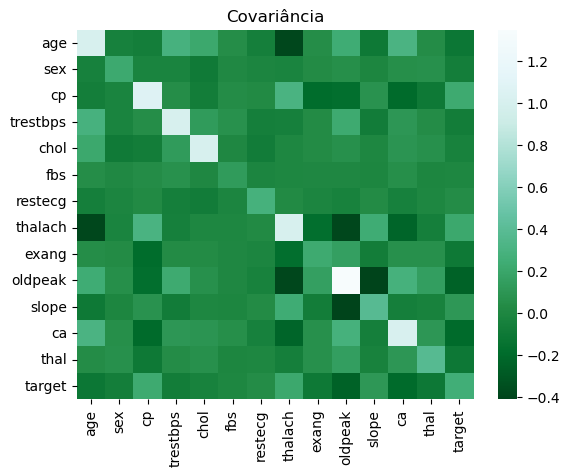

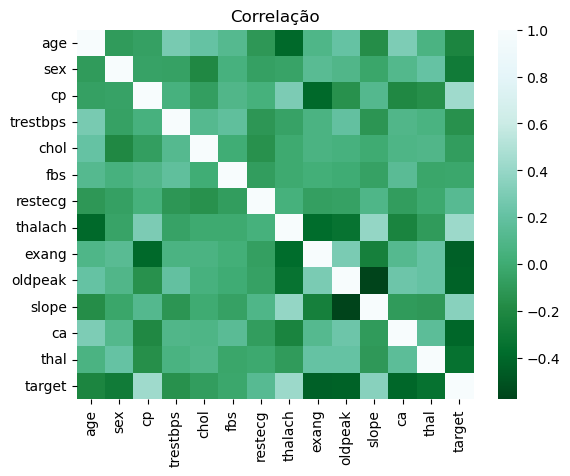

In [17]:
# Criando uma matriz X com os valores do dataframe usando mapa de cores
X = df.iloc[:, :-1].values

# Matriz de covariância
covariance = np.cov(X, rowvar=False)

# Matriz de correlação
correlation = np.corrcoef(X, rowvar=False)

# Matriz de covariância
df_covariance = df.cov()

# Matriz de correlação
df_correlation = df.corr()

# Cria um mapa de cores dos valores da covariância com paleta de tons pastéis
sns.heatmap(df_covariance, xticklabels=df_correlation.columns, yticklabels=df_correlation.columns, cmap='BuGn_r')

plt.title('Covariância')
plt.show()

# Cria um mapa de cores dos valores da correlação com paleta de tons pastéis
sns.heatmap(df_correlation, xticklabels=df_correlation.columns, yticklabels=df_correlation.columns, cmap='BuGn_r')

plt.title('Correlação')
plt.show()

## Overfitting e underfitting

O underfitting e o overfitting são dois problemas comuns que podem surgir ao treinar modelos de aprendizagem de máquina. Ambos representam extremos indesejados no processo de aprendizado, resultando em modelos que não são capazes de generalizar bem para novos dados. Compreender esses conceitos é fundamental para criar modelos de aprendizagem de máquina eficazes e robustos.

**Underfitting:** ocorre quando um modelo é muito simples para capturar a complexidade dos dados de treinamento. O modelo não consegue se ajustar adequadamente aos padrões e relacionamentos presentes nos dados, resultando em um desempenho deficiente tanto nos dados de treinamento quanto nos novos dados. Em essência, o modelo subajusta os dados e não consegue aprender o suficiente para fazer previsões precisas.

As principais causas do underfitting incluem:
- Uso de um modelo muito simples ou com baixa capacidade.
- Falta de recursos relevantes ou características importantes nos dados de treinamento.
- Treinamento insuficiente do modelo.

**Overfitting:** ocorre quando um modelo se torna muito complexo e se ajusta demais aos dados de treinamento. O modelo não apenas aprende os padrões presentes nos dados, mas também memoriza o ruído ou a variabilidade inerente aos dados de treinamento. Como resultado, o modelo apresenta um excelente desempenho nos dados de treinamento, mas não é capaz de generalizar bem para novos dados, resultando em previsões imprecisas e menos confiáveis.

As principais causas do overfitting incluem:
- Uso de um modelo muito complexo ou com alta capacidade.
- Treinamento excessivo do modelo nos dados de treinamento, resultando em memorização do ruído.

<div class="alert alert-block alert-warning"
     <b> Observação: Os atributos foram analisados de maneira bidimensional devido a complexidade do algoritmo e gasto no disco, logo, foi utilizado as matrizes de covariância e correlação para escolher de maneira criteriosa. </b>
</div>

### Analisando overfitting e underfitting com distância Euclideana

A distância euclidiana é uma métrica amplamente utilizada em análise de dados e aprendizado de máquina para medir a similaridade ou dissimilaridade entre pontos em um espaço n-dimensional. Essa métrica é derivada da geometria euclidiana e é amplamente empregada em diversos campos devido às suas vantagens, apesar de algumas limitações.

**Vantagens da Distância Euclidiana:**

1. **Simplicidade e Intuitividade:** A distância euclidiana é uma medida simples e intuitiva de separação entre pontos em um espaço. Ela se baseia no teorema de Pitágoras, tornando-a fácil de entender e implementar.

2. **Aplicabilidade Multidimensional:** A distância euclidiana é aplicável em espaços de várias dimensões, permitindo lidar com problemas complexos em ciência de dados e aprendizado de máquina.

3. **Compatibilidade com Algoritmos de Aprendizado:** Muitos algoritmos de aprendizado de máquina, como k-NN (k-Nearest Neighbors) e k-means, utilizam a distância euclidiana como base para classificação e agrupamento de dados, aproveitando sua simplicidade e eficácia.

4. **Interpretabilidade:** Os valores da distância euclidiana têm uma interpretação natural em termos de proximidade espacial, o que facilita a análise e visualização dos dados.

**Desvantagens da Distância Euclidiana:**

1. **Sensibilidade a Escala:** A distância euclidiana é sensível à escala dos atributos nos dados. Quando os atributos possuem escalas diferentes, aqueles com maiores valores podem dominar a distância, distorcendo os resultados.

2. **Vieses em Espaços de Alta Dimensionalidade:** Em espaços de alta dimensão, a chamada "maldição da dimensionalidade" pode tornar a distância euclidiana menos eficaz, pois a densidade dos dados se espalha de maneira uniforme, tornando os pontos cada vez mais distantes uns dos outros.

3. **Não Robustez a Outliers:** A presença de outliers pode distorcer a medida da distância euclidiana, tornando-a menos robusta em conjuntos de dados com valores discrepantes.

**Por que Usar a Distância Euclidiana?**

Apesar de suas limitações, a distância euclidiana ainda é amplamente utilizada e recomendada em muitos casos de análise de dados e aprendizado de máquina. Suas vantagens em termos de simplicidade, aplicabilidade e interpretabilidade a tornam uma escolha razoável em muitas situações. Além disso, muitos algoritmos de aprendizado de máquina são projetados para usar a distância euclidiana como base, o que facilita sua adoção e implementação. No entanto, é importante considerar as limitações da distância euclidiana em certos cenários. Em casos de dados com múltiplas escalas, alta dimensionalidade ou presença de outliers, outras métricas de distância ou técnicas de pré-processamento podem ser mais adequadas para garantir uma análise mais precisa e robusta.

### Idade e Frequência Cardíaca

(302, 2)


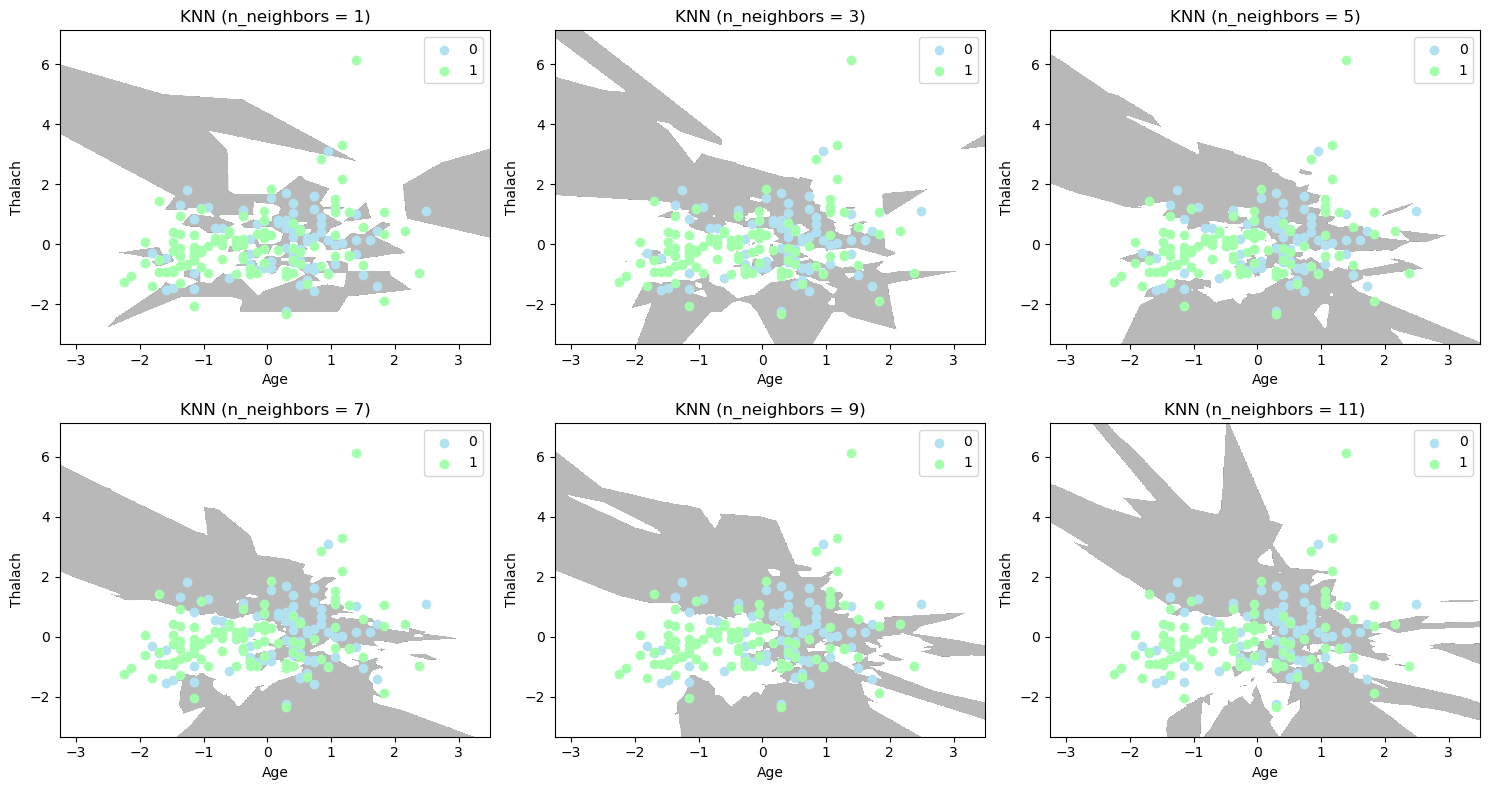

In [22]:
# Biblioteca para ocultar mensagens de aviso
import warnings

# Definição dos dados
from sklearn.preprocessing import StandardScaler
X = df.iloc[:, [0,4]].values
print(X.shape)

# Desabilitar o aviso FutureWarning específico para o 'mode' do SciPy
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

# Definindo a coluna 13 (Output) como preditivo
y = df.iloc[:, 13].values

# Definição do conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Definição dos valores de n_neighbors
n_neighbors_values = [1, 3, 5, 7, 9, 11]

# Criação dos Gráficos
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Iteração sobre os valores de n_neighbors
for i, n_neighbors in enumerate(n_neighbors_values):

    # Treinamento do algoritmo
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors, metric="euclidean")
    classifier.fit(X_train, y_train)

    # Limite de Decisão
    ax = axs[i // 3, i % 3]
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
    ax.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha=0.75, cmap=ListedColormap(('#a2a0a1', 'white')))
    ax.set_xlim(X1.min(), X1.max())
    ax.set_ylim(X2.min(), X2.max())

    # Plotagem dos pontos de treinamento
    colors = ('#b2e2f2', '#a3ffac')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    for j, label in enumerate(np.unique(y_set)):
        ax.scatter(X_set[y_set == label, 0], X_set[y_set == label, 1],
                   color=cmap(j), label=str(label))

    ax.set_title(f'KNN (n_neighbors = {n_neighbors})')
    ax.set_xlabel('Age')
    ax.set_ylabel('Thalach')
    ax.legend()

# Ajuste Automático do Espaçamento
plt.tight_layout()

# Apresentação do Resultado
plt.show()

### Inclinação e Depressão do Segmento ST

(302, 2)


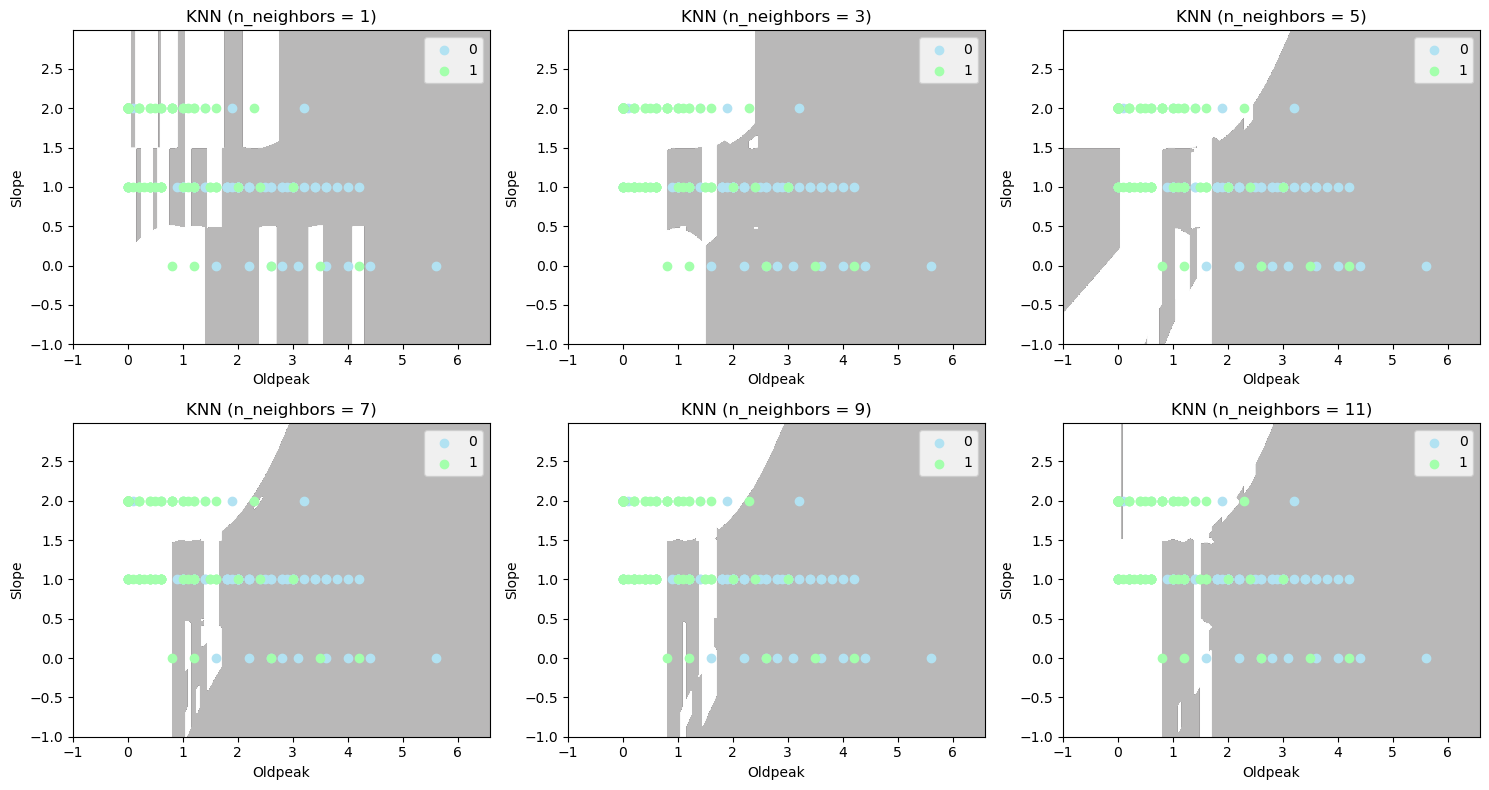

In [21]:
# Biblioteca para ocultar mensagens de aviso
import warnings

# Definição dos dados
from sklearn.preprocessing import StandardScaler
X = df.iloc[:, [9,10]].values
print(X.shape)

# Desabilitar o aviso FutureWarning específico para o 'mode' do SciPy
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

# Definindo a coluna 13 (Output) como preditivo
y = df.iloc[:, 13].values

# Definição do conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Definição dos valores de n_neighbors
n_neighbors_values = [1, 3, 5, 7, 9, 11]

# Criação dos Gráficos
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Iteração sobre os valores de n_neighbors
for i, n_neighbors in enumerate(n_neighbors_values):

    # Treinamento do algoritmo
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors, metric="euclidean")
    classifier.fit(X_train, y_train)

    # Limite de Decisão
    ax = axs[i // 3, i % 3]
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
    ax.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha=0.75, cmap=ListedColormap(('#a2a0a1', 'white')))
    ax.set_xlim(X1.min(), X1.max())
    ax.set_ylim(X2.min(), X2.max())

    # Plotagem dos pontos de treinamento
    colors = ('#b2e2f2', '#a3ffac')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    for j, label in enumerate(np.unique(y_set)):
        ax.scatter(X_set[y_set == label, 0], X_set[y_set == label, 1],
                   color=cmap(j), label=str(label))

    ax.set_title(f'KNN (n_neighbors = {n_neighbors})')
    ax.set_xlabel('Oldpeak')
    ax.set_ylabel('Slope')
    ax.legend()

# Ajuste Automático do Espaçamento
plt.tight_layout()

# Apresentação do Resultado
plt.show()

### Frequência Cardíaca e Inclinação do Segmento ST

(302, 2)


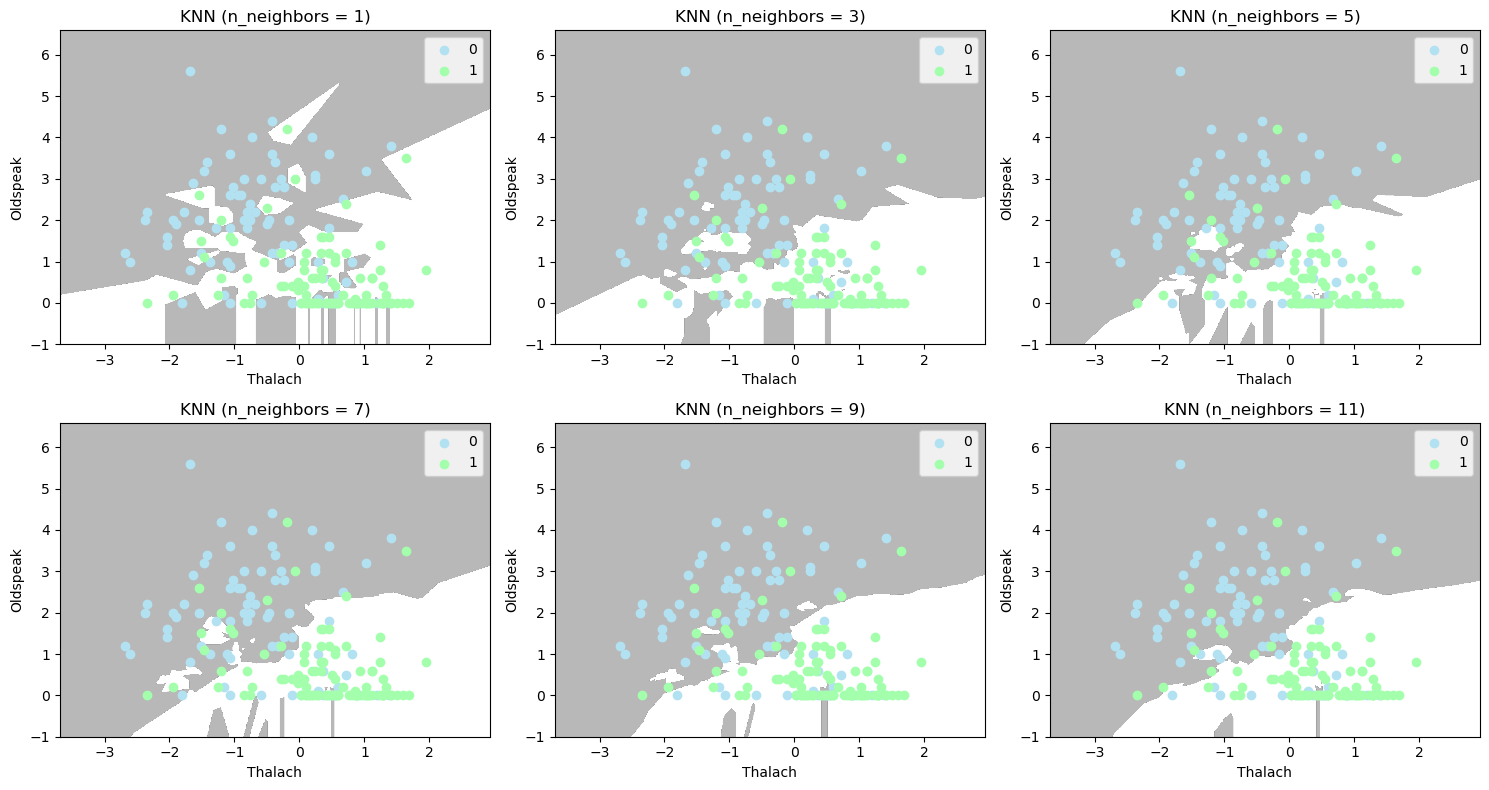

In [20]:
# Biblioteca para ocultar mensagens de aviso
import warnings

# Definição dos dados
from sklearn.preprocessing import StandardScaler
X = df.iloc[:, [7,9]].values
print(X.shape)

# Desabilitar o aviso FutureWarning específico para o 'mode' do SciPy
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

# Definindo a coluna 13 (Output) como preditivo
y = df.iloc[:, 13].values

# Definição do conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Definição dos valores de n_neighbors
n_neighbors_values = [1, 3, 5, 7, 9, 11]

# Criação dos Gráficos
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Iteração sobre os valores de n_neighbors
for i, n_neighbors in enumerate(n_neighbors_values):

    # Treinamento do algoritmo
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors, metric="euclidean")
    classifier.fit(X_train, y_train)

    # Limite de Decisão
    ax = axs[i // 3, i % 3]
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
    ax.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha=0.75, cmap=ListedColormap(('#a2a0a1', 'white')))
    ax.set_xlim(X1.min(), X1.max())
    ax.set_ylim(X2.min(), X2.max())

    # Plotagem dos pontos de treinamento
    colors = ('#b2e2f2', '#a3ffac')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    for j, label in enumerate(np.unique(y_set)):
        ax.scatter(X_set[y_set == label, 0], X_set[y_set == label, 1],
                   color=cmap(j), label=str(label))

    ax.set_title(f'KNN (n_neighbors = {n_neighbors})')
    ax.set_xlabel('Thalach')
    ax.set_ylabel('Oldspeak')
    ax.legend()

# Ajuste Automático do Espaçamento
plt.tight_layout()

# Apresentação do Resultado
plt.show()

### Analisando overfitting e underfitting com distância de Jaccard

A distância de Jaccard, também conhecida como índice de Jaccard ou coeficiente de Jaccard, é uma métrica amplamente utilizada para medir a similaridade entre conjuntos. Essa métrica é particularmente útil quando estamos lidando com dados categóricos, onde a presença ou ausência de elementos é mais relevante do que a magnitude ou valores numéricos.

A distância de Jaccard é calculada pela divisão do tamanho da interseção dos conjuntos pelo tamanho da união dos conjuntos. Em outras palavras, ela mede a proporção de elementos comuns entre os conjuntos em relação ao total de elementos distintos entre eles. Seja A e B dois conjuntos:
Distância de Jaccard (J) = |A ∩ B| / |A ∪ B|

**Vantagens da Distância de Jaccard:**

1. **Trata Dados Categóricos:** A distância de Jaccard é especialmente útil quando temos dados categóricos, como palavras, tags, categorias, etc. Ela não requer a noção de distância ou magnitude, apenas a informação sobre a presença ou ausência de elementos.

2. **Invariante à Escala:** A métrica é invariante à escala, o que significa que a adição de elementos ou repetição não afeta o resultado, tornando-a adequada para conjuntos de diferentes tamanhos.

3. **Eficiência Computacional:** O cálculo da distância de Jaccard é computacionalmente eficiente, mesmo para grandes conjuntos de dados, tornando-a viável para problemas de grande escala.

**Desvantagens da Distância de Jaccard:**

1. **Desconsidera Informação de Quantidade:** A distância de Jaccard não leva em conta a quantidade ou frequência dos elementos nos conjuntos, apenas sua presença ou ausência. Isso pode ser problemático em algumas situações em que a frequência dos elementos é importante.

2. **Sensível a Elementos Comuns:** A métrica pode ser sensível a elementos comuns em ambos os conjuntos, o que pode levar a resultados enganosos, especialmente quando os conjuntos são grandes e possuem muitos elementos compartilhados.

**Quando Usar a Distância de Jaccard:**

A distância de Jaccard é amplamente utilizada em várias aplicações, incluindo:

- Mineração de dados e análise de similaridade de conjuntos.
- Recomendação de itens com base em preferências ou interesses comuns.
- Comparação de textos, documentos e categorização de tópicos.
- Agrupamento (clustering) de dados categóricos.

### Idade e Frequência Cardíaca

(302, 2)


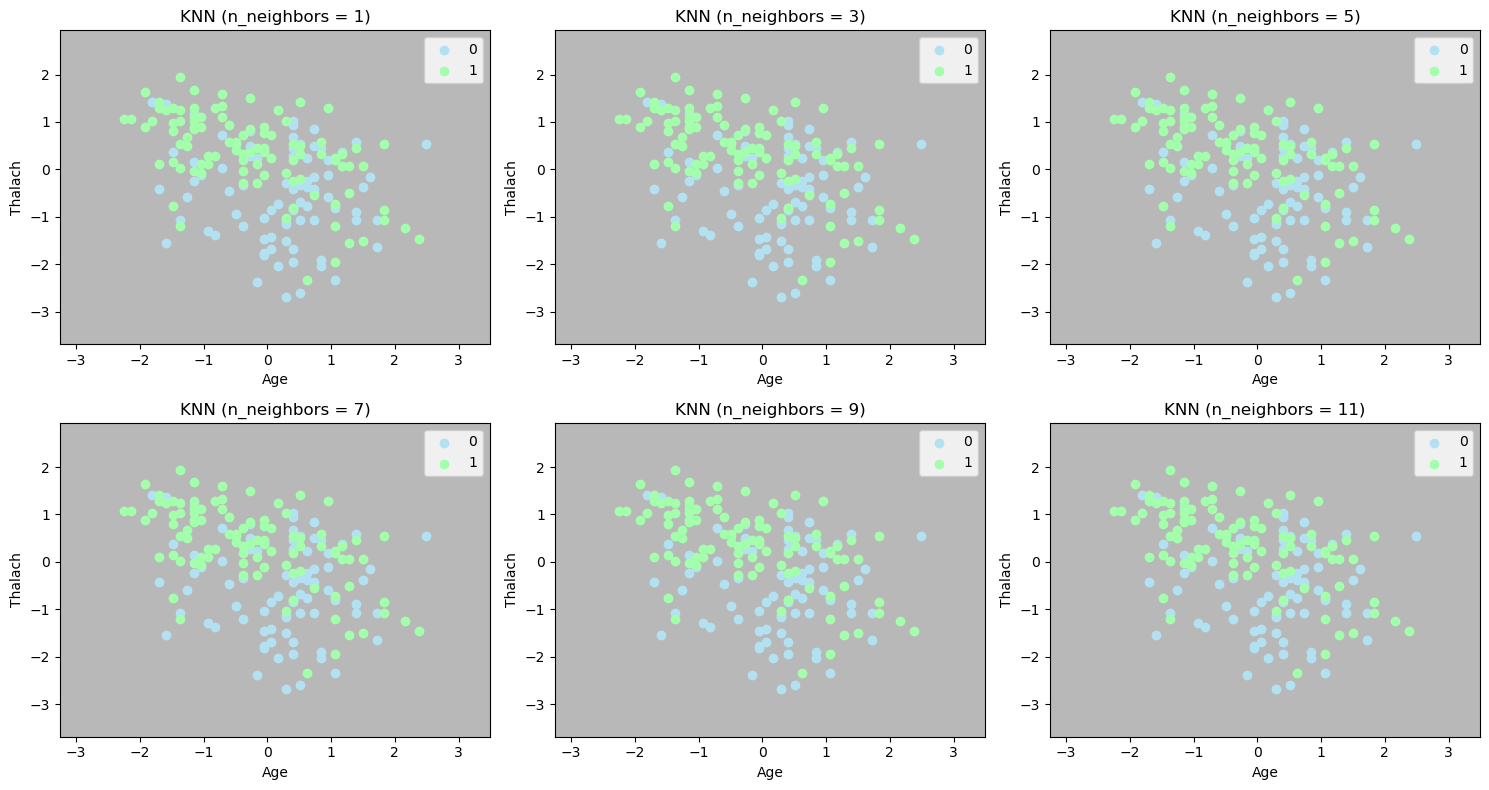

In [23]:
# Biblioteca para ocultar mensagens de aviso
import warnings

# Definição dos dados
from sklearn.preprocessing import StandardScaler
X = df.iloc[:, [0,7]].values
print(X.shape)

# Desabilitar o aviso FutureWarning específico para o 'mode' do SciPy
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

# Definindo a coluna 13 (Output) como preditivo
y = df.iloc[:, 13].values

# Definição do conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Definição dos valores de n_neighbors
n_neighbors_values = [1, 3, 5, 7, 9, 11]

# Criação dos Gráficos
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Iteração sobre os valores de n_neighbors
for i, n_neighbors in enumerate(n_neighbors_values):

    # Treinamento do algoritmo
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors, metric="jaccard")
    classifier.fit(X_train, y_train)

    # Limite de Decisão
    ax = axs[i // 3, i % 3]
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
    ax.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha=0.75, cmap=ListedColormap(('#a2a0a1', 'white')))
    ax.set_xlim(X1.min(), X1.max())
    ax.set_ylim(X2.min(), X2.max())

    # Plotagem dos pontos de treinamento
    colors = ('#b2e2f2', '#a3ffac')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    for j, label in enumerate(np.unique(y_set)):
        ax.scatter(X_set[y_set == label, 0], X_set[y_set == label, 1],
                   color=cmap(j), label=str(label))

    ax.set_title(f'KNN (n_neighbors = {n_neighbors})')
    ax.set_xlabel('Age')
    ax.set_ylabel('Thalach')
    ax.legend()

# Ajuste Automático do Espaçamento
plt.tight_layout()

# Apresentação do Resultado
plt.show()

### Inclinação e Depressão do Segmento ST

(302, 2)


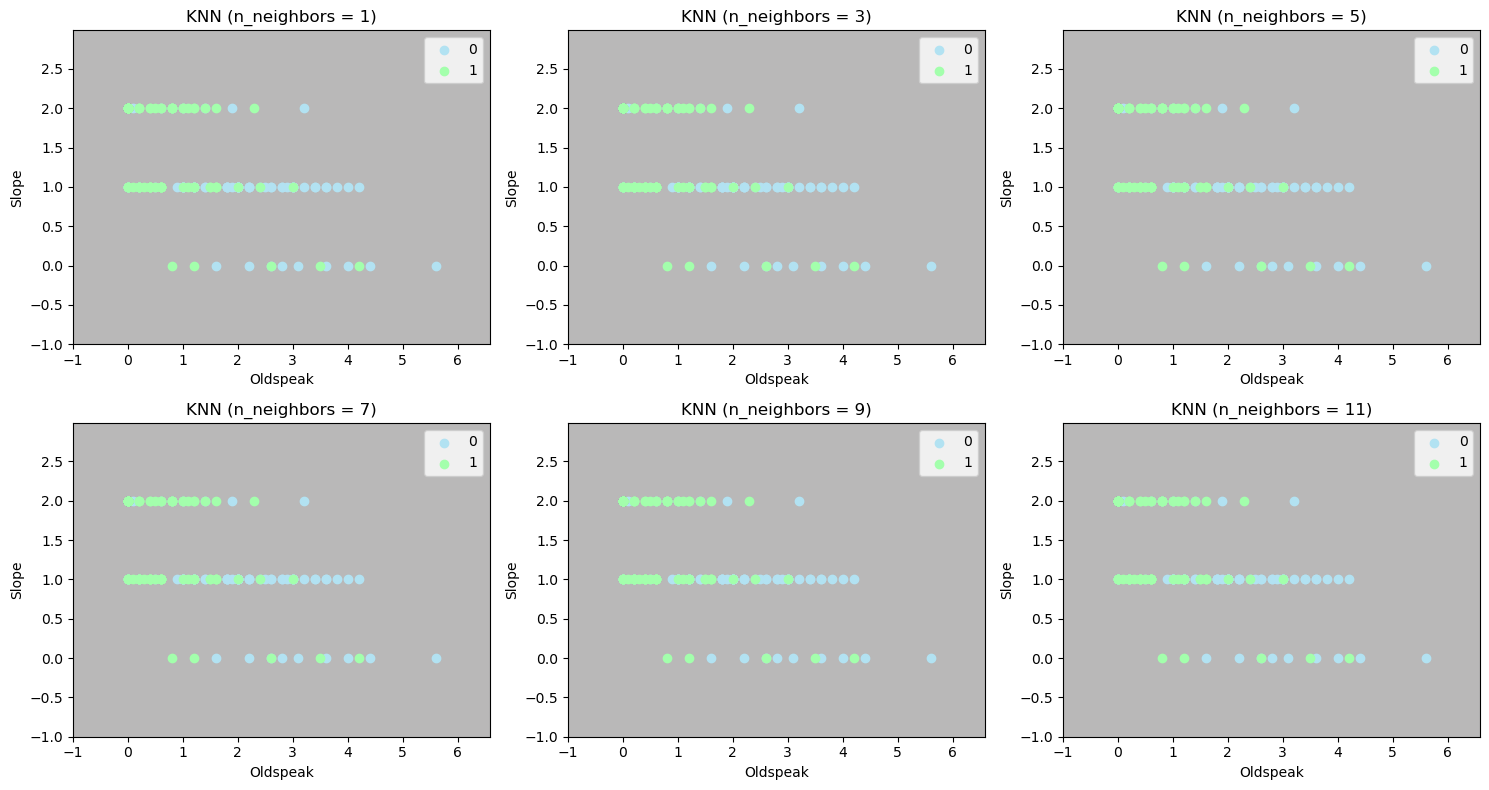

In [24]:
# Biblioteca para ocultar mensagens de aviso
import warnings

# Definição dos dados
from sklearn.preprocessing import StandardScaler
X = df.iloc[:, [9,10]].values
print(X.shape)

# Desabilitar o aviso FutureWarning específico para o 'mode' do SciPy
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

# Definindo a coluna 13 (Output) como preditivo
y = df.iloc[:, 13].values

# Definição do conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Definição dos valores de n_neighbors
n_neighbors_values = [1, 3, 5, 7, 9, 11]

# Criação dos Gráficos
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Iteração sobre os valores de n_neighbors
for i, n_neighbors in enumerate(n_neighbors_values):

    # Treinamento do algoritmo
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors, metric="jaccard")
    classifier.fit(X_train, y_train)

    # Limite de Decisão
    ax = axs[i // 3, i % 3]
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
    ax.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha=0.75, cmap=ListedColormap(('#a2a0a1', 'white')))
    ax.set_xlim(X1.min(), X1.max())
    ax.set_ylim(X2.min(), X2.max())

    # Plotagem dos pontos de treinamento
    colors = ('#b2e2f2', '#a3ffac')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    for j, label in enumerate(np.unique(y_set)):
        ax.scatter(X_set[y_set == label, 0], X_set[y_set == label, 1],
                   color=cmap(j), label=str(label))

    ax.set_title(f'KNN (n_neighbors = {n_neighbors})')
    ax.set_xlabel('Oldspeak')
    ax.set_ylabel('Slope')
    ax.legend()

# Ajuste Automático do Espaçamento
plt.tight_layout()

# Apresentação do Resultado
plt.show()

### Frequência Cardíaca e Inclinação do Segmento ST

(302, 2)


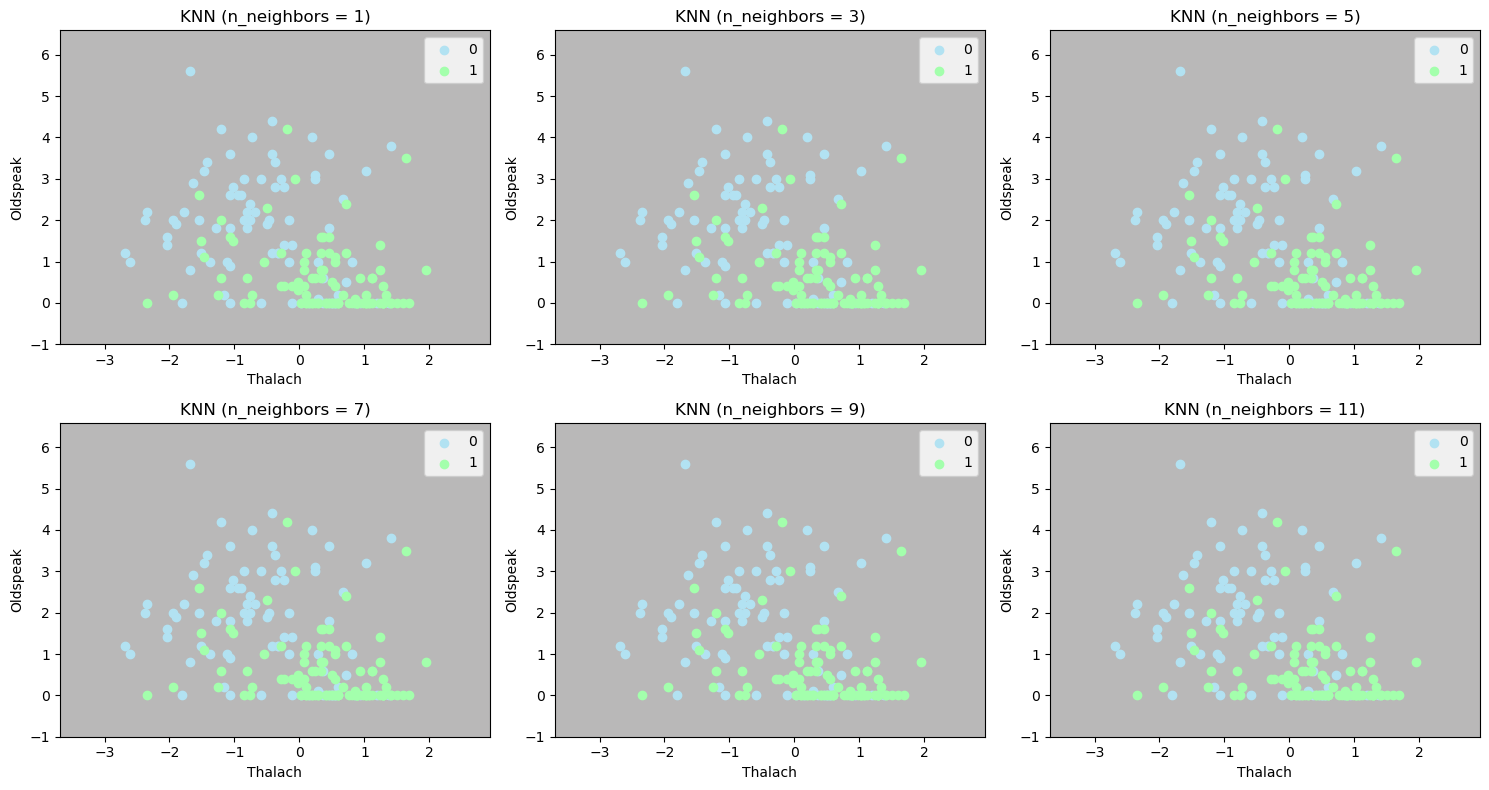

In [25]:
# Biblioteca para ocultar mensagens de aviso
import warnings

# Definição dos dados
from sklearn.preprocessing import StandardScaler
X = df.iloc[:, [7,9]].values
print(X.shape)

# Desabilitar o aviso FutureWarning específico para o 'mode' do SciPy
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

# Definindo a coluna 13 (Output) como preditivo
y = df.iloc[:, 13].values

# Definição do conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Definição dos valores de n_neighbors
n_neighbors_values = [1, 3, 5, 7, 9, 11]

# Criação dos Gráficos
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Iteração sobre os valores de n_neighbors
for i, n_neighbors in enumerate(n_neighbors_values):

    # Treinamento do algoritmo
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors, metric="jaccard")
    classifier.fit(X_train, y_train)

    # Limite de Decisão
    ax = axs[i // 3, i % 3]
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
    ax.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha=0.75, cmap=ListedColormap(('#a2a0a1', 'white')))
    ax.set_xlim(X1.min(), X1.max())
    ax.set_ylim(X2.min(), X2.max())

    # Plotagem dos pontos de treinamento
    colors = ('#b2e2f2', '#a3ffac')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    for j, label in enumerate(np.unique(y_set)):
        ax.scatter(X_set[y_set == label, 0], X_set[y_set == label, 1],
                   color=cmap(j), label=str(label))

    ax.set_title(f'KNN (n_neighbors = {n_neighbors})')
    ax.set_xlabel('Thalach')
    ax.set_ylabel('Oldspeak')
    ax.legend()

# Ajuste Automático do Espaçamento
plt.tight_layout()

# Apresentação do Resultado
plt.show()

### Analisando overfitting e underfitting com distância de Chebyshev

A distância de Chebyshev é uma métrica usada para calcular a distância entre dois pontos em um espaço métrico. Essa medida é definida como o maior valor absoluto da diferença entre as coordenadas dos pontos em cada dimensão.

**Vantagens da Distância de Chebyshev:**
1. **Simplicidade Matemática:** O cálculo da distância de Chebyshev é relativamente simples e não requer operações complexas, como raízes quadradas, como em outras métricas, como a distância euclidiana.

2. **Robustez a Outliers:** A distância de Chebyshev é menos sensível a outliers em comparação com a distância euclidiana. Outliers são pontos que estão longe dos demais pontos no conjunto de dados e podem distorcer a medida de distância. Como a distância de Chebyshev é baseada na maior diferença entre as coordenadas, os outliers têm menos influência sobre ela.

3. **Apropriada para Algumas Aplicações Específicas:** A distância de Chebyshev pode ser útil em algumas aplicações específicas, como jogos de tabuleiro, onde se deseja calcular o número mínimo de movimentos para alcançar uma posição final.

**Desvantagens da Distância de Chebyshev:**

1. **Falta de Sensibilidade à Orientação:** A distância de Chebyshev não leva em consideração a orientação dos pontos no espaço. Isso significa que pontos que estão alinhados em uma determinada direção podem ser considerados muito próximos, mesmo que sua orientação seja relevante para o problema.

2. **Limitação a Dimensões Iguais:** A distância de Chebyshev é mais adequada para espaços métricos com o mesmo número de dimensões. Em espaços com dimensões diferentes, pode ser mais apropriado utilizar outras métricas, como a distância de Minkowski.

**Quando Usar a Distância de Chebyshev:**

A distância de Chebyshev é especialmente útil nas seguintes situações:

1. **Problemas Geométricos:** Quando estamos lidando com problemas geométricos em que a orientação não é relevante e a medida de distância baseada no maior deslocamento é suficiente.

2. **Dados com Outliers:** Se os dados contiverem outliers, a distância de Chebyshev pode ser preferível à distância euclidiana, pois ela é menos sensível a pontos extremos.

3. **Minimizar Computação:** Em alguns casos, podemos preferir a distância de Chebyshev devido à sua simplicidade computacional, especialmente quando a eficiência é um fator crítico.

### Idade e Frequência Cardíaca

(302, 2)


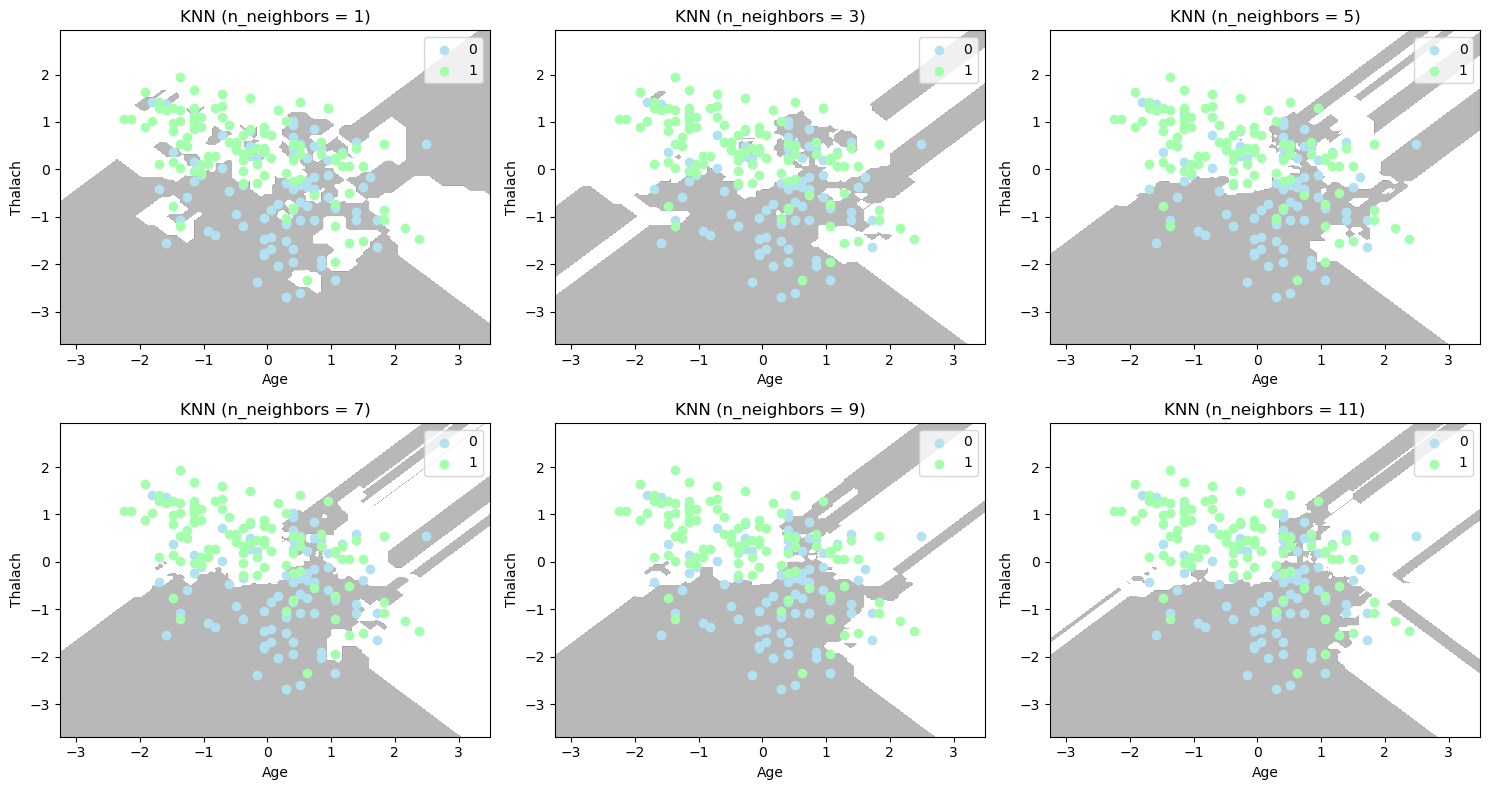

In [26]:
# Biblioteca para ocultar mensagens de aviso
import warnings

# Definição dos dados
from sklearn.preprocessing import StandardScaler
X = df.iloc[:, [0,7]].values
print(X.shape)

# Desabilitar o aviso FutureWarning específico para o 'mode' do SciPy
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

# Definindo a coluna 13 (Output) como preditivo
y = df.iloc[:, 13].values

# Definição do conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Definição dos valores de n_neighbors
n_neighbors_values = [1, 3, 5, 7, 9, 11]

# Criação dos Gráficos
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Iteração sobre os valores de n_neighbors
for i, n_neighbors in enumerate(n_neighbors_values):

    # Treinamento do algoritmo
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors, metric="chebyshev")
    classifier.fit(X_train, y_train)

    # Limite de Decisão
    ax = axs[i // 3, i % 3]
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
    ax.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha=0.75, cmap=ListedColormap(('#a2a0a1', 'white')))
    ax.set_xlim(X1.min(), X1.max())
    ax.set_ylim(X2.min(), X2.max())

    # Plotagem dos pontos de treinamento
    colors = ('#b2e2f2', '#a3ffac')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    for j, label in enumerate(np.unique(y_set)):
        ax.scatter(X_set[y_set == label, 0], X_set[y_set == label, 1],
                   color=cmap(j), label=str(label))

    ax.set_title(f'KNN (n_neighbors = {n_neighbors})')
    ax.set_xlabel('Age')
    ax.set_ylabel('Thalach')
    ax.legend()

# Ajuste Automático do Espaçamento
plt.tight_layout()

# Apresentação do Resultado
plt.show()

### Inclinação e Depressão do Segmento ST

(302, 2)


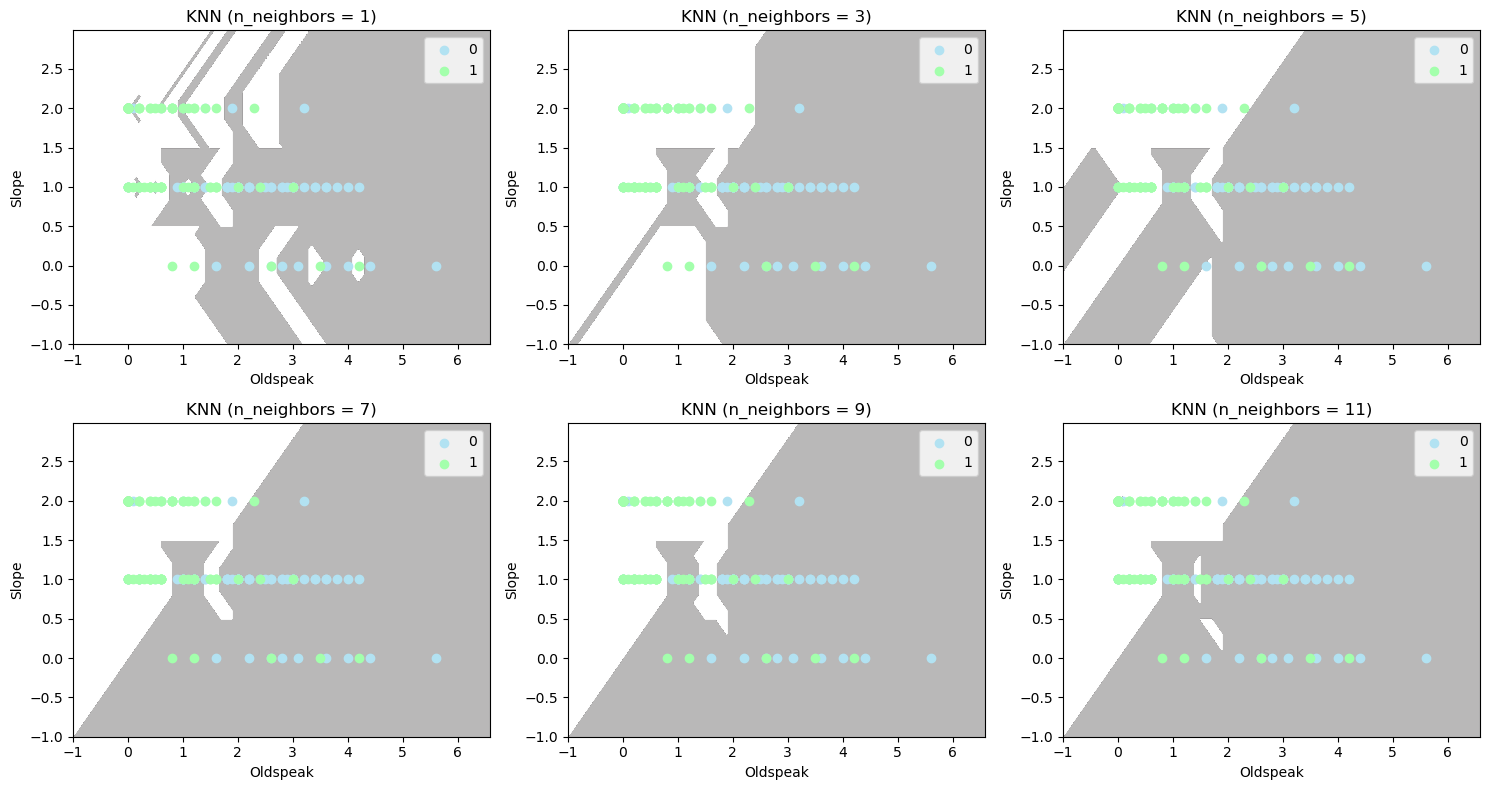

In [27]:
# Biblioteca para ocultar mensagens de aviso
import warnings

# Definição dos dados
from sklearn.preprocessing import StandardScaler
X = df.iloc[:, [9,10]].values
print(X.shape)

# Desabilitar o aviso FutureWarning específico para o 'mode' do SciPy
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

# Definindo a coluna 13 (Output) como preditivo
y = df.iloc[:, 13].values

# Definição do conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Definição dos valores de n_neighbors
n_neighbors_values = [1, 3, 5, 7, 9, 11]

# Criação dos Gráficos
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Iteração sobre os valores de n_neighbors
for i, n_neighbors in enumerate(n_neighbors_values):

    # Treinamento do algoritmo
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors, metric="chebyshev")
    classifier.fit(X_train, y_train)

    # Limite de Decisão
    ax = axs[i // 3, i % 3]
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
    ax.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha=0.75, cmap=ListedColormap(('#a2a0a1', 'white')))
    ax.set_xlim(X1.min(), X1.max())
    ax.set_ylim(X2.min(), X2.max())

    # Plotagem dos pontos de treinamento
    colors = ('#b2e2f2', '#a3ffac')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    for j, label in enumerate(np.unique(y_set)):
        ax.scatter(X_set[y_set == label, 0], X_set[y_set == label, 1],
                   color=cmap(j), label=str(label))

    ax.set_title(f'KNN (n_neighbors = {n_neighbors})')
    ax.set_xlabel('Oldspeak')
    ax.set_ylabel('Slope')
    ax.legend()

# Ajuste Automático do Espaçamento
plt.tight_layout()

# Apresentação do Resultado
plt.show()

### Frequência Cardíaca e Inclinação do Segmento ST

(302, 2)


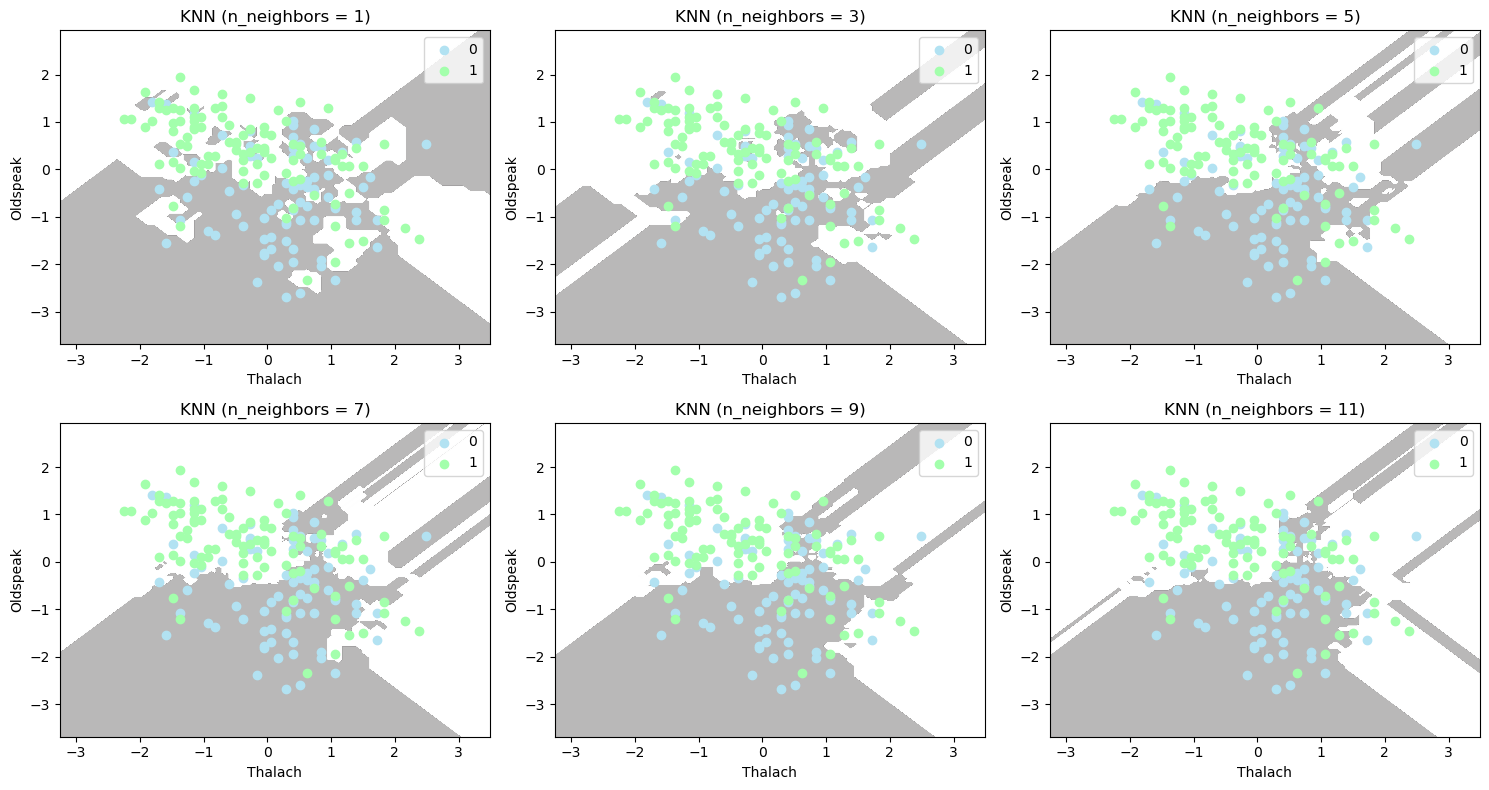

In [28]:
# Biblioteca para ocultar mensagens de aviso
import warnings

# Definição dos dados
from sklearn.preprocessing import StandardScaler
X = df.iloc[:, [0,7]].values
print(X.shape)

# Desabilitar o aviso FutureWarning específico para o 'mode' do SciPy
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

# Definindo a coluna 13 (Output) como preditivo
y = df.iloc[:, 13].values

# Definição do conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Definição dos valores de n_neighbors
n_neighbors_values = [1, 3, 5, 7, 9, 11]

# Criação dos Gráficos
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Iteração sobre os valores de n_neighbors
for i, n_neighbors in enumerate(n_neighbors_values):

    # Treinamento do algoritmo
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors, metric="chebyshev")
    classifier.fit(X_train, y_train)

    # Limite de Decisão
    ax = axs[i // 3, i % 3]
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
    ax.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha=0.75, cmap=ListedColormap(('#a2a0a1', 'white')))
    ax.set_xlim(X1.min(), X1.max())
    ax.set_ylim(X2.min(), X2.max())

    # Plotagem dos pontos de treinamento
    colors = ('#b2e2f2', '#a3ffac')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    for j, label in enumerate(np.unique(y_set)):
        ax.scatter(X_set[y_set == label, 0], X_set[y_set == label, 1],
                   color=cmap(j), label=str(label))

    ax.set_title(f'KNN (n_neighbors = {n_neighbors})')
    ax.set_xlabel('Thalach')
    ax.set_ylabel('Oldspeak')
    ax.legend()

# Ajuste Automático do Espaçamento
plt.tight_layout()

# Apresentação do Resultado
plt.show()

### Analisando overfitting e underfitting com distância Cosine

A distância de Cosseno é uma métrica comumente utilizada na área de aprendizado de máquina e análise de dados para medir a similaridade entre vetores. Ela é especialmente útil quando se trabalha com dados de alta dimensão ou documentos textuais. A distância de Cosseno compara a direção dos vetores, ignorando suas magnitudes, tornando-a adequada para diversas aplicações.

**Vantagens da Distância de Cosseno:**

1. **Robustez a Magnitudes**: Uma das principais vantagens da distância de Cosseno é sua insensibilidade às magnitudes dos vetores. Ela considera apenas a orientação dos vetores, tornando-a útil quando a magnitude dos vetores não é tão relevante para a comparação.

2. **Lida com Dados Esparsos**: A distância de Cosseno é especialmente útil quando se trabalha com dados esparsos, como em sistemas de recomendação ou processamento de texto, onde a maioria dos valores é zero.

3. **Eficiência Computacional**: O cálculo da distância de Cosseno é computacionalmente eficiente, especialmente em comparação com outras métricas mais complexas, como a distância euclidiana.

4. **Facilidade de Interpretação**: A distância de Cosseno produz valores entre -1 e 1, onde -1 indica vetores opostos, 1 indica vetores idênticos e 0 indica vetores ortogonais. Essa interpretação facilita a compreensão das relações entre os vetores.

**Desvantagens da Distância de Cosseno:**

1. **Desconsidera Distâncias Euclidianas**: A distância de Cosseno é sensível apenas à orientação dos vetores e não leva em conta a distância euclidiana entre eles. Isso pode ser uma desvantagem em algumas aplicações em que a magnitude é relevante.

2. **Requer Vetores Não-Negativos**: A distância de Cosseno é aplicável apenas a vetores não-negativos. Se os dados incluírem valores negativos, outras métricas, como a distância euclidiana, podem ser mais apropriadas.

3. **Não Detecta Relações Lineares**: A distância de Cosseno não é capaz de detectar relações lineares entre os vetores, o que pode ser uma limitação em algumas situações.

**Quando Usar a Distância de Cosseno:**

A distância de Cosseno é recomendada em diversas situações, especialmente quando:

- Trabalhando com dados de alta dimensão, como em sistemas de recomendação ou análise de texto.
- Lidando com dados esparsos, onde a maioria dos valores é zero.
- Preocupado com a direção dos vetores e não com suas magnitudes.
- Interessado em medidas de similaridade que sejam eficientes computacionalmente.

### Idade e Frequência Cardíaca

(302, 2)


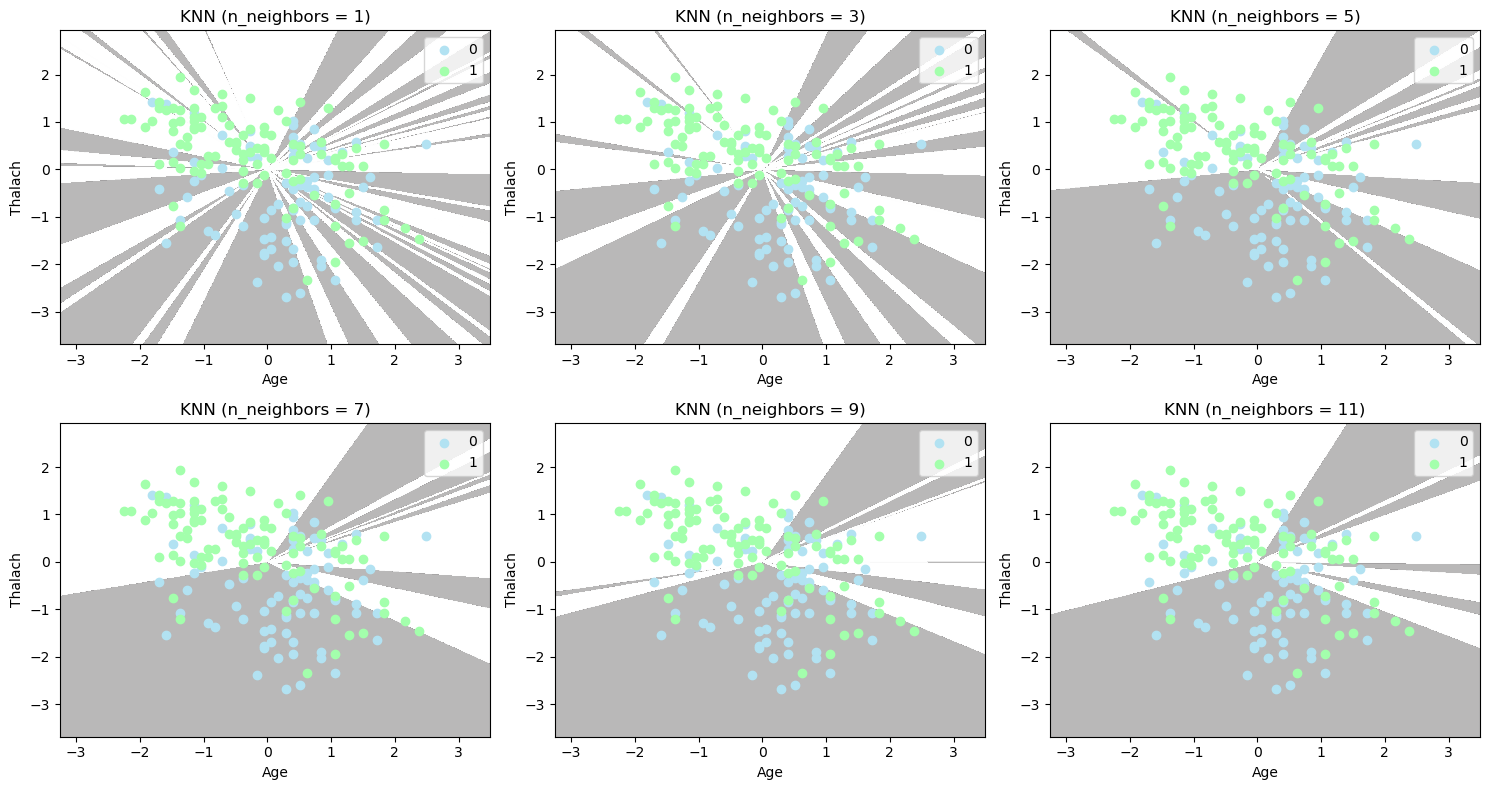

In [29]:
# Biblioteca para ocultar mensagens de aviso
import warnings

# Definição dos dados
from sklearn.preprocessing import StandardScaler
X = df.iloc[:, [0,7]].values
print(X.shape)

# Desabilitar o aviso FutureWarning específico para o 'mode' do SciPy
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

# Definindo a coluna 13 (Output) como preditivo
y = df.iloc[:, 13].values

# Definição do conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Definição dos valores de n_neighbors
n_neighbors_values = [1, 3, 5, 7, 9, 11]

# Criação dos Gráficos
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Iteração sobre os valores de n_neighbors
for i, n_neighbors in enumerate(n_neighbors_values):

    # Treinamento do algoritmo
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors, metric="cosine")
    classifier.fit(X_train, y_train)

    # Limite de Decisão
    ax = axs[i // 3, i % 3]
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
    ax.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha=0.75, cmap=ListedColormap(('#a2a0a1', 'white')))
    ax.set_xlim(X1.min(), X1.max())
    ax.set_ylim(X2.min(), X2.max())

    # Plotagem dos pontos de treinamento
    colors = ('#b2e2f2', '#a3ffac')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    for j, label in enumerate(np.unique(y_set)):
        ax.scatter(X_set[y_set == label, 0], X_set[y_set == label, 1],
                   color=cmap(j), label=str(label))

    ax.set_title(f'KNN (n_neighbors = {n_neighbors})')
    ax.set_xlabel('Age')
    ax.set_ylabel('Thalach')
    ax.legend()

# Ajuste Automático do Espaçamento
plt.tight_layout()

# Apresentação do Resultado
plt.show()

### Inclinação e Depressão do Segmento ST

(302, 2)


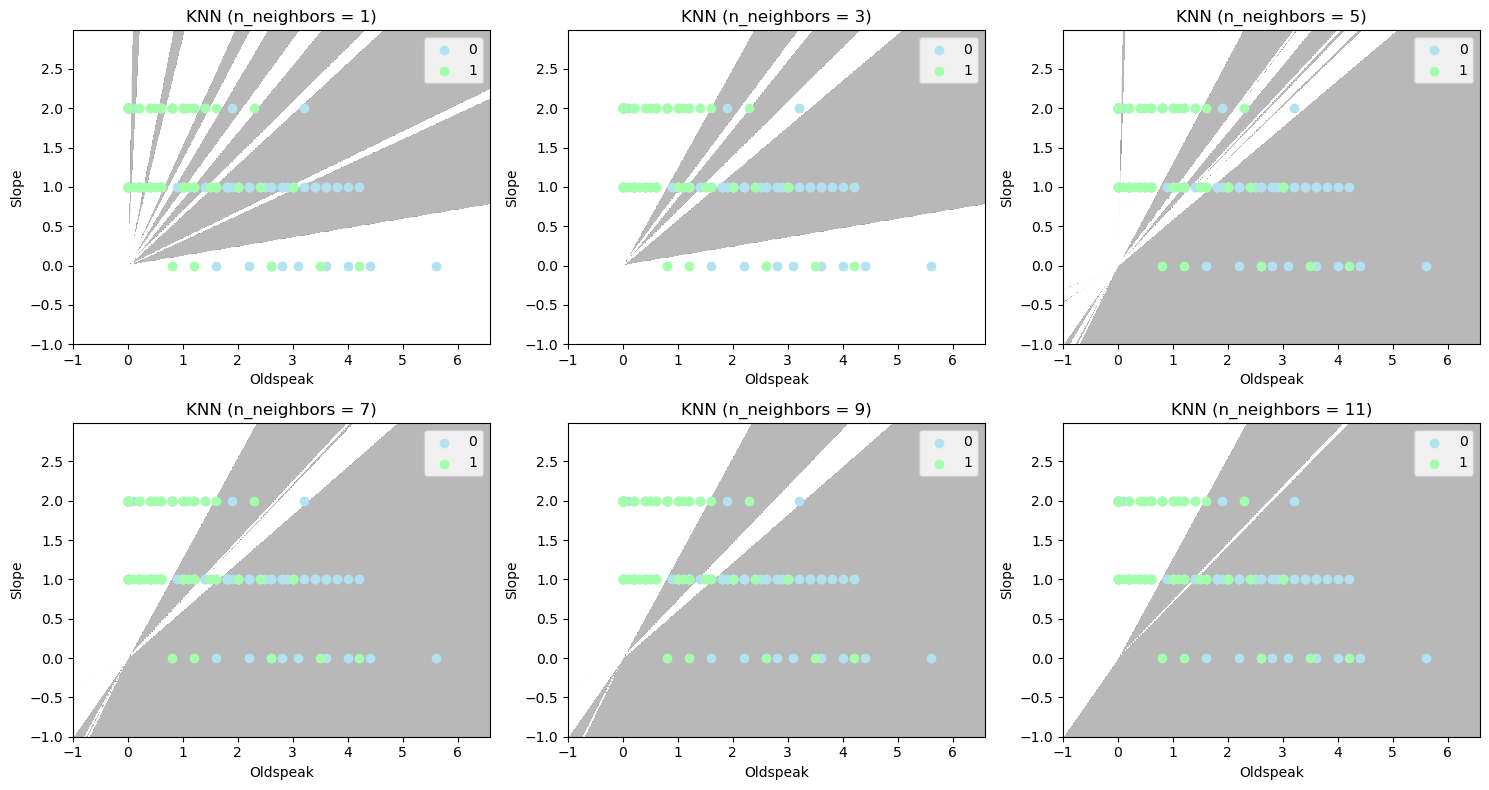

In [30]:
# Biblioteca para ocultar mensagens de aviso
import warnings

# Definição dos dados
from sklearn.preprocessing import StandardScaler
X = df.iloc[:, [9,10]].values
print(X.shape)

# Desabilitar o aviso FutureWarning específico para o 'mode' do SciPy
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

# Definindo a coluna 13 (Output) como preditivo
y = df.iloc[:, 13].values

# Definição do conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Definição dos valores de n_neighbors
n_neighbors_values = [1, 3, 5, 7, 9, 11]

# Criação dos Gráficos
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Iteração sobre os valores de n_neighbors
for i, n_neighbors in enumerate(n_neighbors_values):

    # Treinamento do algoritmo
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors, metric="cosine")
    classifier.fit(X_train, y_train)

    # Limite de Decisão
    ax = axs[i // 3, i % 3]
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
    ax.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha=0.75, cmap=ListedColormap(('#a2a0a1', 'white')))
    ax.set_xlim(X1.min(), X1.max())
    ax.set_ylim(X2.min(), X2.max())

    # Plotagem dos pontos de treinamento
    colors = ('#b2e2f2', '#a3ffac')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    for j, label in enumerate(np.unique(y_set)):
        ax.scatter(X_set[y_set == label, 0], X_set[y_set == label, 1],
                   color=cmap(j), label=str(label))

    ax.set_title(f'KNN (n_neighbors = {n_neighbors})')
    ax.set_xlabel('Oldspeak')
    ax.set_ylabel('Slope')
    ax.legend()

# Ajuste Automático do Espaçamento
plt.tight_layout()

# Apresentação do Resultado
plt.show()

### Frequência Cardíaca e Inclinação do Segmento ST

(302, 2)


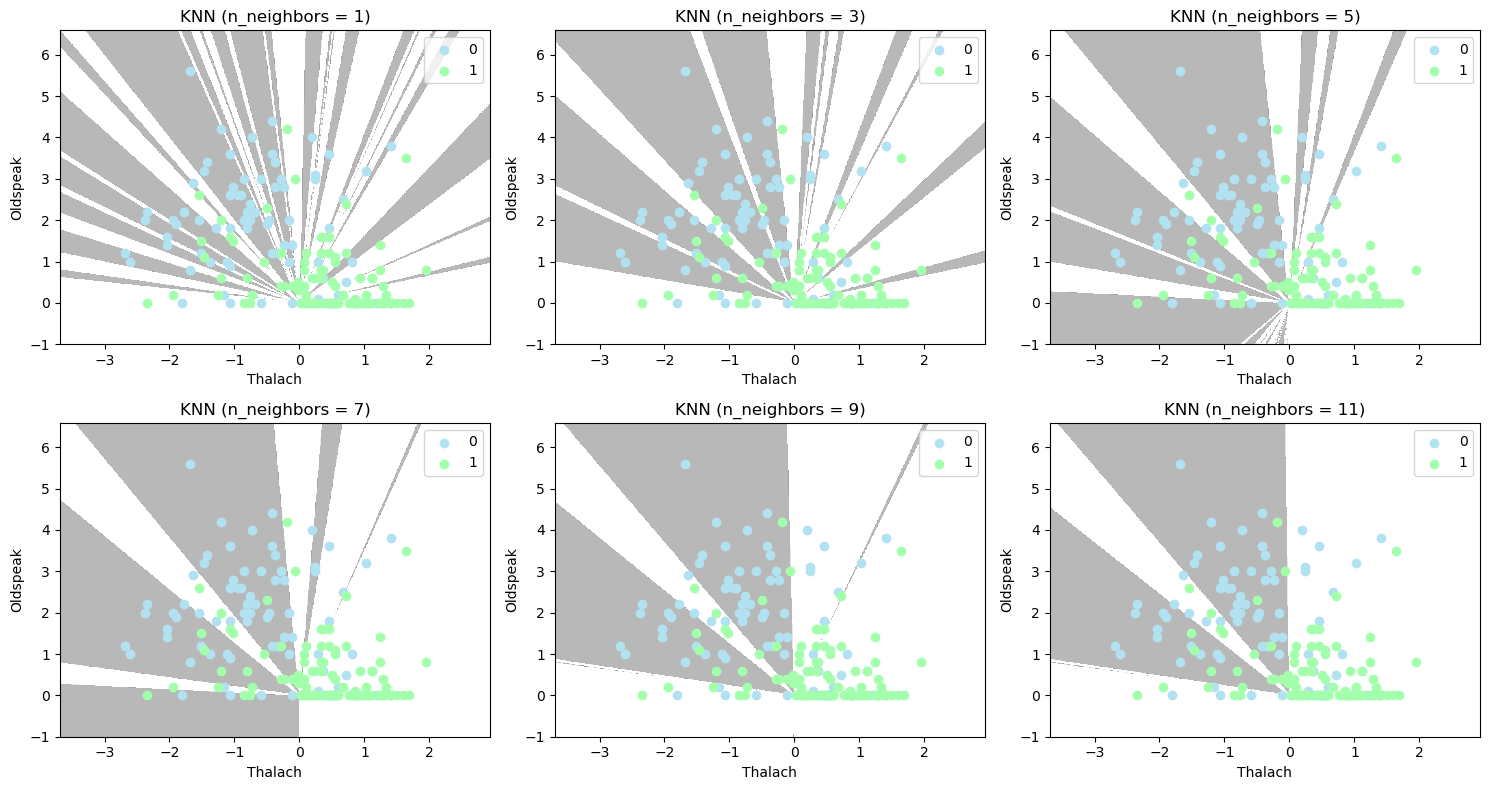

In [31]:
# Biblioteca para ocultar mensagens de aviso
import warnings

# Definição dos dados
from sklearn.preprocessing import StandardScaler
X = df.iloc[:, [7,9]].values
print(X.shape)

# Desabilitar o aviso FutureWarning específico para o 'mode' do SciPy
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

# Definindo a coluna 13 (Output) como preditivo
y = df.iloc[:, 13].values

# Definição do conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Definição dos valores de n_neighbors
n_neighbors_values = [1, 3, 5, 7, 9, 11]

# Criação dos Gráficos
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Iteração sobre os valores de n_neighbors
for i, n_neighbors in enumerate(n_neighbors_values):

    # Treinamento do algoritmo
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors, metric="cosine")
    classifier.fit(X_train, y_train)

    # Limite de Decisão
    ax = axs[i // 3, i % 3]
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
    ax.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha=0.75, cmap=ListedColormap(('#a2a0a1', 'white')))
    ax.set_xlim(X1.min(), X1.max())
    ax.set_ylim(X2.min(), X2.max())

    # Plotagem dos pontos de treinamento
    colors = ('#b2e2f2', '#a3ffac')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    for j, label in enumerate(np.unique(y_set)):
        ax.scatter(X_set[y_set == label, 0], X_set[y_set == label, 1],
                   color=cmap(j), label=str(label))

    ax.set_title(f'KNN (n_neighbors = {n_neighbors})')
    ax.set_xlabel('Thalach')
    ax.set_ylabel('Oldspeak')
    ax.legend()

# Ajuste Automático do Espaçamento
plt.tight_layout()

# Apresentação do Resultado
plt.show()

## Métricas de Avaliação sendo KFOLD = 5

A validação cruzada com k=5 é um procedimento comum para avaliar o desempenho do modelo de classificação, dividindo os dados em k subconjuntos e, em seguida, treinando o modelo k vezes usando diferentes combinações de treinamento e teste. Isso é feito para garantir que o modelo seja avaliado em diferentes conjuntos de dados e reduzir a possibilidade de viés na avaliação do desempenho. Ao final das k iterações, a função retorna uma lista com os resultados de desempenho (como acurácia, precisão, recall ou área sob a curva) para cada fold.

Essa abordagem permite uma avaliação mais robusta do modelo em relação a diferentes conjuntos de dados e, consequentemente, uma estimativa mais confiável do desempenho do classificador.

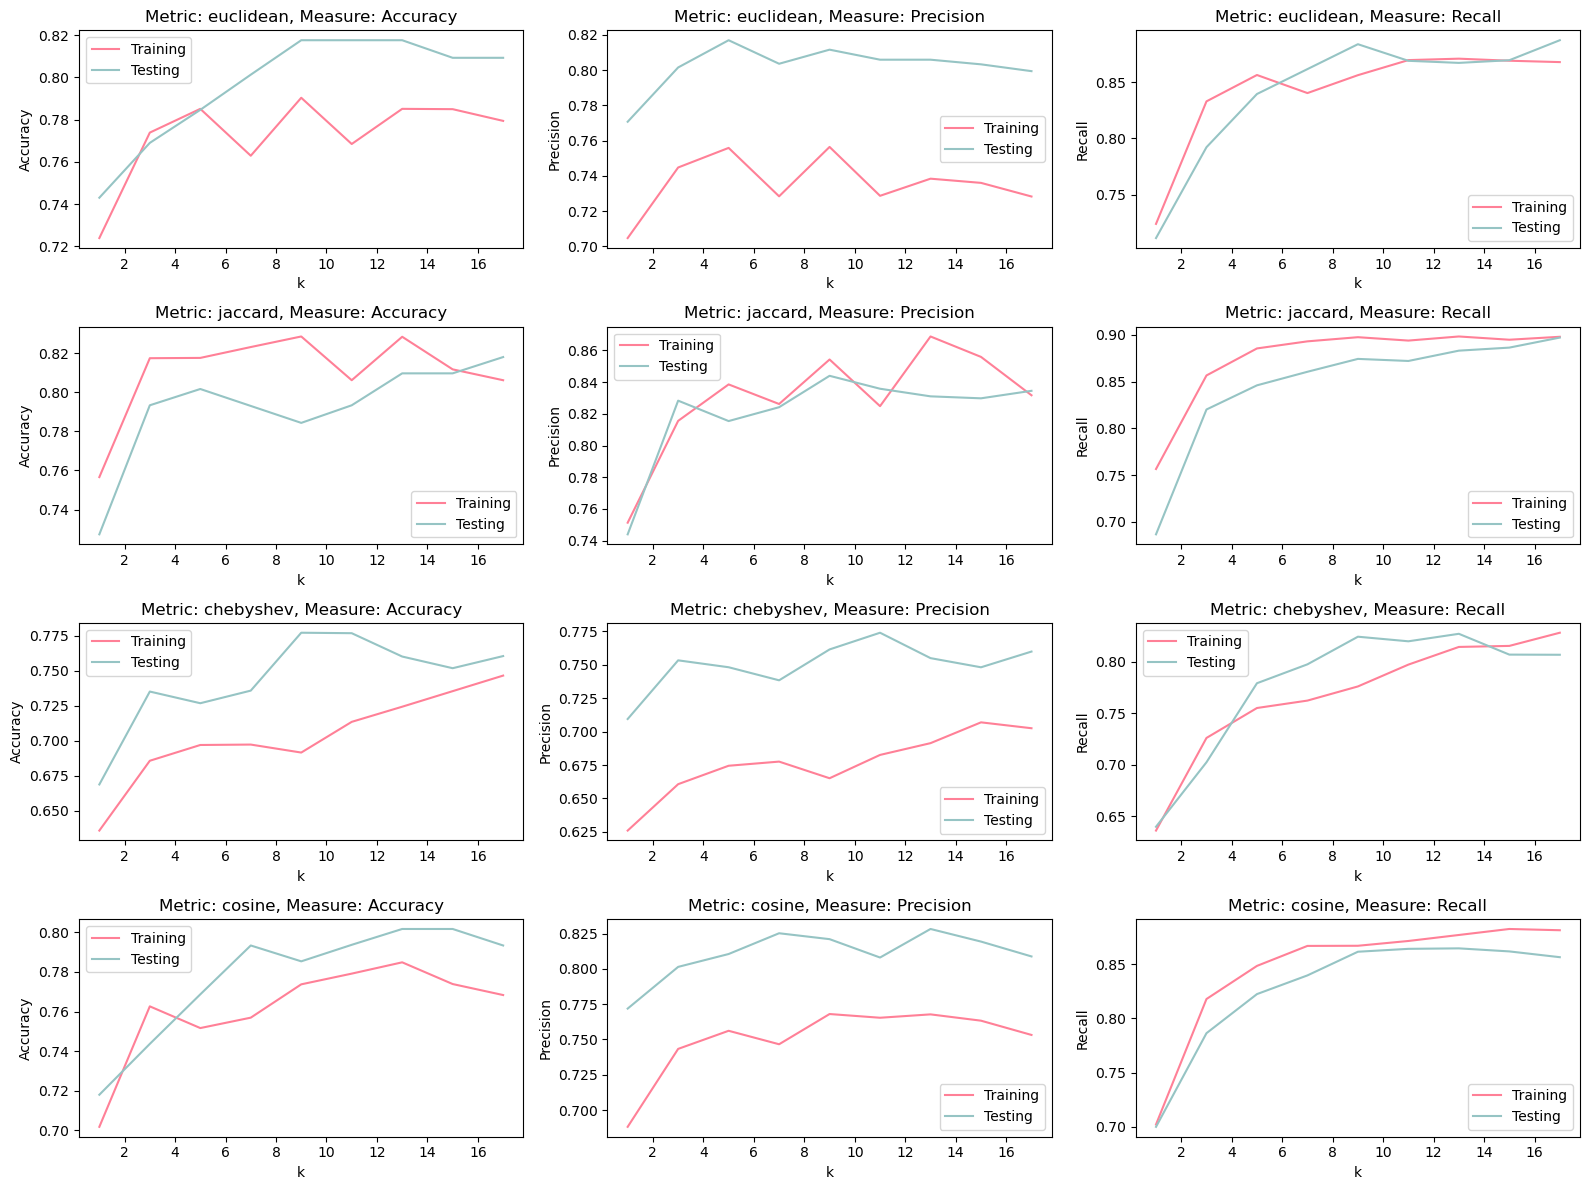

In [22]:
# Elimine a coluna 'target' do DataFrame para criar a matriz de características 'X'
X = df.drop(columns=['target'])

# Cria o Destino de vetor 'y'
y = df['target']

# Divida os dados em conjuntos de treinamento e teste (remova random_state para divisão aleatória)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Lista de valores ímpares para k no algoritmo KNN
k_list = list(range(1, 18, 2))

# Defina as métricas de distância a serem utilizadas
metrics = ['euclidean', 'jaccard', 'chebyshev','cosine']

# Defina as medidas de desempenho a serem avaliadas
performance_measures = ['Accuracy', 'Precision', 'Recall']

# Crie arrays para armazenar os valores de desempenho para treinamento e teste
performance_values_train = np.empty((len(metrics), len(performance_measures), len(k_list)))
performance_values_test = np.empty((len(metrics), len(performance_measures), len(k_list)))

# Loop sobre as métricas de distância
for i, metric in enumerate(metrics):

    # Loop sobre as medidas de desempenho
    for j, measure in enumerate(performance_measures):

        # Loop sobre os valores de k
        for k, n in enumerate(k_list):
            knn = KNeighborsClassifier(n_neighbors=n, metric=metric)
            knn.fit(X_train, y_train)

            # Use OneVsRestClassifier se for uma classificação binária e a AUC for desejada, caso contrário, 
            # use a métrica diretamente
            if measure == 'Recall' and len(np.unique(y)) == 2:
                knn_ovr = OneVsRestClassifier(knn)
                scores_train = cross_val_score(knn_ovr, X_train, y_train, cv=5, scoring='roc_auc')
                scores_test = cross_val_score(knn_ovr, X_test, y_test, cv=5, scoring='roc_auc')
            else:
                scores_train = cross_val_score(knn, X_train, y_train, cv=5, scoring=measure.lower())
                scores_test = cross_val_score(knn, X_test, y_test, cv=5, scoring=measure.lower())

            performance_values_train[i, j, k] = np.mean(scores_train)
            performance_values_test[i, j, k] = np.mean(scores_test)

# Cores para as curvas de treinamento e teste
color_train = '#ff8097'
color_test = '#96c4c4'

# Plota os valores de desempenho para diferentes métricas de distância e medidas de desempenho
fig, axs = plt.subplots(len(metrics), len(performance_measures), figsize=(16, 12))
for i, metric in enumerate(metrics):
    for j, measure in enumerate(performance_measures):
        axs[i, j].plot(k_list, performance_values_train[i, j], label='Training', color=color_train)
        axs[i, j].plot(k_list, performance_values_test[i, j], label='Testing', color=color_test)
        axs[i, j].set_title(f'Metric: {metric}, Measure: {measure}')
        axs[i, j].legend()
        axs[i, j].set_xlabel('k')
        axs[i, j].set_ylabel(measure)
        axs[i, j].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


## Matriz de Confusão

A matriz de confusão é uma ferramenta fundamental na avaliação de modelos de classificação e, essencialmente, resume o desempenho do modelo em um problema específico. Ela é uma tabela que mostra a comparação entre as classes reais e as classes previstas pelo modelo. Em outras palavras, a matriz de confusão ilustra quais instâncias foram classificadas corretamente e quais foram classificadas de forma incorreta.

A estrutura básica de uma matriz de confusão é dividida em quatro elementos principais:

1. Verdadeiro Positivo (VP): Indica o número de instâncias corretamente classificadas como positivas. Ou seja, são os casos em que o modelo previu corretamente a classe positiva quando a classe real também era positiva.

2. Falso Positivo (FP): Representa o número de instâncias incorretamente classificadas como positivas. Nestes casos, o modelo previu erroneamente a classe positiva quando a classe real era negativa.

3. Verdadeiro Negativo (VN): Mostra o número de instâncias corretamente classificadas como negativas. Ou seja, são os casos em que o modelo acertou ao prever a classe negativa quando a classe real também era negativa.

4. Falso Negativo (FN): Refere-se ao número de instâncias incorretamente classificadas como negativas. Nestes casos, o modelo previu erroneamente a classe negativa quando a classe real era positiva.

Com base nesses quatro elementos, é possível calcular diversas métricas de avaliação, como a acurácia, a precisão, a sensibilidade (recall) e a especificidade do modelo. A acurácia é a proporção de instâncias corretamente classificadas em relação ao total de instâncias. A precisão mede a capacidade do modelo de identificar corretamente as instâncias positivas. A sensibilidade mede a capacidade do modelo de identificar corretamente as instâncias positivas em relação ao total de instâncias positivas. E, por fim, a especificidade mede a capacidade do modelo de identificar corretamente as instâncias negativas em relação ao total de instâncias negativas.

### Matriz de Confusão com Distância Euclidiana

Existem 121 amostras para teste



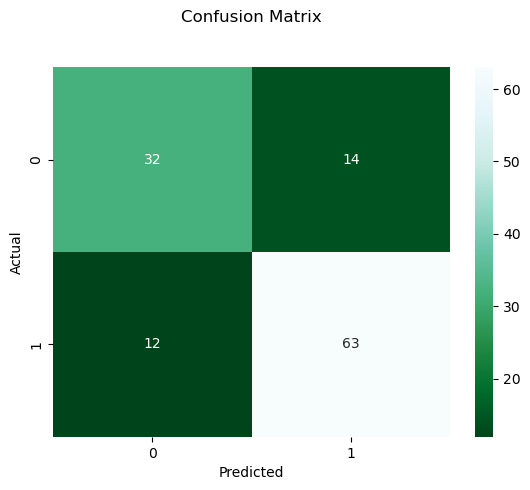

In [23]:
# Matriz de confusão
knn = KNeighborsClassifier(n_neighbors=11, metric="euclidean")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Existem ' + str(len(y_pred)) + ' amostras para teste\n')
matrix = confusion_matrix(y_test, y_pred)
color = sns.diverging_palette(220, 20, as_cmap=True)
p = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap='BuGn_r', fmt='g')
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

- Acurácia: 78,51%
- Sensibilidade: 84%
- Recall: 69,56%

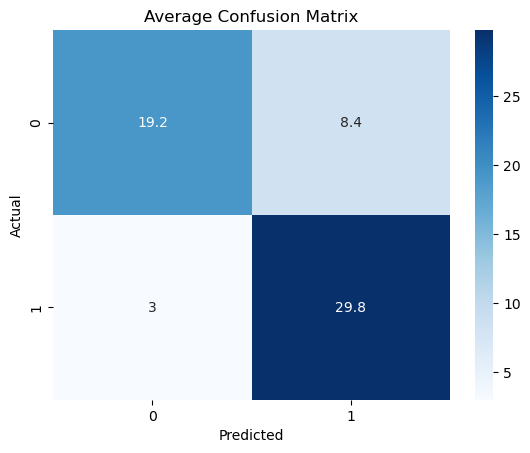

In [24]:
kfold = KFold(n_splits=5)
confusion_matrices = []

X = np.array(X)
y = np.array(y)
knn = KNeighborsClassifier(n_neighbors=11, metric="euclidean")

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    avg_confusion_matrix = sum(confusion_matrices) / len(confusion_matrices)


sns.heatmap(avg_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- Acurácia: 81,12%
- Sensibilidade: 90,85%
- Recall: 69,56%

### Matriz de Confusão com Distância de Jaccard

Existem 60 amostras para teste



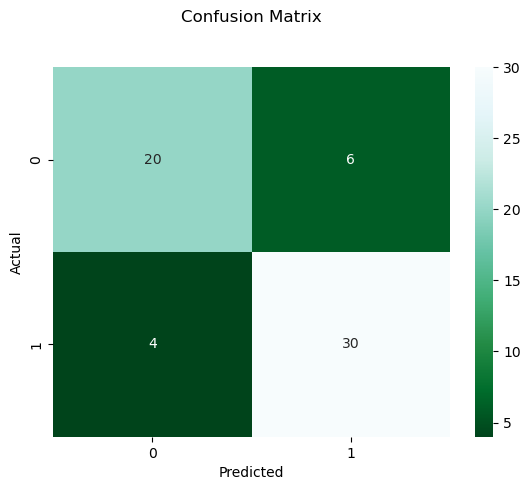

In [25]:
knn = KNeighborsClassifier(n_neighbors=11, metric="jaccard")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Existem ' + str(len(y_pred)) + ' amostras para teste\n')
matrix = confusion_matrix(y_test, y_pred)
color = sns.diverging_palette(220, 20, as_cmap=True)
p = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap='BuGn_r', fmt='g')
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

- Acurácia: 83,33%
- Sensibilidade: 88,23%
- Recall: 76,92%

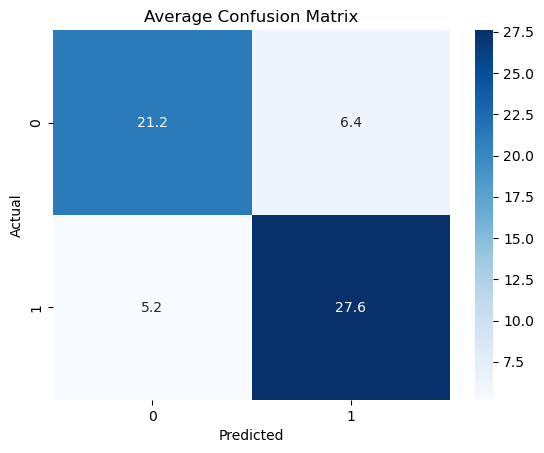

In [26]:
kfold = KFold(n_splits=5)
confusion_matrices = []

X = np.array(X)
y = np.array(y)
knn = KNeighborsClassifier(n_neighbors=11, metric="jaccard")

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    avg_confusion_matrix = sum(confusion_matrices) / len(confusion_matrices)


sns.heatmap(avg_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- Acurácia: 80,79%
- Sensibilidade: 84,14%
- Recall: 76,81%

### Matriz de Confusão com Distância de Chebyshev

Existem 60 amostras para teste



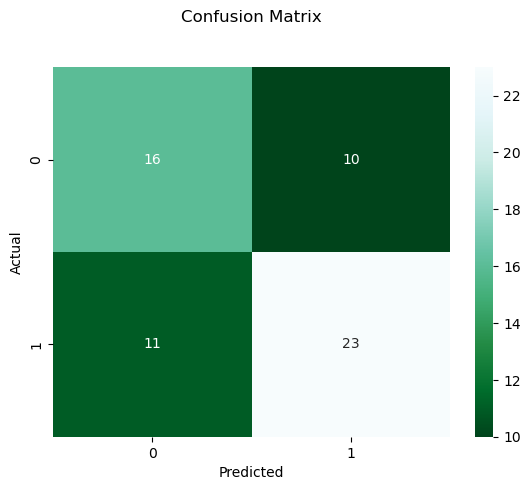

In [27]:
knn = KNeighborsClassifier(n_neighbors=7, metric="chebyshev")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Existem ' + str(len(y_pred)) + ' amostras para teste\n')
matrix = confusion_matrix(y_test, y_pred)
color = sns.diverging_palette(220, 20, as_cmap=True)
p = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap='BuGn_r', fmt='g')
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

- Acurácia: 65%
- Sensibilidade: 67,64%
- Recall: 61,53%

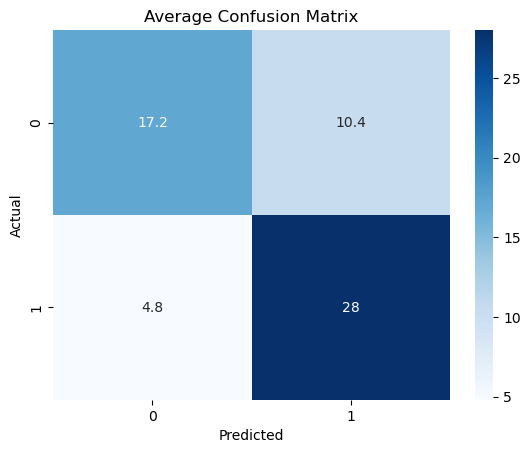

In [28]:
kfold = KFold(n_splits=5)
confusion_matrices = []

X = np.array(X)
y = np.array(y)
knn = KNeighborsClassifier(n_neighbors=7, metric="chebyshev")

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    avg_confusion_matrix = sum(confusion_matrices) / len(confusion_matrices)


sns.heatmap(avg_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- Acurácia: 74,83%
- Sensibilidade: 85,36%
- Recall: 62,31%

### Matriz de Confusão com Distância Cosine

Existem 60 amostras para teste



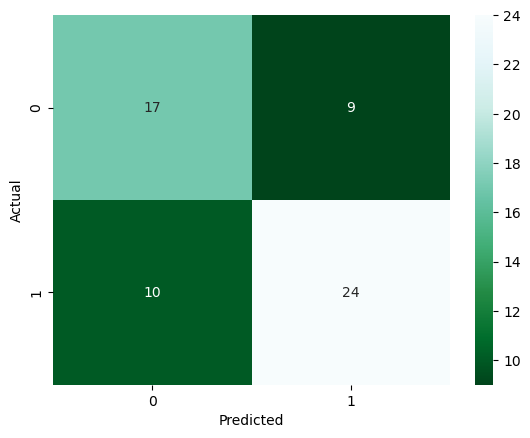

In [29]:
knn = KNeighborsClassifier(n_neighbors=9, metric='cosine')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Existem ' + str(len(y_pred)) + ' amostras para teste\n')
matrix = confusion_matrix(y_test, y_pred)
color = sns.diverging_palette(220, 20, as_cmap=True)
color = sns.diverging_palette(220, 20, as_cmap=True)
p = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap='BuGn_r', fmt='g')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

- Acurácia: 68,33%
- Sensibilidade: 70,58%
- Recall: 65,38%

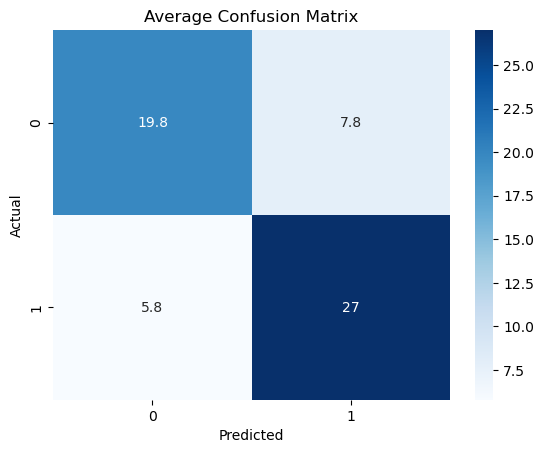

In [30]:
kfold = KFold(n_splits=5)
confusion_matrices = []

X = np.array(X)
y = np.array(y)
knn = KNeighborsClassifier(n_neighbors=9, metric='cosine')

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    avg_confusion_matrix = sum(confusion_matrices) / len(confusion_matrices)


sns.heatmap(avg_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- Acurácia: 77,48%
- Sensibilidade: 82,31%
- Recall: 71,22%

## Classificador Naive Bayes

O classificador Naive Bayes é um algoritmo de aprendizado de máquina que se baseia no Teorema de Bayes para realizar a classificação de dados. Ele é especialmente útil em problemas de classificação de texto e categorização, mas também pode ser aplicado em outros tipos de dados.

A principal premissa do Naive Bayes é a suposição de independência condicional entre os atributos dos dados. Essa suposição simplifica o processo de cálculo das probabilidades envolvidas no Teorema de Bayes, tornando o algoritmo rápido e eficiente mesmo com grandes volumes de dados.

O funcionamento do Naive Bayes é baseado na seguinte fórmula do Teorema de Bayes:

P(C | X) = (P(X | C) * P(C)) / P(X)

Onde:
- P(C | X) é a probabilidade de uma classe C dado o conjunto de atributos X (a classe que estamos buscando prever).
- P(X | C) é a probabilidade dos atributos X dado que a classe C é verdadeira.
- P(C) é a probabilidade a priori da classe C (a probabilidade de a classe C ocorrer antes de vermos os atributos X).
- P(X) é a probabilidade de ocorrência do conjunto de atributos X.

O "naive" em Naive Bayes refere-se à suposição de independência condicional, ou seja, a crença de que cada atributo é independente dos outros dados, dadas as classes. Embora essa suposição não seja verdadeira em muitos casos da vida real, o Naive Bayes ainda pode fornecer resultados surpreendentemente precisos em muitos problemas de classificação.

O algoritmo de classificação Naive Bayes é relativamente fácil de implementar e interpretar, tornando-o uma escolha popular em várias aplicações. Ele é amplamente usado em tarefas como classificação de texto, análise de sentimento, detecção de spam, categorização de documentos e muito mais.

### Idade e Frequência Cardíaca

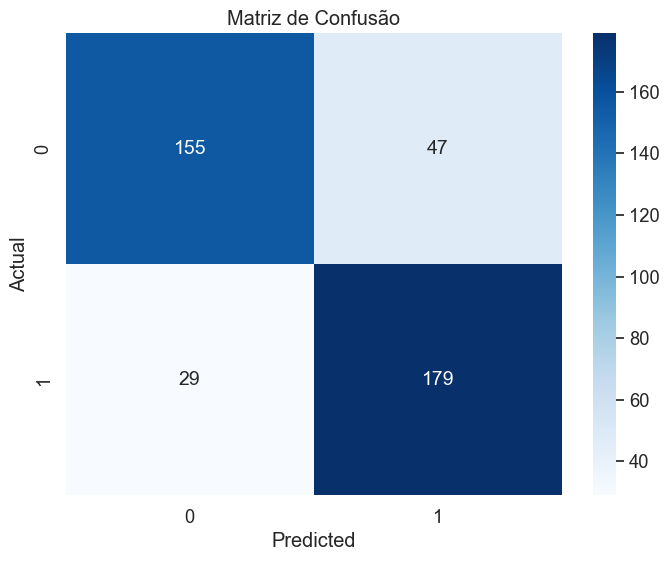

Acurácia do Naive Bayes: 0.81
Especificidade: 0.77
Sensibilidade: 0.86


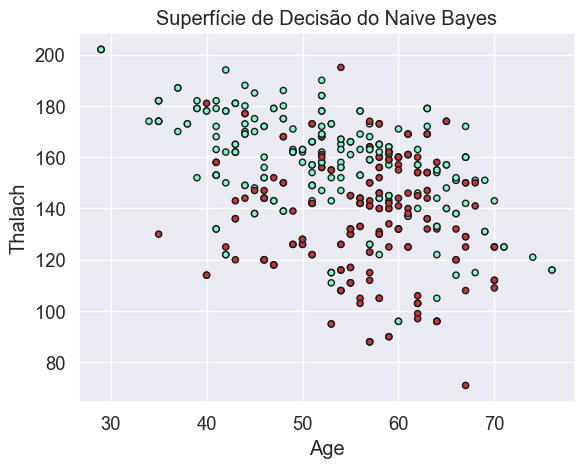

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
import seaborn as sns

class NaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.parameters = []
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            mean = X_c.mean(axis=0)
            variance = X_c.var(axis=0)
            parameters = {"mean": mean, "variance": variance, "prior": X_c.shape[0] / X.shape[0]}
            self.parameters.append(parameters)

    def _pdf(self, X, mean, variance):
        return (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-((X - mean) ** 2) / (2 * variance))

    def predict(self, X):
        likelihoods = []
        for i, c in enumerate(self.classes):
            parameters = self.parameters[i]
            prior = parameters["prior"]
            likelihood = np.prod(self._pdf(X, parameters["mean"], parameters["variance"]), axis=1)
            likelihoods.append(prior * likelihood)
        return self.classes[np.argmax(likelihoods, axis=0)]

    # Função para plotar a superfície de decisão
    def plot_decision_surface(self, X, y):
        # Escolha das características específicas (substitua 0 e 1 pelos índices das características desejadas)
        feature_index_1 = 0
        feature_index_2 = 7

        # Plotar a superfície de decisão do Naive Bayes para as características escolhidas
        plt.scatter(X_test.iloc[:, feature_index_1], X_test.iloc[:, feature_index_2], c=y_test, cmap=ListedColormap(['#c63637', '#7ff9c7']), edgecolor='k', s=20)
        plt.xlabel(f'Age')
        plt.ylabel(f'Thalach')
        plt.title('Superfície de Decisão do Naive Bayes')
        plt.show()

# Carregar os dados do arquivo CSV
data = pd.read_csv('heart.csv')

# Dividir os dados em características (X) e rótulos (y)
X = data.drop('target', axis=1) 
y = data['target']  

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Criar e treinar o Classificador Naive Bayes
nb = NaiveBayes()
nb.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = nb.predict(X_test)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Extrair os valores da matriz de confusão
tn, fp, fn, tp = conf_matrix.ravel()

# Plotar a matriz de confusão como um mapa de calor
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão')
plt.show()

# Calcular a acurácia do classificador
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do Naive Bayes: {accuracy:.2f}')

# Calcular a especificidade e a sensibilidade
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

print(f'Especificidade: {specificity:.2f}')
print(f'Sensibilidade: {sensitivity:.2f}')

# Plotar a superfície de decisão do Naive Bayes no conjunto de teste
nb.plot_decision_surface(X_test.values, y_test.values)

### Inclinação e Depressão do Segmento ST

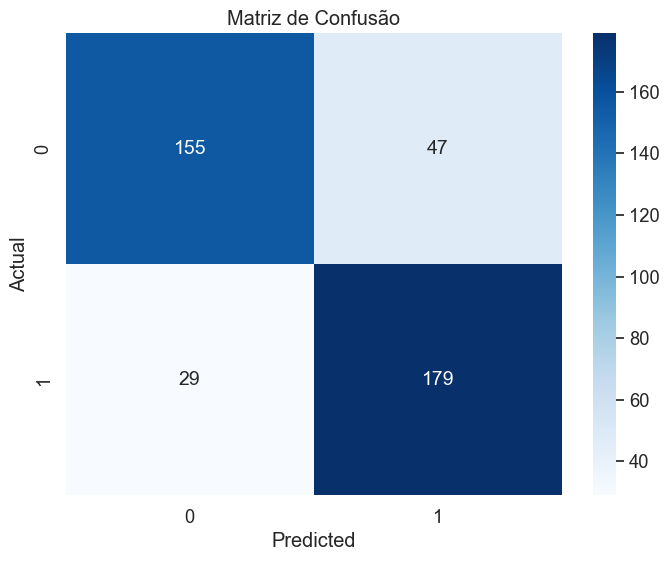

Acurácia do Naive Bayes: 0.81
Especificidade: 0.77
Sensibilidade: 0.86


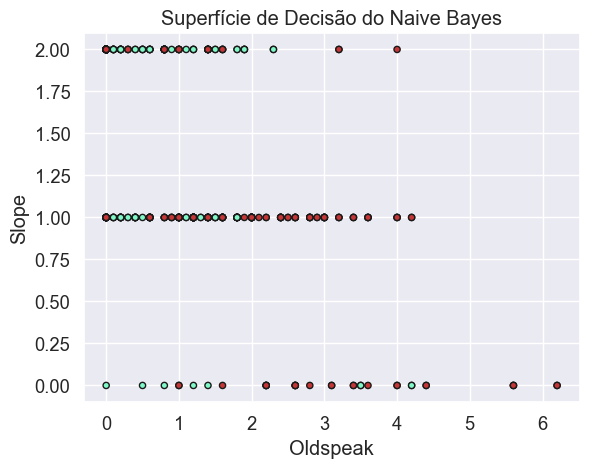

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
import seaborn as sns

class NaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.parameters = []
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            mean = X_c.mean(axis=0)
            variance = X_c.var(axis=0)
            parameters = {"mean": mean, "variance": variance, "prior": X_c.shape[0] / X.shape[0]}
            self.parameters.append(parameters)

    def _pdf(self, X, mean, variance):
        return (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-((X - mean) ** 2) / (2 * variance))

    def predict(self, X):
        likelihoods = []
        for i, c in enumerate(self.classes):
            parameters = self.parameters[i]
            prior = parameters["prior"]
            likelihood = np.prod(self._pdf(X, parameters["mean"], parameters["variance"]), axis=1)
            likelihoods.append(prior * likelihood)
        return self.classes[np.argmax(likelihoods, axis=0)]

    # Função para plotar a superfície de decisão
    def plot_decision_surface(self, X, y):
        # Escolha das características específicas (substitua 0 e 1 pelos índices das características desejadas)
        feature_index_1 = 9
        feature_index_2 = 10

        # Plotar a superfície de decisão do Naive Bayes para as características escolhidas
        plt.scatter(X_test.iloc[:, feature_index_1], X_test.iloc[:, feature_index_2], c=y_test, cmap=ListedColormap(['#c63637', '#7ff9c7']), edgecolor='k', s=20)
        plt.xlabel(f'Oldspeak')
        plt.ylabel(f'Slope')
        plt.title('Superfície de Decisão do Naive Bayes')
        plt.show()

# Carregar os dados do arquivo CSV
data = pd.read_csv('heart.csv')

# Dividir os dados em características (X) e rótulos (y)
X = data.drop('target', axis=1) 
y = data['target']  

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Criar e treinar o Classificador Naive Bayes
nb = NaiveBayes()
nb.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = nb.predict(X_test)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Extrair os valores da matriz de confusão
tn, fp, fn, tp = conf_matrix.ravel()

# Plotar a matriz de confusão como um mapa de calor
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão')
plt.show()

# Calcular a acurácia do classificador
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do Naive Bayes: {accuracy:.2f}')

# Calcular a especificidade e a sensibilidade
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

print(f'Especificidade: {specificity:.2f}')
print(f'Sensibilidade: {sensitivity:.2f}')

# Plotar a superfície de decisão do Naive Bayes no conjunto de teste
nb.plot_decision_surface(X_test.values, y_test.values)

### Frequência Cardíaca e Inclinação do Segmento ST

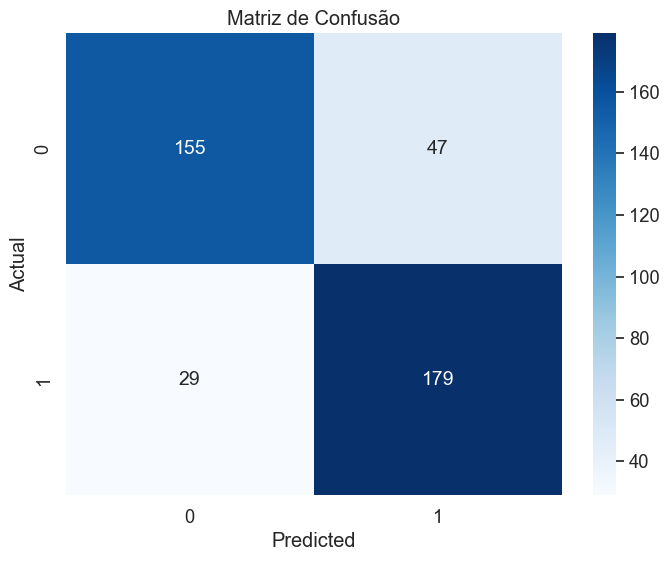

Acurácia do Naive Bayes: 0.81
Especificidade: 0.77
Sensibilidade: 0.86


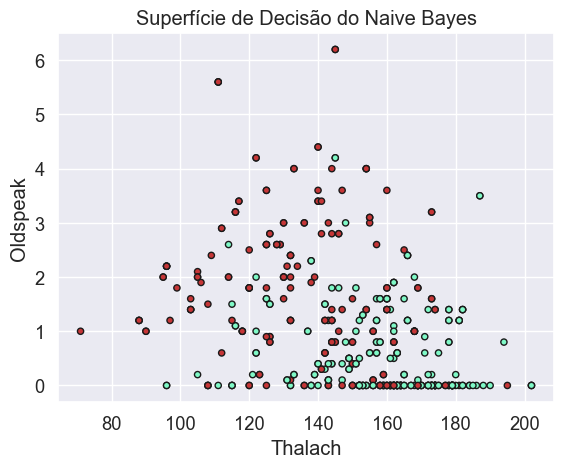

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
import seaborn as sns

class NaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.parameters = []
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            mean = X_c.mean(axis=0)
            variance = X_c.var(axis=0)
            parameters = {"mean": mean, "variance": variance, "prior": X_c.shape[0] / X.shape[0]}
            self.parameters.append(parameters)

    def _pdf(self, X, mean, variance):
        return (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-((X - mean) ** 2) / (2 * variance))

    def predict(self, X):
        likelihoods = []
        for i, c in enumerate(self.classes):
            parameters = self.parameters[i]
            prior = parameters["prior"]
            likelihood = np.prod(self._pdf(X, parameters["mean"], parameters["variance"]), axis=1)
            likelihoods.append(prior * likelihood)
        return self.classes[np.argmax(likelihoods, axis=0)]

    # Função para plotar a superfície de decisão
    def plot_decision_surface(self, X, y):
        # Escolha das características específicas (substitua 0 e 1 pelos índices das características desejadas)
        feature_index_1 = 7
        feature_index_2 = 9

        # Plotar a superfície de decisão do Naive Bayes para as características escolhidas
        plt.scatter(X_test.iloc[:, feature_index_1], X_test.iloc[:, feature_index_2], c=y_test, cmap=ListedColormap(['#c63637', '#7ff9c7']), edgecolor='k', s=20)
        plt.xlabel(f'Thalach')
        plt.ylabel(f'Oldspeak')
        plt.title('Superfície de Decisão do Naive Bayes')
        plt.show()

# Carregar os dados do arquivo CSV
data = pd.read_csv('heart.csv')

# Dividir os dados em características (X) e rótulos (y)
X = data.drop('target', axis=1) 
y = data['target']  

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Criar e treinar o Classificador Naive Bayes
nb = NaiveBayes()
nb.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = nb.predict(X_test)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Extrair os valores da matriz de confusão
tn, fp, fn, tp = conf_matrix.ravel()

# Plotar a matriz de confusão como um mapa de calor
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão')
plt.show()

# Calcular a acurácia do classificador
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do Naive Bayes: {accuracy:.2f}')

# Calcular a especificidade e a sensibilidade
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

print(f'Especificidade: {specificity:.2f}')
print(f'Sensibilidade: {sensitivity:.2f}')

# Plotar a superfície de decisão do Naive Bayes no conjunto de teste
nb.plot_decision_surface(X_test.values, y_test.values)

## A rede Percetron de Multiplas Camadas

Uma Rede Neural Multilayer Perceptron (MLP), também conhecida como perceptron de múltiplas camadas, é uma arquitetura fundamental no campo das redes neurais artificiais. Ela desempenhou um papel crucial no desenvolvimento e avanço da inteligência artificial, permitindo a abordagem de uma ampla gama de problemas complexos de processamento de informações.

A MLP é composta por várias camadas interconectadas de neurônios artificiais, que são os blocos de construção básicos da rede. Cada neurônio em uma camada está conectado a todos os neurônios nas camadas adjacentes, criando uma estrutura de rede densamente conectada. A estrutura típica de uma MLP inclui uma camada de entrada, uma ou mais camadas intermediárias (também chamadas de camadas ocultas) e uma camada de saída.

Uma das características marcantes das MLPs é sua capacidade de lidar com problemas complexos de aprendizado, como classificação e regressão, desde que os dados estejam devidamente formatados e representados. Essa flexibilidade permitiu sua aplicação em uma ampla variedade de domínios, incluindo processamento de linguagem natural, visão computacional, reconhecimento de padrões, finanças, medicina e muito mais.

Com o avanço contínuo da pesquisa em redes neurais, outras arquiteturas mais complexas e eficazes surgiram, como as redes convolucionais (CNNs) para tarefas de visão computacional e as redes recorrentes (RNNs) para lidar com dados sequenciais. No entanto, as MLPs ainda são fundamentais para entender os princípios básicos das redes neurais e continuam sendo uma ferramenta valiosa no conjunto de técnicas disponíveis para abordar problemas de aprendizado de máquina.

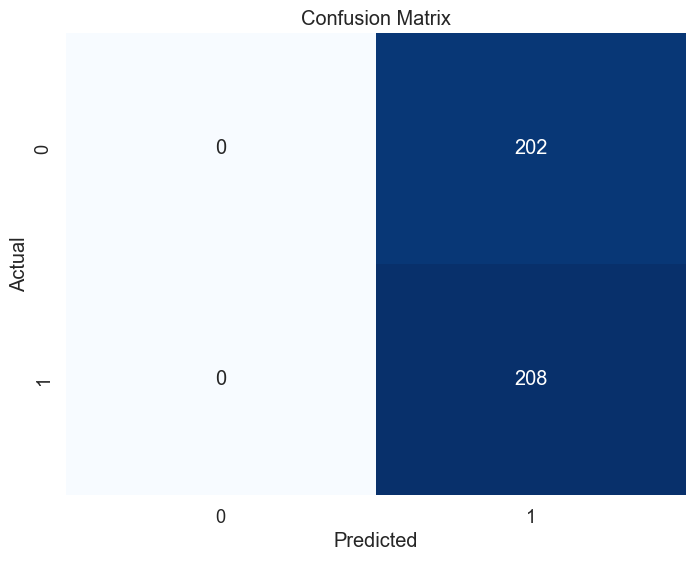

Acurácia da MLP: 0.5073170731707317
Sensibilidade (Recall): 1.0
Especificidade: 0.0


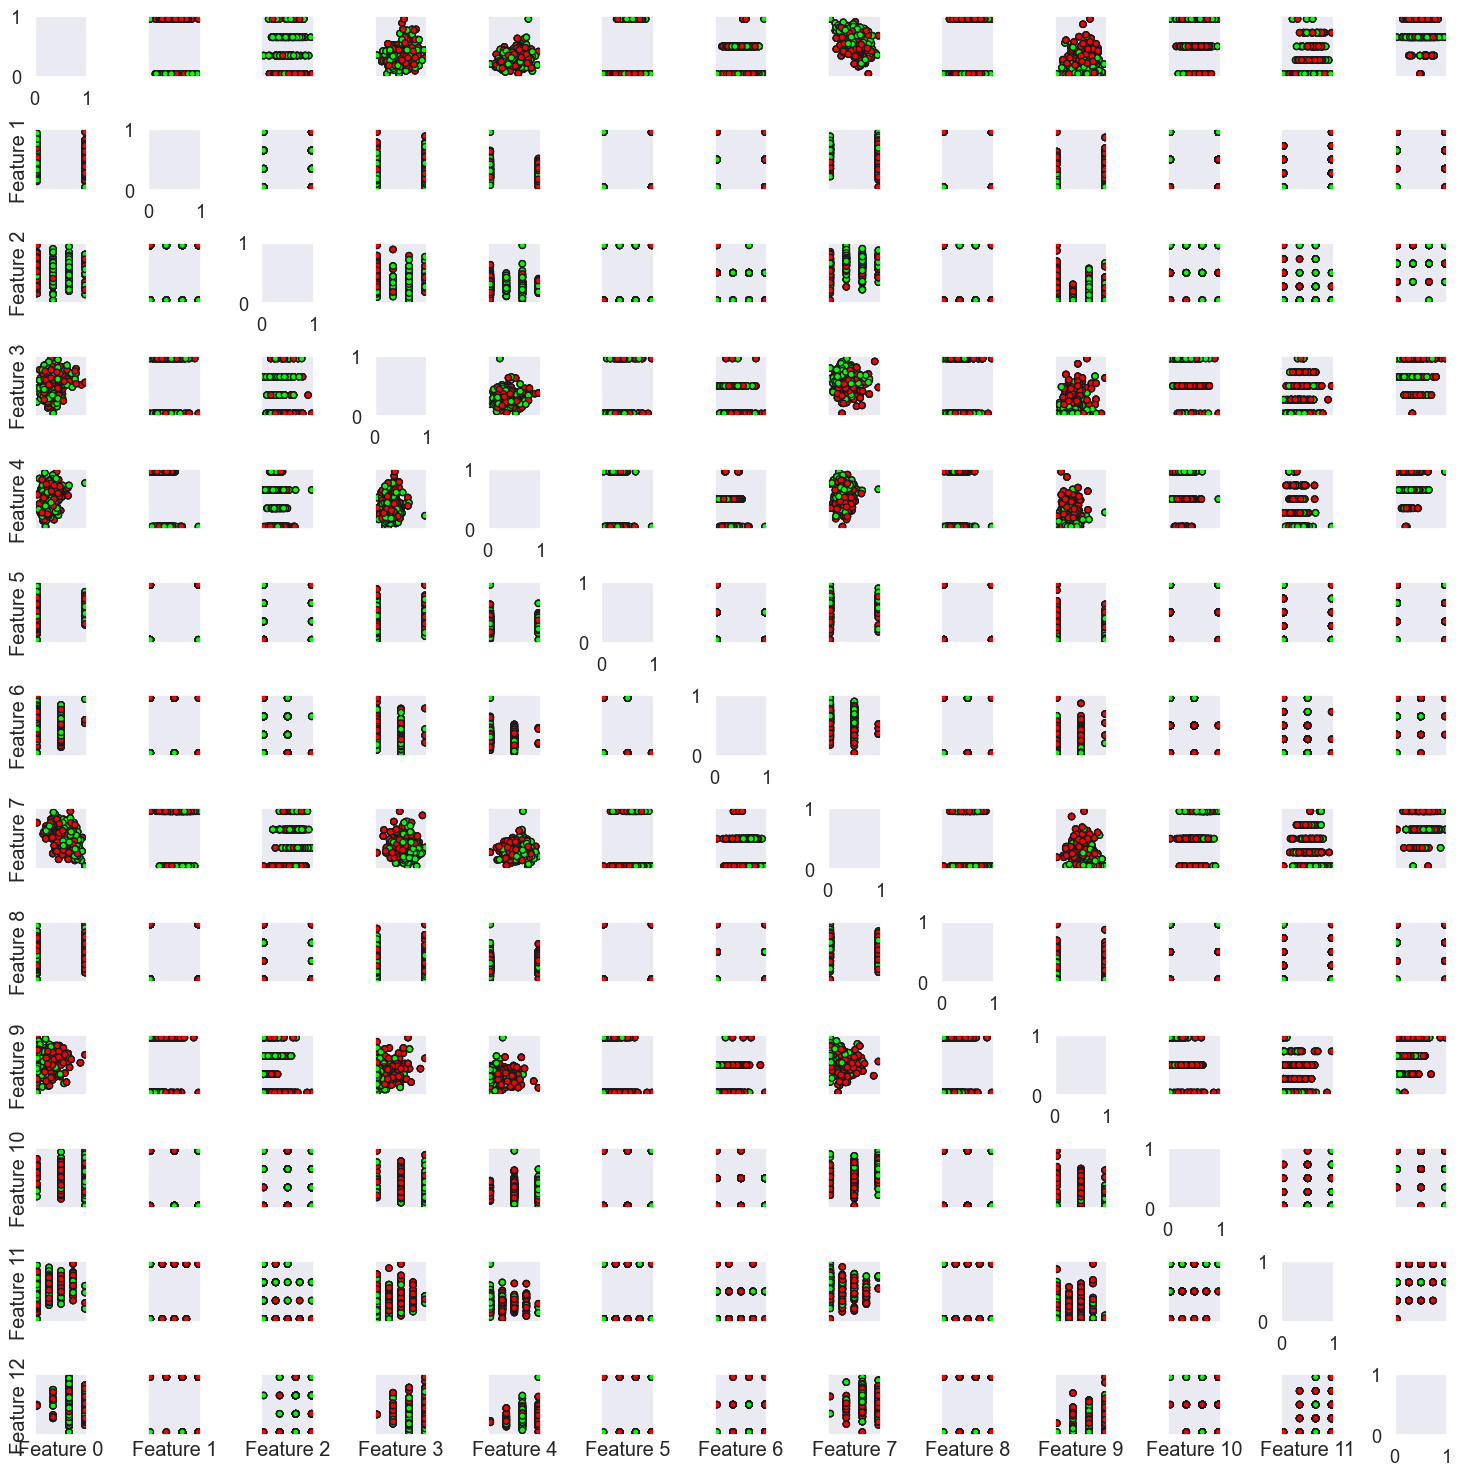

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
import seaborn as sns

class MLP:
    def __init__(self, dim_entrada, dim_oculta, dim_saida, taxa_aprendizado=0.01):
        self.dim_entrada = dim_entrada
        self.dim_oculta = dim_oculta
        self.dim_saida = dim_saida
        self.taxa_aprendizado = taxa_aprendizado

        # Inicialização dos pesos e bias das camadas oculta e de saída
        self.pesos_ocultos = np.random.rand(self.dim_entrada, self.dim_oculta)
        self.bias_ocultos = np.zeros(self.dim_oculta)

        self.pesos_saida = np.random.rand(self.dim_oculta, self.dim_saida)
        self.bias_saida = np.zeros(self.dim_saida)

    # Funcao de Ativacao Sigmoide
    def sigmoide(self, x):
        return 1 / (1 + np.exp(-x))

    # Derivada Primeirada Funcao de Ativacao Sigmoide
    def sigmoide_derivada(self, x):
        return x * (1 - x)

    # Calculo da saída da rede MLP
    def feedforward(self, X):
        # Calculo da saida da Camada oculta
        camada_oculta_entrada = np.dot(X, self.pesos_ocultos) + self.bias_ocultos
        camada_oculta_saida = self.sigmoide(camada_oculta_entrada)

        # Calculo da saida da Camada de saída
        camada_saida_entrada = np.dot(camada_oculta_saida, self.pesos_saida) + self.bias_saida
        saida = self.sigmoide(camada_saida_entrada)

        return camada_oculta_saida, saida

    def backpropagation(self, X, y, camada_oculta_saida, saida):
        # Backpropagation
        saida_erro = y - saida
        saida_delta = saida_erro * self.sigmoide_derivada(saida)

        camada_oculta_erro = saida_delta.dot(self.pesos_saida.T)
        camada_oculta_delta = camada_oculta_erro * self.sigmoide_derivada(camada_oculta_saida)

        # Atualização dos pesos e bias
        self.pesos_saida += camada_oculta_saida.T.dot(saida_delta) * self.taxa_aprendizado
        self.bias_saida += np.sum(saida_delta, axis=0) * self.taxa_aprendizado

        self.pesos_ocultos += X.T.dot(camada_oculta_delta) * self.taxa_aprendizado
        self.bias_ocultos += np.sum(camada_oculta_delta, axis=0) * self.taxa_aprendizado

    def fit(self, X, y, epocas=1000):
        for epoca in range(epocas):
            # Forward propagation
            camada_oculta_saida, saida = self.feedforward(X)
            # Backpropagation
            self.backpropagation(X, y, camada_oculta_saida, saida)

    def predicao(self, X):
        _, saida = self.feedforward(X)
        return saida

    # Função para plotar pares de características em matrizes de dispersão
    def plot_feature_scatter(self, X, y):
        num_features = X.shape[1]
        fig, axes = plt.subplots(num_features, num_features, figsize=(15, 15))

        for i in range(num_features):
            for j in range(num_features):
                if i != j:
                    ax = axes[i, j]
                    ax.scatter(X[:, i], X[:, j], c=y, cmap=ListedColormap(['#FF0000', '#00FF00']), edgecolor='k', s=20)
                    ax.set_xticks(())
                    ax.set_yticks(())
                    if i == num_features - 1:
                        ax.set_xlabel(f'Feature {j}')
                    if j == 0:
                        ax.set_ylabel(f'Feature {i}')

        plt.tight_layout()
        plt.show()
        
# Carregar os dados do CSV
data = pd.read_csv('heart.csv')
X = data.iloc[:, :-1].values  # Todas as colunas exceto a última são entradas
y = data.iloc[:, -1].values.reshape(-1, 1)  # A última coluna é a saída

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Criar e treinar a MLP
mlp = MLP(dim_entrada=X_train.shape[1], dim_oculta=100, dim_saida=1, taxa_aprendizado=0.01)
mlp.fit(X_train, y_train, epocas=1000)

# Realizar previsões no conjunto de teste
saida_prevista = mlp.predicao(X_test)

# Convertendo as previsões para classes (0 ou 1)
predicao_classes = (saida_prevista > 0.5).astype(int)

# Calcular a matriz de confusão
confusion = confusion_matrix(y_test, predicao_classes)

# Exibir o mapa de calor da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculando a acurácia
acuracia = np.mean(predicao_classes == y_test)
print(f'Acurácia da MLP: {acuracia}')

# Extrair valores da matriz de confusão
verdadeiros_positivos = confusion[1, 1]
falsos_positivos = confusion[0, 1]
verdadeiros_negativos = confusion[0, 0]
falsos_negativos = confusion[1, 0]

# Calcular sensibilidade (recall) e especificidade
sensibilidade = verdadeiros_positivos / (verdadeiros_positivos + falsos_negativos)
especificidade = verdadeiros_negativos / (verdadeiros_negativos + falsos_positivos)

print(f'Sensibilidade (Recall): {sensibilidade}')
print(f'Especificidade: {especificidade}')

# Plotar a superfície de decisão
mlp.plot_feature_scatter(X, y)

<div class="alert alert-block alert-warning"
     <b> Observação: A distribuição de gráficos que apresenta a superfície de decisão do Percepetron no gráfico geral acima mostra cada atributo em relação a todos os atributos do conjunto de dados. </b>
</div>

## Resultados

A escolha do algoritmo mais adequado para um determinado problema depende de vários fatores, incluindo a natureza dos dados, a complexidade do problema e os objetivos específicos da análise. Os algoritmos KNN (K-Nearest Neighbors), MLP (Multilayer Perceptron) e Naive Bayes são amplamente utilizados em tarefas de classificação e têm suas próprias vantagens e desvantagens em termos de desempenho, acurácia, sensibilidade e recall.

O algoritmo KNN é um método baseado em instância que classifica um ponto de dados com base nas classes das instâncias vizinhas mais próximas. Ele não faz suposições sobre a distribuição dos dados e pode funcionar bem em conjuntos de dados com fronteiras de decisão complexas. No entanto, sua eficácia pode diminuir quando os dados têm muitas dimensões, pois a medida de distância pode se tornar menos discriminativa. Em termos de sensibilidade e recall, o KNN pode ser sensível a outliers, pois eles podem influenciar fortemente a seleção das instâncias vizinhas. A acurácia do KNN pode ser alta, especialmente em conjuntos de dados bem comportados e bem ajustados.

O MLP é uma rede neural artificial composta por várias camadas de neurônios, incluindo uma camada de entrada, uma ou mais camadas ocultas e uma camada de saída. Essa arquitetura permite ao MLP modelar relações complexas nos dados. Com treinamento adequado e ajuste de hiperparâmetros, o MLP pode alcançar alta acurácia em uma variedade de problemas de classificação. No entanto, sua eficácia muitas vezes depende de um grande conjunto de dados de treinamento e do ajuste cuidadoso de hiperparâmetros. Quanto à sensibilidade e recall, o MLP pode lidar bem com fronteiras de decisão complexas, mas também é suscetível ao overfitting, o que pode impactar negativamente essas métricas.

O Naive Bayes é um classificador probabilístico que se baseia no teorema de Bayes e na suposição de independência condicional entre os atributos. Ele é especialmente eficaz quando os dados têm muitas dimensões e pode ser computacionalmente eficiente. No entanto, a suposição de independência condicional pode não ser realista em muitos casos, o que pode levar a uma perda de acurácia. O Naive Bayes tende a ser menos sensível a outliers, mas também pode ter limitações em termos de sensibilidade e recall, especialmente quando as classes estão desequilibradas.

## Conclusões

Em conclusão, a comparação entre os algoritmos KNN (K-Nearest Neighbors), Naive Bayes e redes MLP (Multilayer Perceptron) revela uma série de considerações importantes ao selecionar uma abordagem para análise de bancos de dados. Cada algoritmo possui características distintas que os tornam adequados para diferentes cenários e tipos de dados.

O algoritmo KNN demonstrou ser uma escolha eficaz quando a proximidade dos pontos no espaço de características é crucial para a classificação ou previsão. Sua simplicidade e facilidade de implementação são vantagens notáveis, mas sua escalabilidade pode ser limitada em conjuntos de dados muito grandes, uma vez que o cálculo da distância entre pontos pode se tornar computacionalmente intensivo.

Por outro lado, o classificador Naive Bayes é conhecido por sua eficiência ao lidar com conjuntos de dados de alta dimensionalidade e com características discretas. Sua premissa de independência condicional simplifica o processo de modelagem, embora possa não capturar relações complexas entre as variáveis. Naive Bayes é particularmente adequado para problemas de classificação de texto e mineração de texto, como análise de sentimentos e categorização de documentos.

As redes MLP, como representantes das redes neurais artificiais, destacam-se na capacidade de aprender representações hierárquicas de dados, permitindo a captura de relações não-lineares e complexas. Isso faz das MLPs uma escolha poderosa para problemas com dados de natureza mais complexa, como reconhecimento de padrões em imagens, processamento de linguagem natural e tarefas de séries temporais. No entanto, o treinamento de redes MLP pode ser computacionalmente caro, exigindo um grande conjunto de dados e ajustes cuidadosos de hiperparâmetros.

Em última análise, a escolha entre KNN, Naive Bayes e redes MLP dependerá das características do conjunto de dados, das necessidades específicas da tarefa e das restrições computacionais. Uma abordagem prudente envolve a avaliação de cada algoritmo em termos de precisão, eficiência computacional, interpretabilidade dos resultados e escalabilidade. Em muitos casos, combinações de diferentes algoritmos ou técnicas de aprendizado de máquina podem ser exploradas para obter os melhores resultados.